<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data

house = pd.read_csv('./housing.csv')

In [3]:
house.shape

(1460, 81)

## Introducing the data ## 

I've generated a simple table on what each feature can be described and its type. 

| Variable Name |  Type   |Description|
| :----------:  | :-----: |:------------:|
|SalePrice|Integer|The property's sale price in dollars|
|MSSubClass|Integer|The building class|
|MSZoning|String|The general zoning classification|
|LotFrontage|Float| Linear feet of street connected to property|
|LotArea|Integer| Lot size in square feet|
|Street|String| Type of road access|
|Alley|String| Type of alley access|
|LotShape|String|General shape of property|
|LandContour|String| Flatness of the property|
|Utilities|String|Type of utilities available|
|LotConfig|String| Lot configuration|
|LandSlope|String| Slope of property|
|Neighborhood|String| Physical locations within Ames city limits|
|Condition1|String|Proximity to main road or railroad|
|Condition2|String|Proximity to main road or railroad (if a second is present)|
|BldgType|String| Type of dwelling|
|HouseStyle|String| Style of dwelling|
|OverallQual|Integer| Overall material and finish quality|
|OverallCond|Integer|Overall condition rating|
|YearBuilt|Integer| Original construction date|
|YearRemodAdd|Integer| Remodel date|
|RoofStyle| Integer| Type of roof|
|RoofMatl| String| Roof material |
|Exterior1st|String| Exterior covering on house|
|Exterior2nd|String| Exterior covering on house (if more than one material|
|MasVnrType|String| Masonry veneer type|
|MasVnrArea|Float| Masonry veneer area in square feet|
|ExterQual|String| Exterior material quality|
|ExterCond|String| Present condition of the material on the exterior|
|Foundation|String|Type of foundation|
|BsmtQual|String|Height of the basement|
|BsmtCond|String| General condition of the basement|
|BsmtExposure| String| Walkout or garden level basement walls|
|BsmtFinType1| String| Quality of basement finished area |
|BsmtFinSF1|String| Type 1 finished square feet|
|BsmtFinType2|String|Quality of second finished area (if present)|
|BsmtFinSF2|Integer| Type 2 finished square feet|
|BsmtUnfSF|Integer| Unfinished square feet of basement area|
|TotalBsmtSF|Integer|Total square feet of basement area|
|Heating|String|Type of heating|
|HeatingQC|String| Heating quality and condition|
|CentralAir|String| Central air conditioning|
|Electrical|String| Electrical system|
|1stFlrSF|Integer| First Floor square feet|
|2ndFlrSF|Integer|Second floor square feet|
|LowQualFinSF|Integer| Low quality finished square feet (all floors)|
|GrLivArea|Integer|Above grade (ground) living area square feet|
|BsmtFullBath|Integer|Basement full bathrooms|
|BsmtHalfBath|Integer| Basement half bathrooms|
|FullBath|Integer| Full bathrooms above grade|
|HalfBath|Integer|Half baths above grade|
|Bedroom|Integer| Number of bedrooms above basement level|
|Kitchen|Integer| Number of kitchens|
|KitchenQual|String| Kitchen quality|
|TotRmsAbvGrd|Integer|Total rooms above grade (does not include bathrooms)|
|Functional|String| Home functionality rating|
|Fireplaces|Integer| Number of fireplaces|
|FireplaceQu| String| Fireplace quality|
|GarageType|String| Garage location|
|GarageYrBlt|Float|Year garage was built|
|GarageFinish|String|Interior finish of the garage|
|GarageCars|String|Size of garage in car capacity|
|GarageArea|String|Size of garage in square feet|
|GarageQual|String|Garage quality|
|GarageCond|String| Garage condition|
|PavedDrive|String| Paved driveway|
|WoodDeckSF|Integer| Wood deck area in square feet|
|OpenPorchSF|Integer| Open porch area in square feet|
|EnclosedPorch|Integer|Enclosed porch area in square feet|
|3SsnPorch|Integer| Three season porch area in square feet|
|ScreenPorch|Integer| Screen porch area in square feet|
|PoolArea|Integer|Pool area in square feet|
|PoolQC|String| Pool quality|
|Fence|String| Fence quality|
|MiscFeature|String| Miscellaneous feature not covered in other categories|
|MiscVal|Integer| Dollar Value of miscellaneous feature|
|MoSold|Integer| Month Sold|
|YrSold|Integer| Year Sold|
|SaleType|String| Type of sale|
|SaleCondition|String| Condition of sale|



There are a total of 1460 observations and 81 variables including the target variable, `SalePrice`.

Let's start first by subsetting the data into the residential houses. 

In [4]:
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [5]:
house=house.loc[house['MSZoning']!='C (all)']
house.shape

(1450, 81)

10 observations have been deleted from the data set, which were zoned under a commercial area. 

## Target Variable ## 

Let's analyse the distribution of the target variable first. 

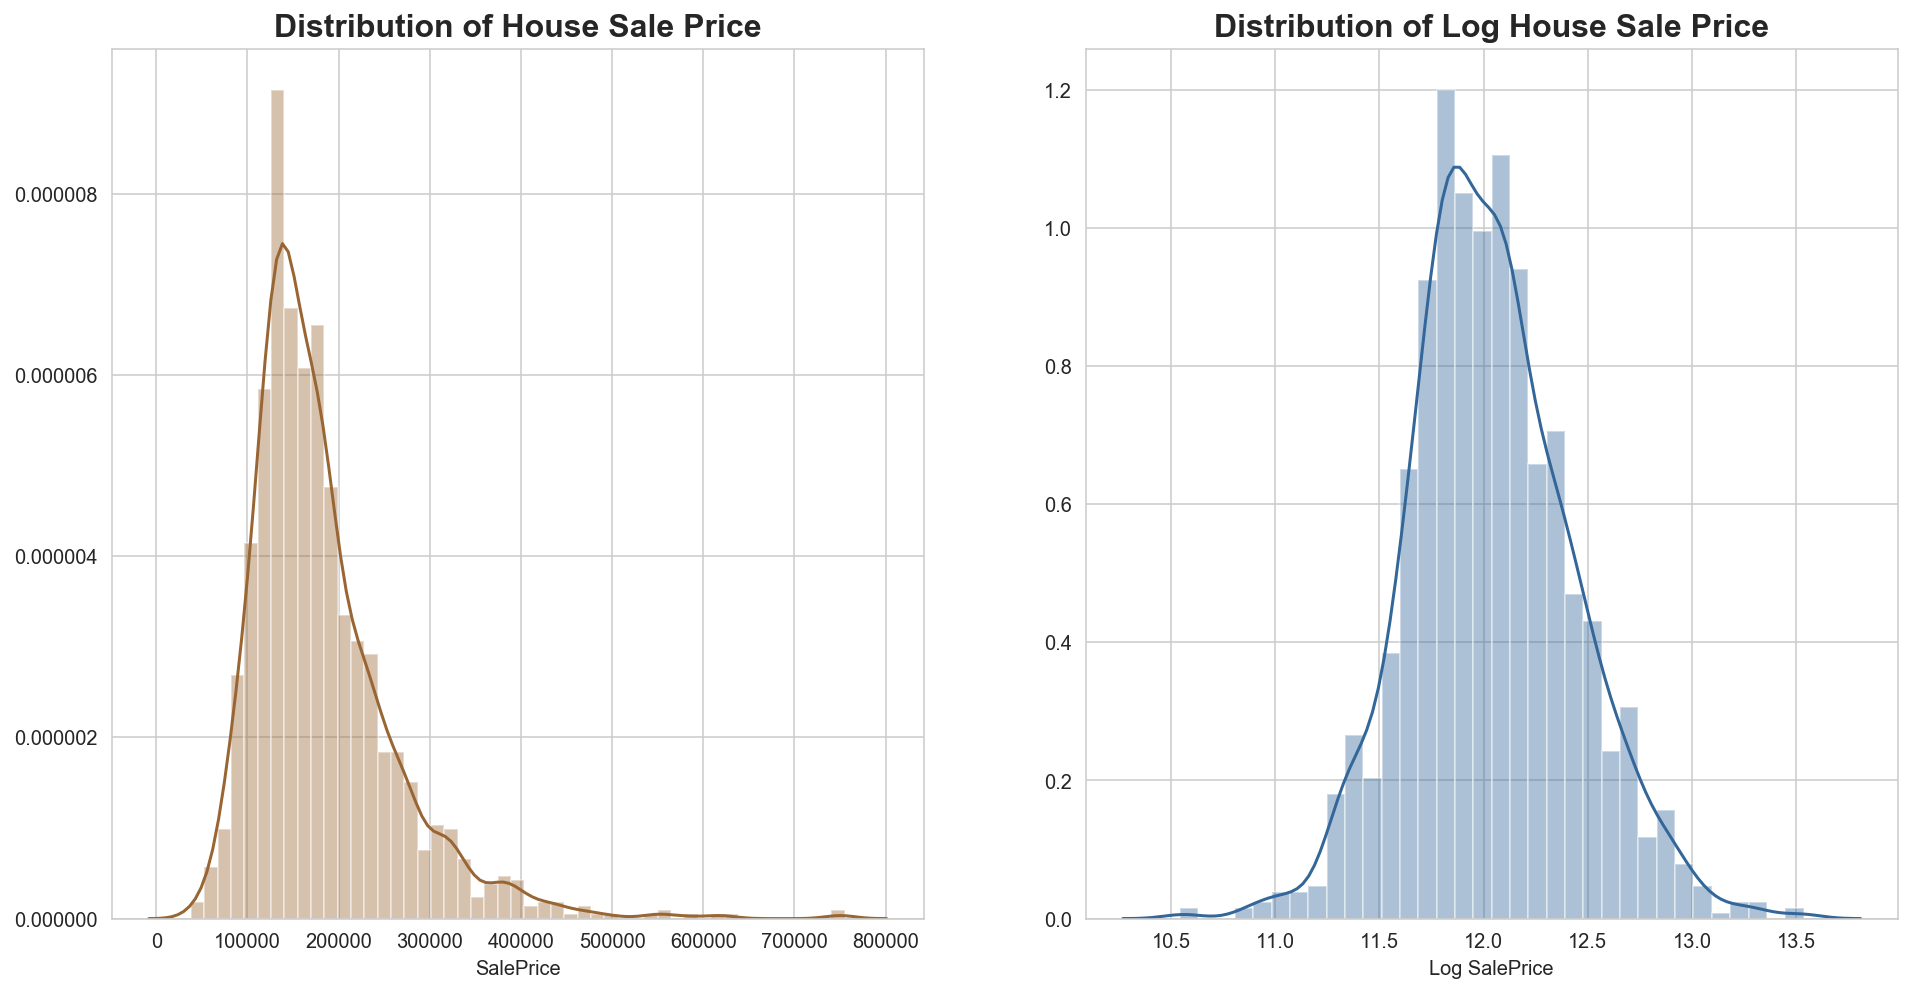

In [6]:
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.distplot(house['SalePrice'],color=(0.6,0.4,0.2),ax=ax[0])
ax[0].set_title('Distribution of House Sale Price',fontsize=16,fontweight='bold')
sns.distplot(np.log(house['SalePrice']),color=(0.2,0.4,0.6))
ax[1].set_title('Distribution of Log House Sale Price',fontsize=16,fontweight='bold')
ax[1].set_xlabel('Log SalePrice')
plt.show()

Distribution is log-normal. Let's check this using a p-p plot against a normal distribution 

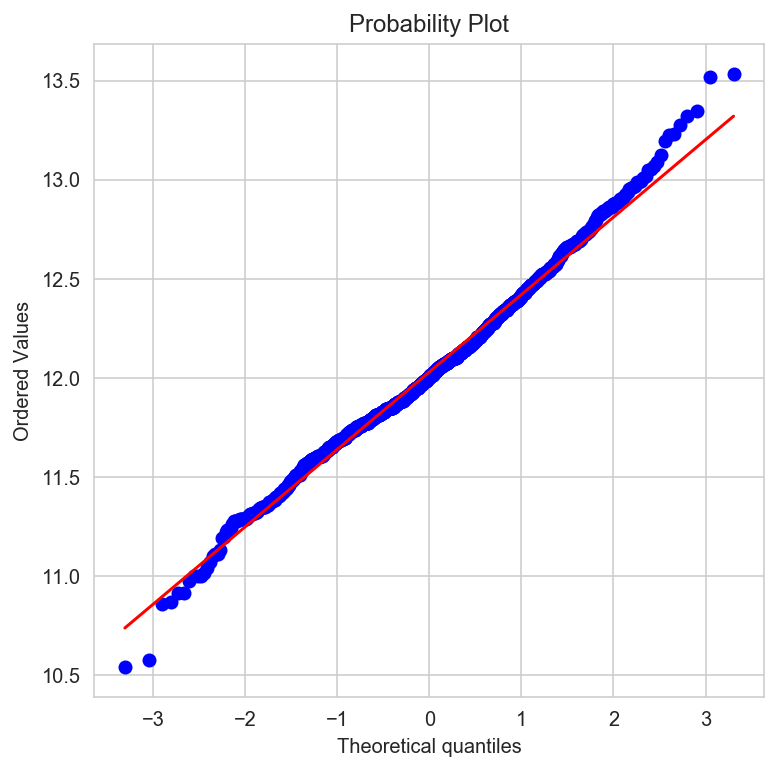

In [7]:
## P-P plot against a normal distribution # 

plt.figure(figsize=(6,6))
pp=stats.probplot(np.log(house['SalePrice']),plot=plt)


The distribution of the target variable seems to be normal except at the tail ends of the distribution. We'll take the transformation as our target variable in the regression. 

In [8]:
# Take log(1+x) transformation of SalePrice, set as target # 

house['target']=np.log1p(house['SalePrice'])

## Missing values ## 

In [9]:
def tab_missing_values(df):
    """
        Takes a data frame and tabulates all missing values by column 
    """    
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']

    # Filling factor is % of non null values in the column #
    missing_df['filling_factor'] = (df.shape[0] 
                                    - missing_df['missing_count']) / df.shape[0] * 100
    missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)

    return missing_df[missing_df['filling_factor']<100]


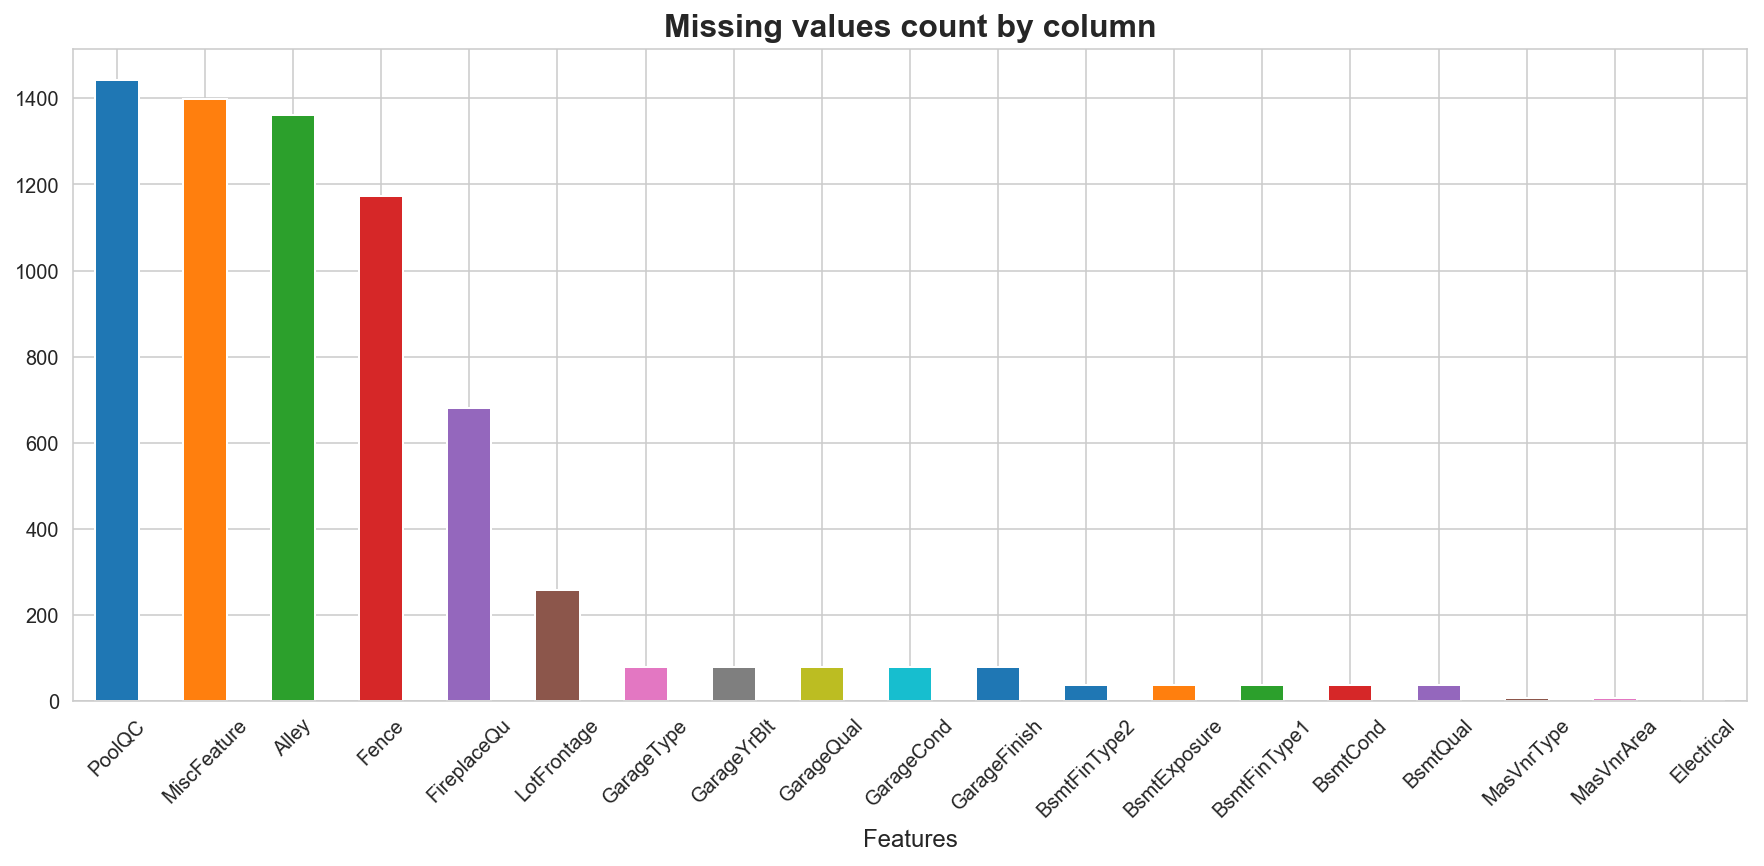

In [10]:
missing_df=tab_missing_values(house)
plt.figure(figsize=(15,6))
f=missing_df['missing_count'].plot.bar()
f.set_xticklabels(missing_df['column_name'],rotation=45)
f.set_title('Missing values count by column',fontsize=16,fontweight='bold')
f.set_xlabel('Features',fontsize=12)
plt.show()


There are a total of 18 columns with missing values. Some of these features are grouped according to a part of the house, which likely indicates that the component is missing. For instance, 1453 missing values in `PoolQC` indicates that these houses probably don't have a pool. Features not all houses have are things like - Alley, Fence, Fireplace, Frontage, Garage and Basement. We'll fill the `Type` variables with "None" in this case.

In [11]:
missing_df

column_name  missing_count  filling_factor
0         PoolQC           1443        0.482759
1    MiscFeature           1398        3.586207
2          Alley           1361        6.137931
3          Fence           1172       19.172414
4    FireplaceQu            681       53.034483
5    LotFrontage            259       82.137931
6     GarageType             79       94.551724
7    GarageYrBlt             79       94.551724
8     GarageQual             79       94.551724
9     GarageCond             79       94.551724
10  GarageFinish             79       94.551724
11  BsmtFinType2             38       97.379310
12  BsmtExposure             38       97.379310
13  BsmtFinType1             37       97.448276
14      BsmtCond             37       97.448276
15      BsmtQual             37       97.448276
16    MasVnrType              8       99.448276
17    MasVnrArea              8       99.448276
18    Electrical              1       99.931034

In [12]:
# Fill all categorical features with "None" # 

type_features=['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'GarageFinish',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

for feature in type_features:
    house[feature].fillna("None",inplace=True)

In [13]:
tab_missing_values(house)

column_name  missing_count  filling_factor
0  LotFrontage            259       82.137931
1  GarageYrBlt             79       94.551724
2   MasVnrArea              8       99.448276

There are still some numerical features missing. Let's take a closer look. I'm most concerned with missing values of `LotFrontage`, since it's not quite reasonable to assume that a house has zero frontage if the value is missing. It's more likely that this didn't get recorded. Nonetheless, I think it's fairly reasonable to assume that the lot frontage size is proportional to the total lot area, so let's try and see if there's a linear relationship here. 

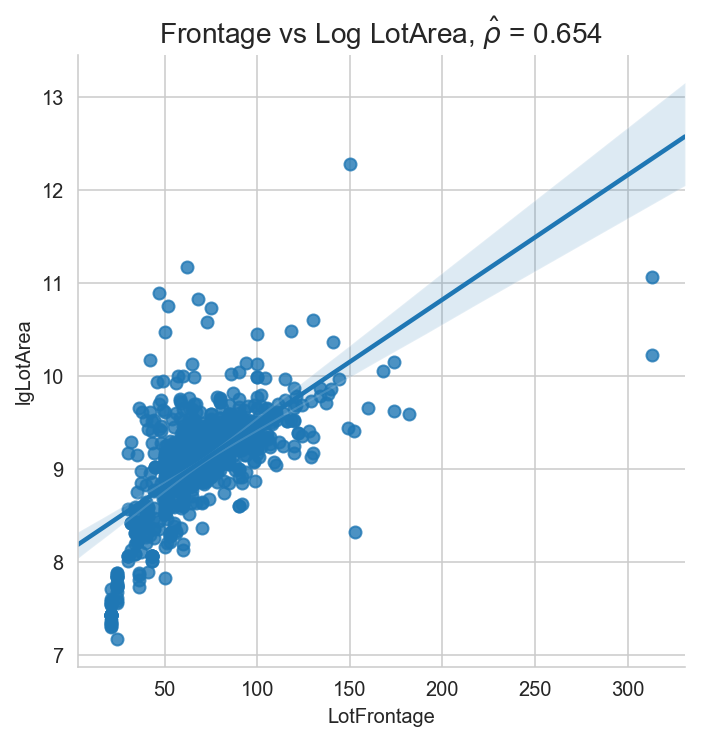

In [14]:
f=plt.figure(figsize=(8,6))
house['lgLotArea']=np.log1p(house['LotArea'])
sns.lmplot(x='LotFrontage',y='lgLotArea',data=house)

plt.title(r'Frontage vs Log LotArea, $\hat\rho$ = {:.3f}'.format(house.corr()['LotFrontage']['lgLotArea']),fontsize=14)
plt.show()

Given the fairly strong relationship linear relationship between frontage and log lot area, I'll be using log of `LotArea` to impute the missing values for `LotFrontage` using a simple linear model. 

In [15]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
miss_ind=house['LotFrontage'].isna()
X=house['lgLotArea'].values[-miss_ind]
y=house['LotFrontage'].values[-miss_ind]

# Add constant # 
X=np.concatenate((np.ones(X.shape[0]).reshape((X.shape[0],1)),X.reshape((X.shape[0],1))),axis=1)

# Fit the model, OLS # 
imputefit=lr.fit(X,y)

# Impute missing values # 
X_miss=house['lgLotArea'].values[miss_ind]
X_miss=np.concatenate((np.ones(X_miss.shape[0]).reshape((X_miss.shape[0],1)),X_miss.reshape((X_miss.shape[0],1))),axis=1)
miss_predict=imputefit.predict(X_miss)
house['LotFrontage'].loc[miss_ind]=miss_predict


For the rest of the missing values, just I'll fill them with zero. 

In [16]:
house['GarageYrBlt'].fillna(0,inplace=True)
house['MasVnrArea'].fillna(0,inplace=True)

In [17]:
# Check that there are no more missing values #
tab_missing_values(house)

Empty DataFrame
Columns: [column_name, missing_count, filling_factor]
Index: []

## Relationship between target and fixed features ##

Let's explore the relationship between the target variable and fixed features of a house.

In [18]:
# Identify fixed features of the house # 

feature_list=house.columns.tolist()

non_predictive_features=['Id','MoSold','YrSold','SaleType','SaleCondition','SalePrice','target']

fixed_features=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'lgLotArea','Street',\
 'YearBuilt','YearRemodAdd','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',\
'LandSlope', 'Neighborhood',  'BldgType','HouseStyle', 'Foundation', 'BsmtExposure', 'BsmtFinType1',\
'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','CentralAir',\
'Electrical', '1stFlrSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',\
'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd',  'GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars','GarageArea']

non_fixed_features=[a for a in feature_list if a not in fixed_features+non_predictive_features]


print('{} non-predictive features, {} fixed features, {} non-fixed features'.format(len(non_predictive_features),len(fixed_features),len(non_fixed_features)))

7 non-predictive features, 42 fixed features, 34 non-fixed features


I've separated the features out into three categories here according to the question requirements. Let's do further examination between the features and the target variable

### Numerical features ###

Let's first take a look at the numerical fixed features of each house, followed by the categorical features. 

In [19]:
## Select Numerical features ## 

house_fixed_num=house[fixed_features].select_dtypes(include=['int64','float64'])
house_fixed_num['target']=house['target']



In [20]:
house_fixed_num.shape


(1450, 23)

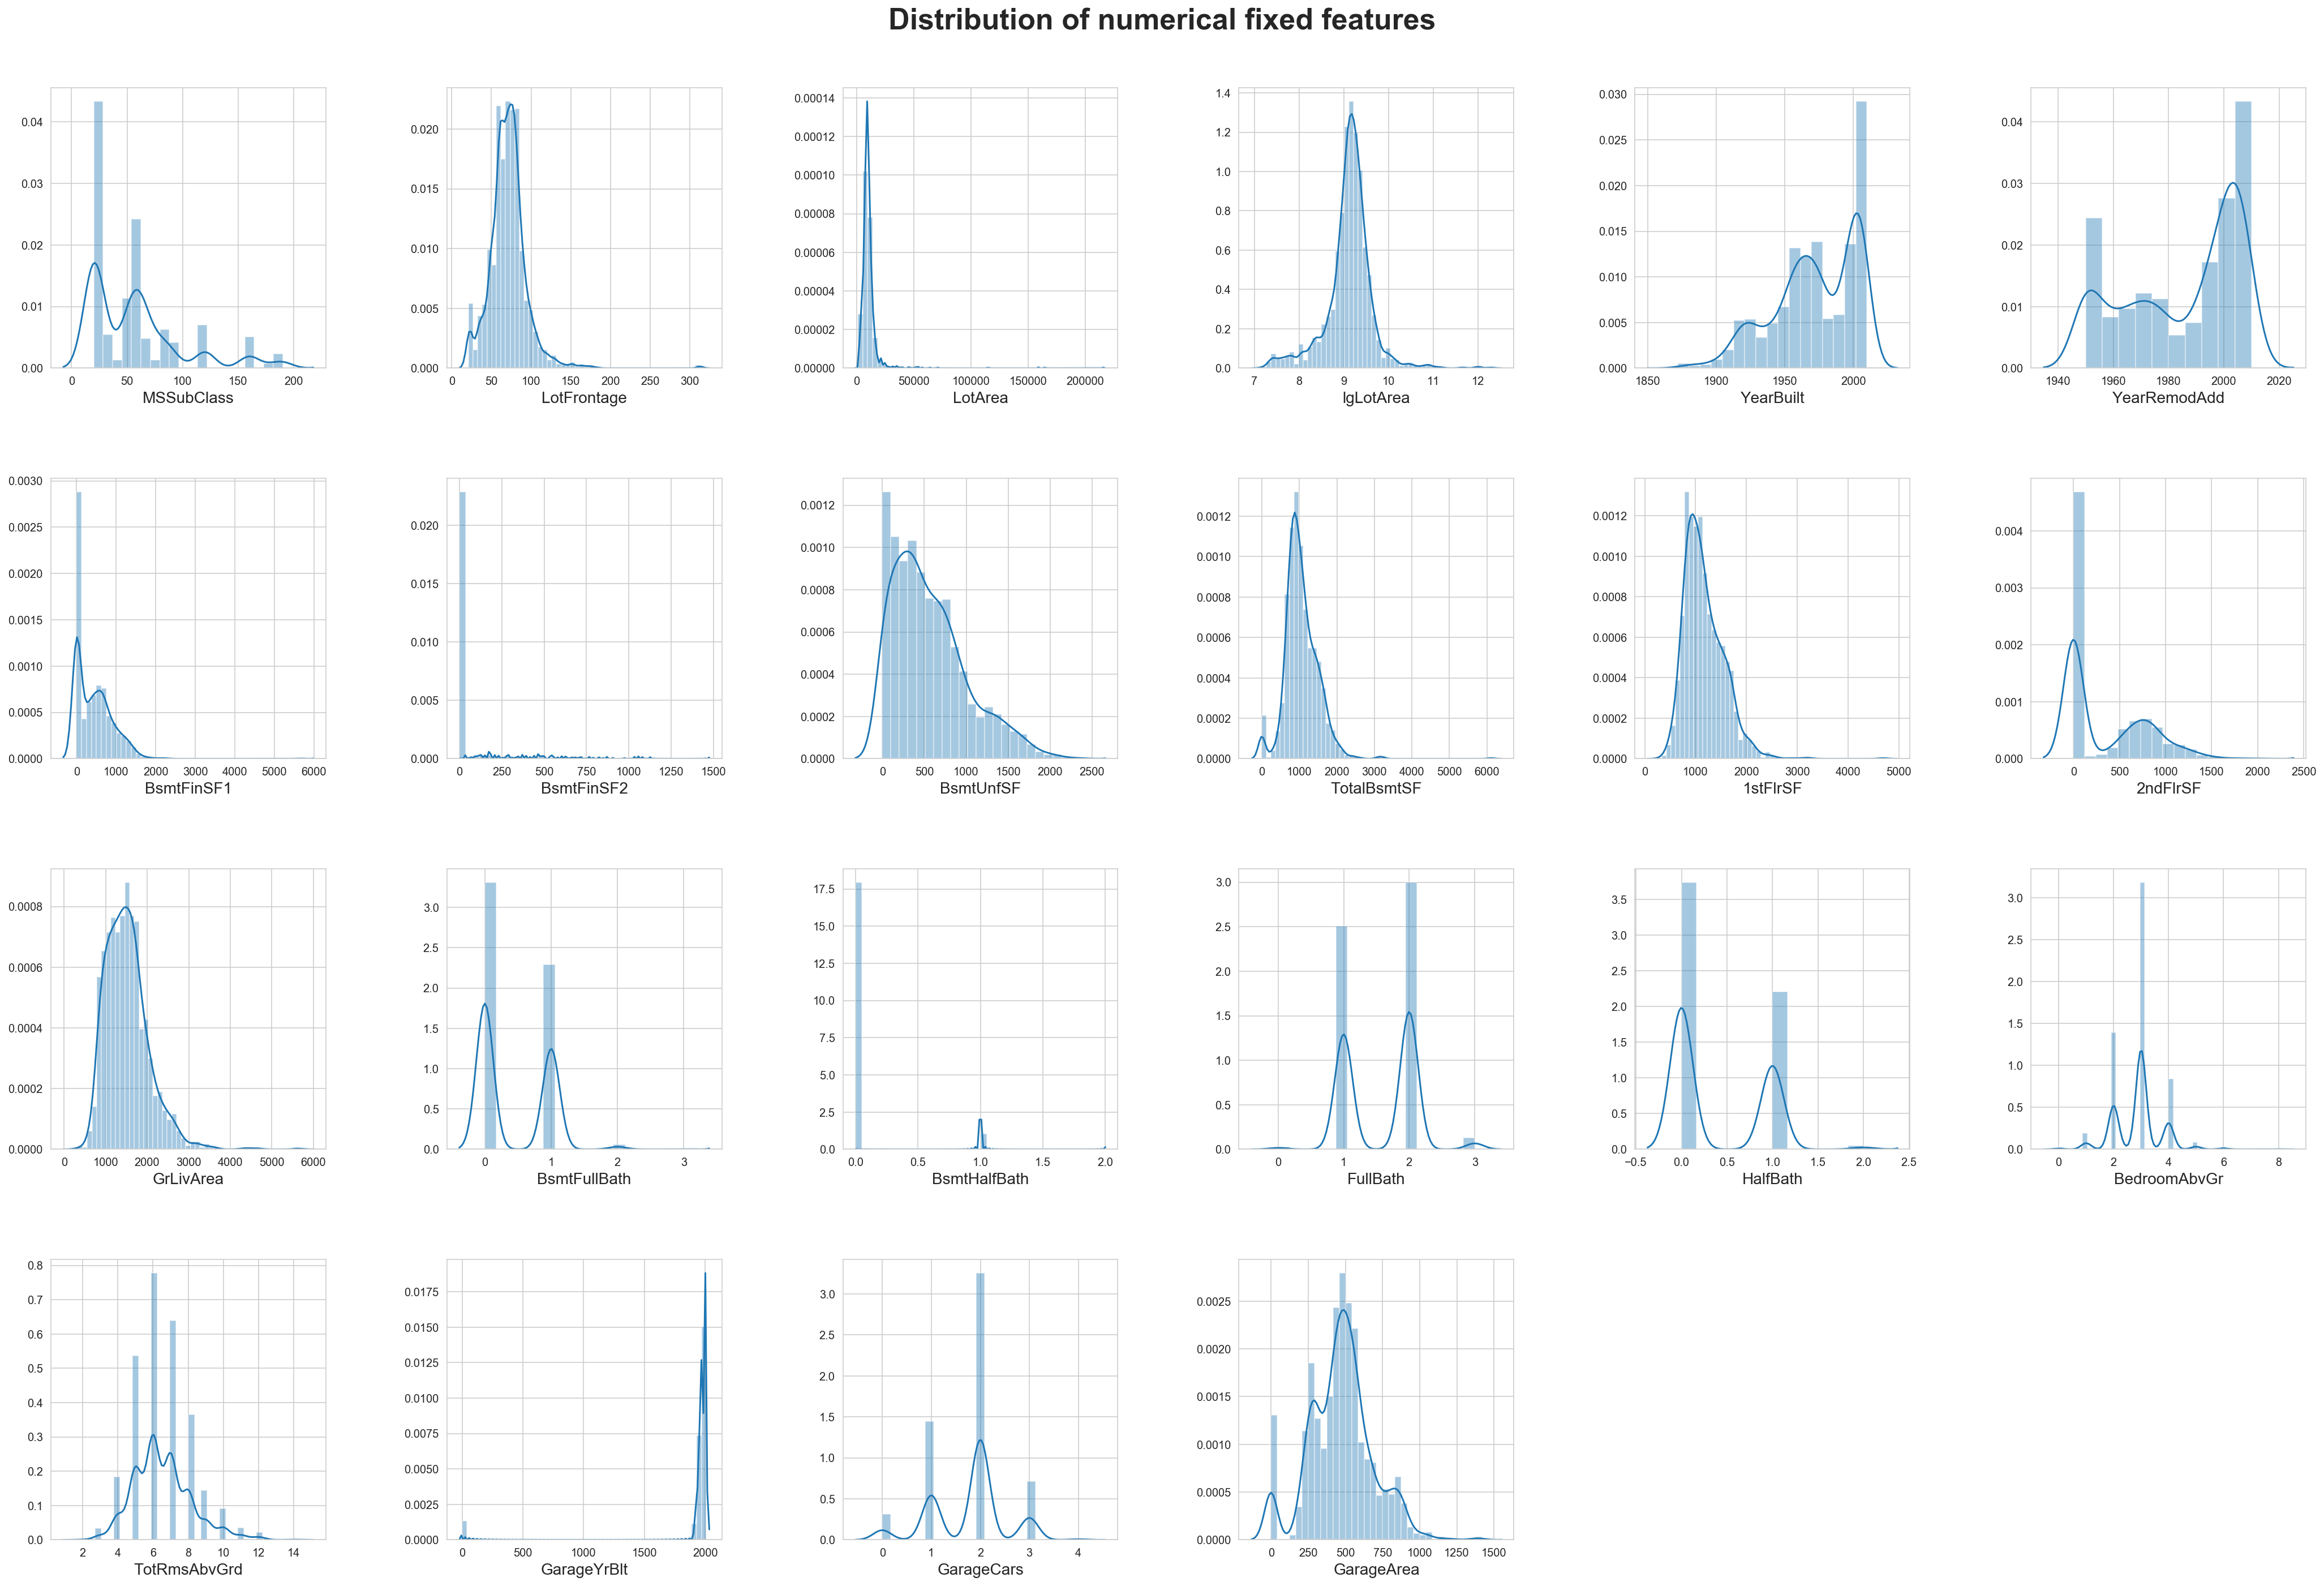

In [21]:
# Plot distribution of fixed features, continuous variables # 

f, ax= plt.subplots(4,6,figsize=(30,20))
axes=ax.flatten()
ax[3,4].axis('off')
ax[3,5].axis('off')

for x,ax in zip(house_fixed_num.columns[:22],axes):
    sns.distplot(house_fixed_num[x],ax=ax)
    ax.set_xlabel(x,fontsize=14)
f.suptitle('Distribution of numerical fixed features',fontsize=26,y=1.005,fontweight='bold')

plt.tight_layout(pad=6)

We'll do some feature engineering here just looking at the distributions of the variables. The area variables look quite skewed, so we'll take the log of those. For those with a point mass at zero because of the absence of the feature, eg. Garage we'll also generate a dummy variable for the presence of the feature.

In [22]:
## Feature Engineering for continuous variables ## 

# Dummy variables for those features that have a concentration of None values # 

house['has_garage']=house['GarageYrBlt'].apply(lambda x: 1 if x>0 else 0)
house['is_two_storey']=house['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
house['has_basement']=house['BsmtFinSF1'].apply(lambda x: 1 if x>0 else 0)


# Apply log transform for skewed variables  # 

house['lgLotFrontage']=np.log1p(house['LotFrontage'])
house['lgGrLivArea']=np.log1p(house['GrLivArea'])
house['lgTotalBsmtSF']=np.log1p(house['TotalBsmtSF'])

# Store feature description in a list # 

eng_fixed_features=['has_garage','is_two_storey','has_basement','lgLotFrontage','lgGrLivArea','lgTotalBsmtSF']

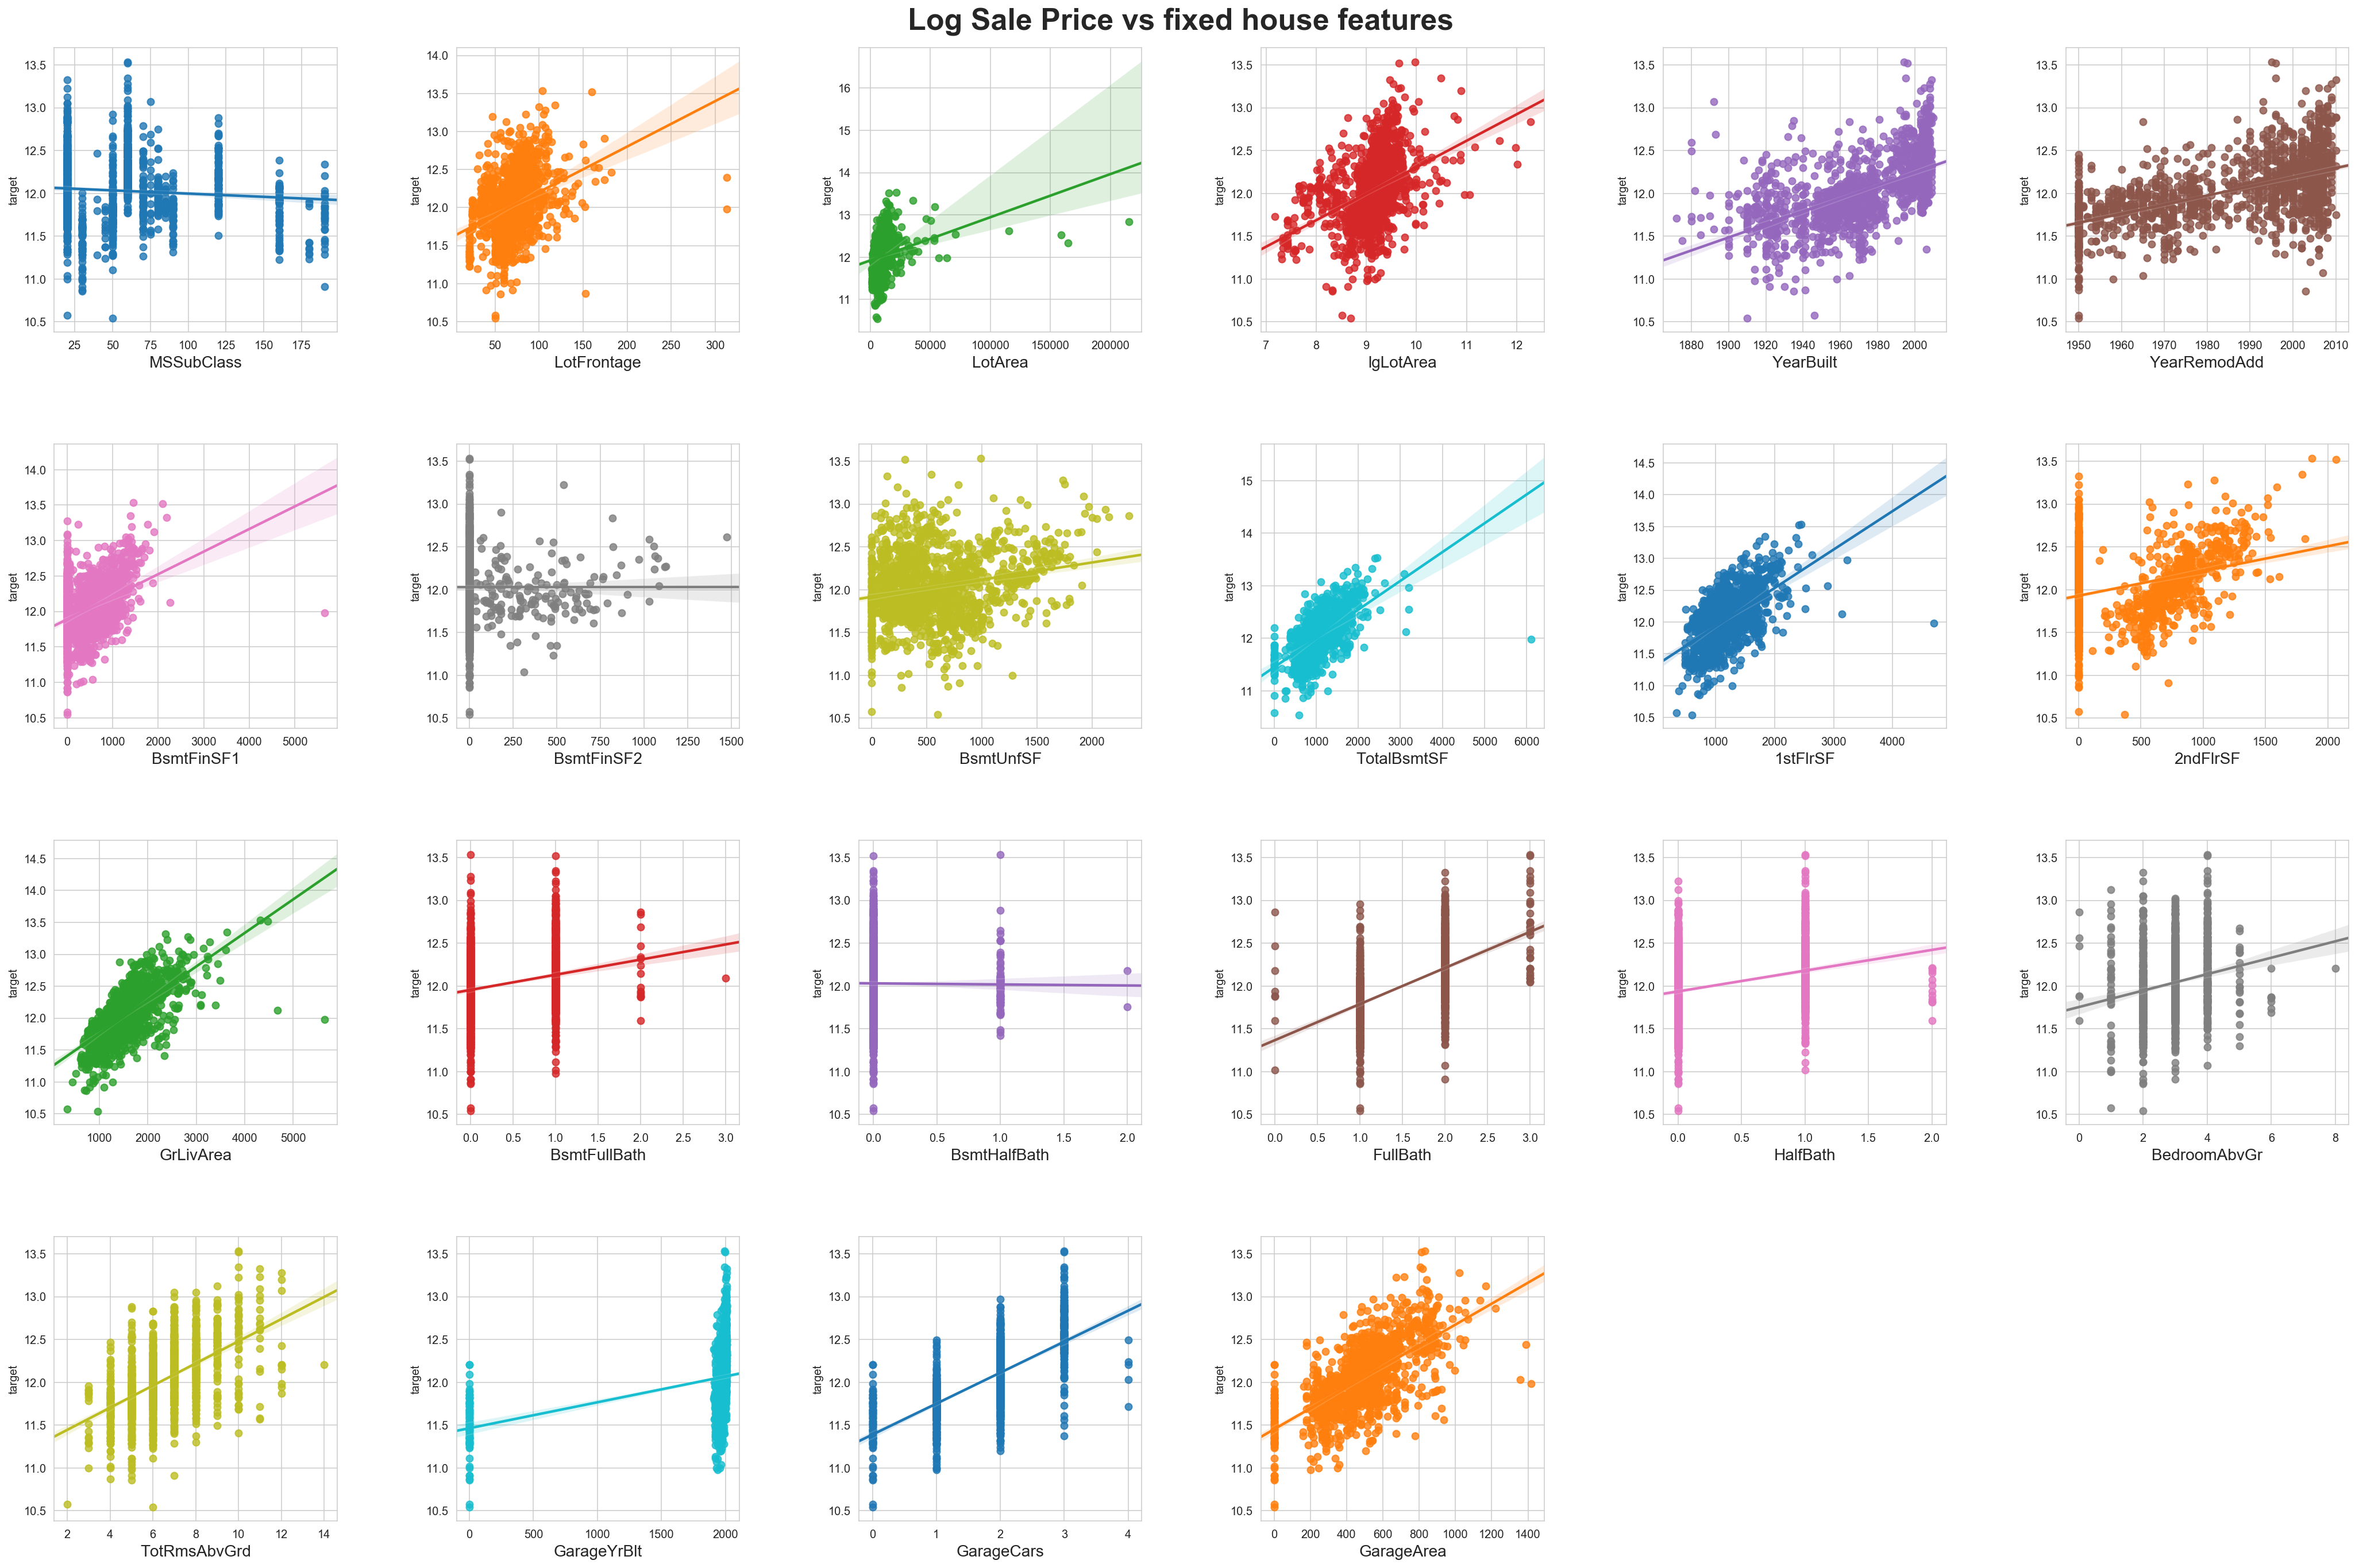

In [23]:
# Examine which numerical features have a linear relationship with target variable # 
f, ax= plt.subplots(4,6,figsize=(30,20))
axes=ax.flatten()
ax[3,4].axis('off')
ax[3,5].axis('off')

for x,ax in zip(house_fixed_num.columns[:22],axes):
    sns.regplot(x=x,y='target',data=house_fixed_num,ax=ax)
    ax.set_xlabel(x,fontsize=14)
f.suptitle('Log Sale Price vs fixed house features',fontsize=26,fontweight='bold')

plt.tight_layout(pad=6)

plt.show()


We see a number of strong predictive features here, particularly the area variables eg. `GarageArea`, `GrLivArea`,`lgLotArea`. 

In [24]:
# Take a look at ordinal and pseudo numeric features # 

cat_int_features=['MSSubClass','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', ]
len(cat_int_features)

8

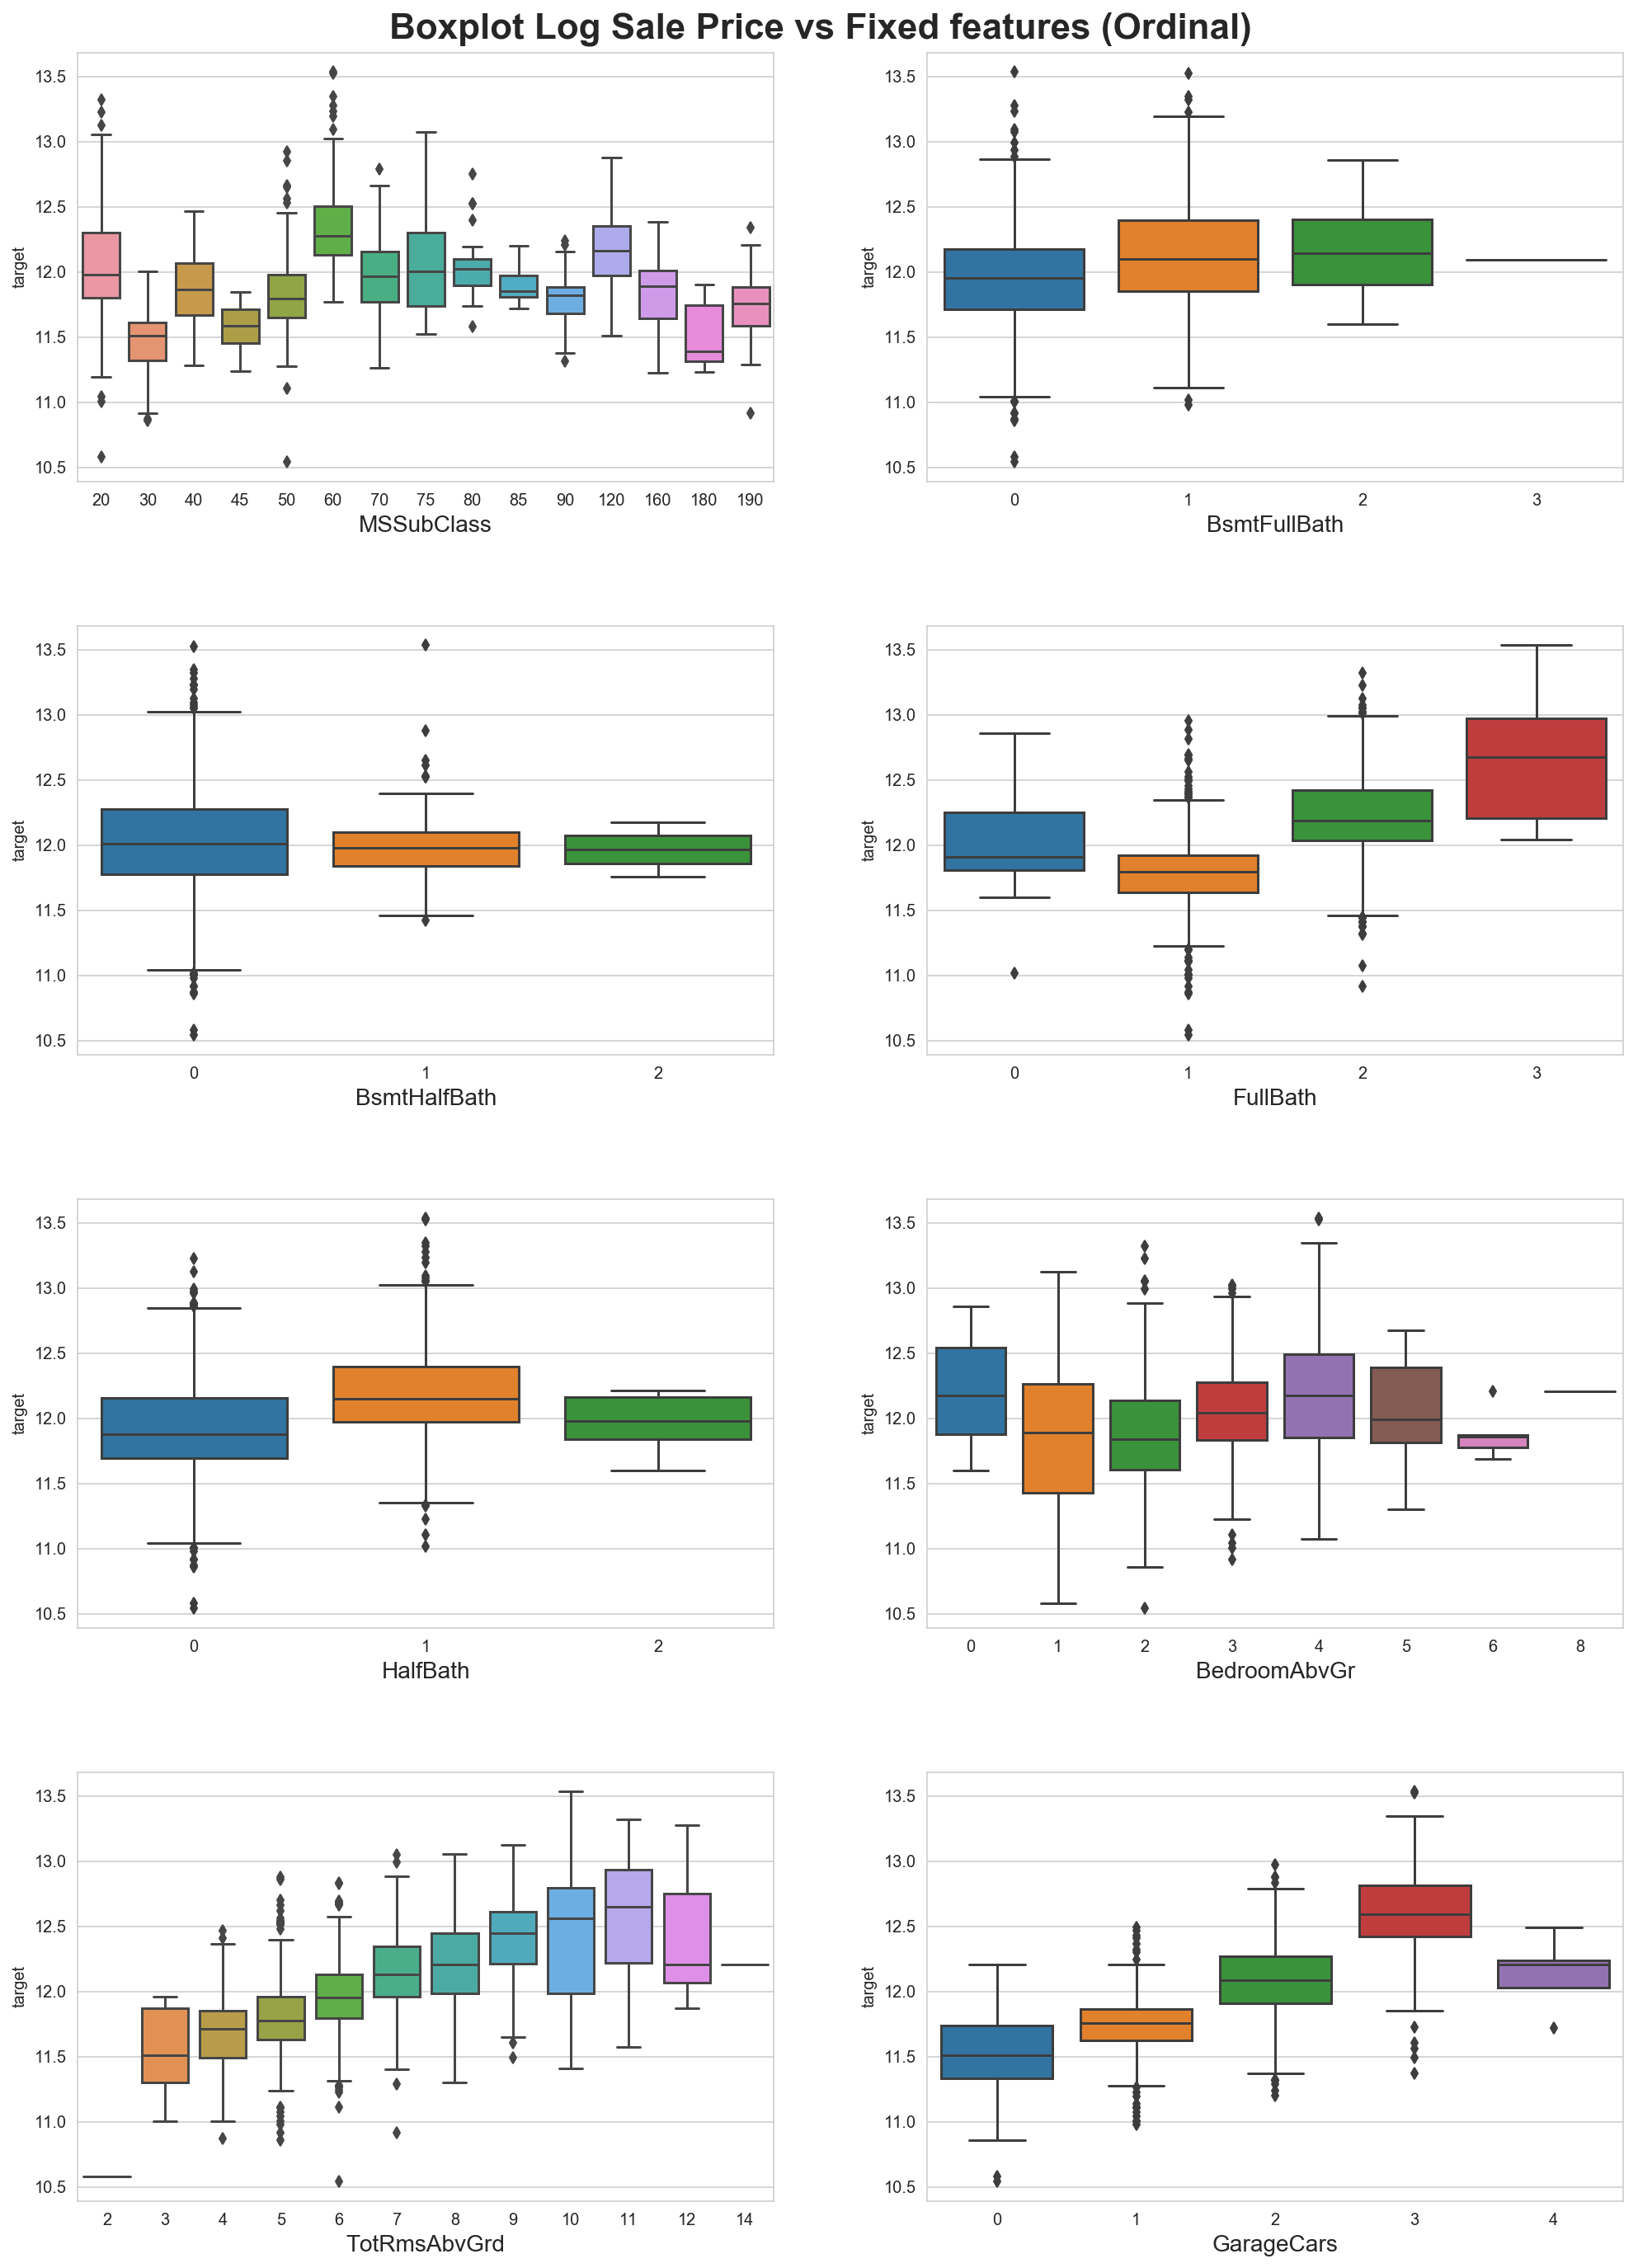

In [25]:
f, ax= plt.subplots(4,2,figsize=(15,20))
axes=ax.flatten()

for feature,ax in zip(house[cat_int_features].columns,axes):
    sns.boxplot(x=feature,y='target',data=house,ax=ax)
    ax.set_xlabel(feature,fontsize=14)
f.suptitle('Boxplot Log Sale Price vs Fixed features (Ordinal)',fontsize=22,fontweight='bold')
plt.tight_layout(pad=5)
plt.show()


We observe some positive relationships across ordinal variables eg. `FullBath` and `TotRmsAbvGrd`. These would possibly be strong predictors in our initial model. 

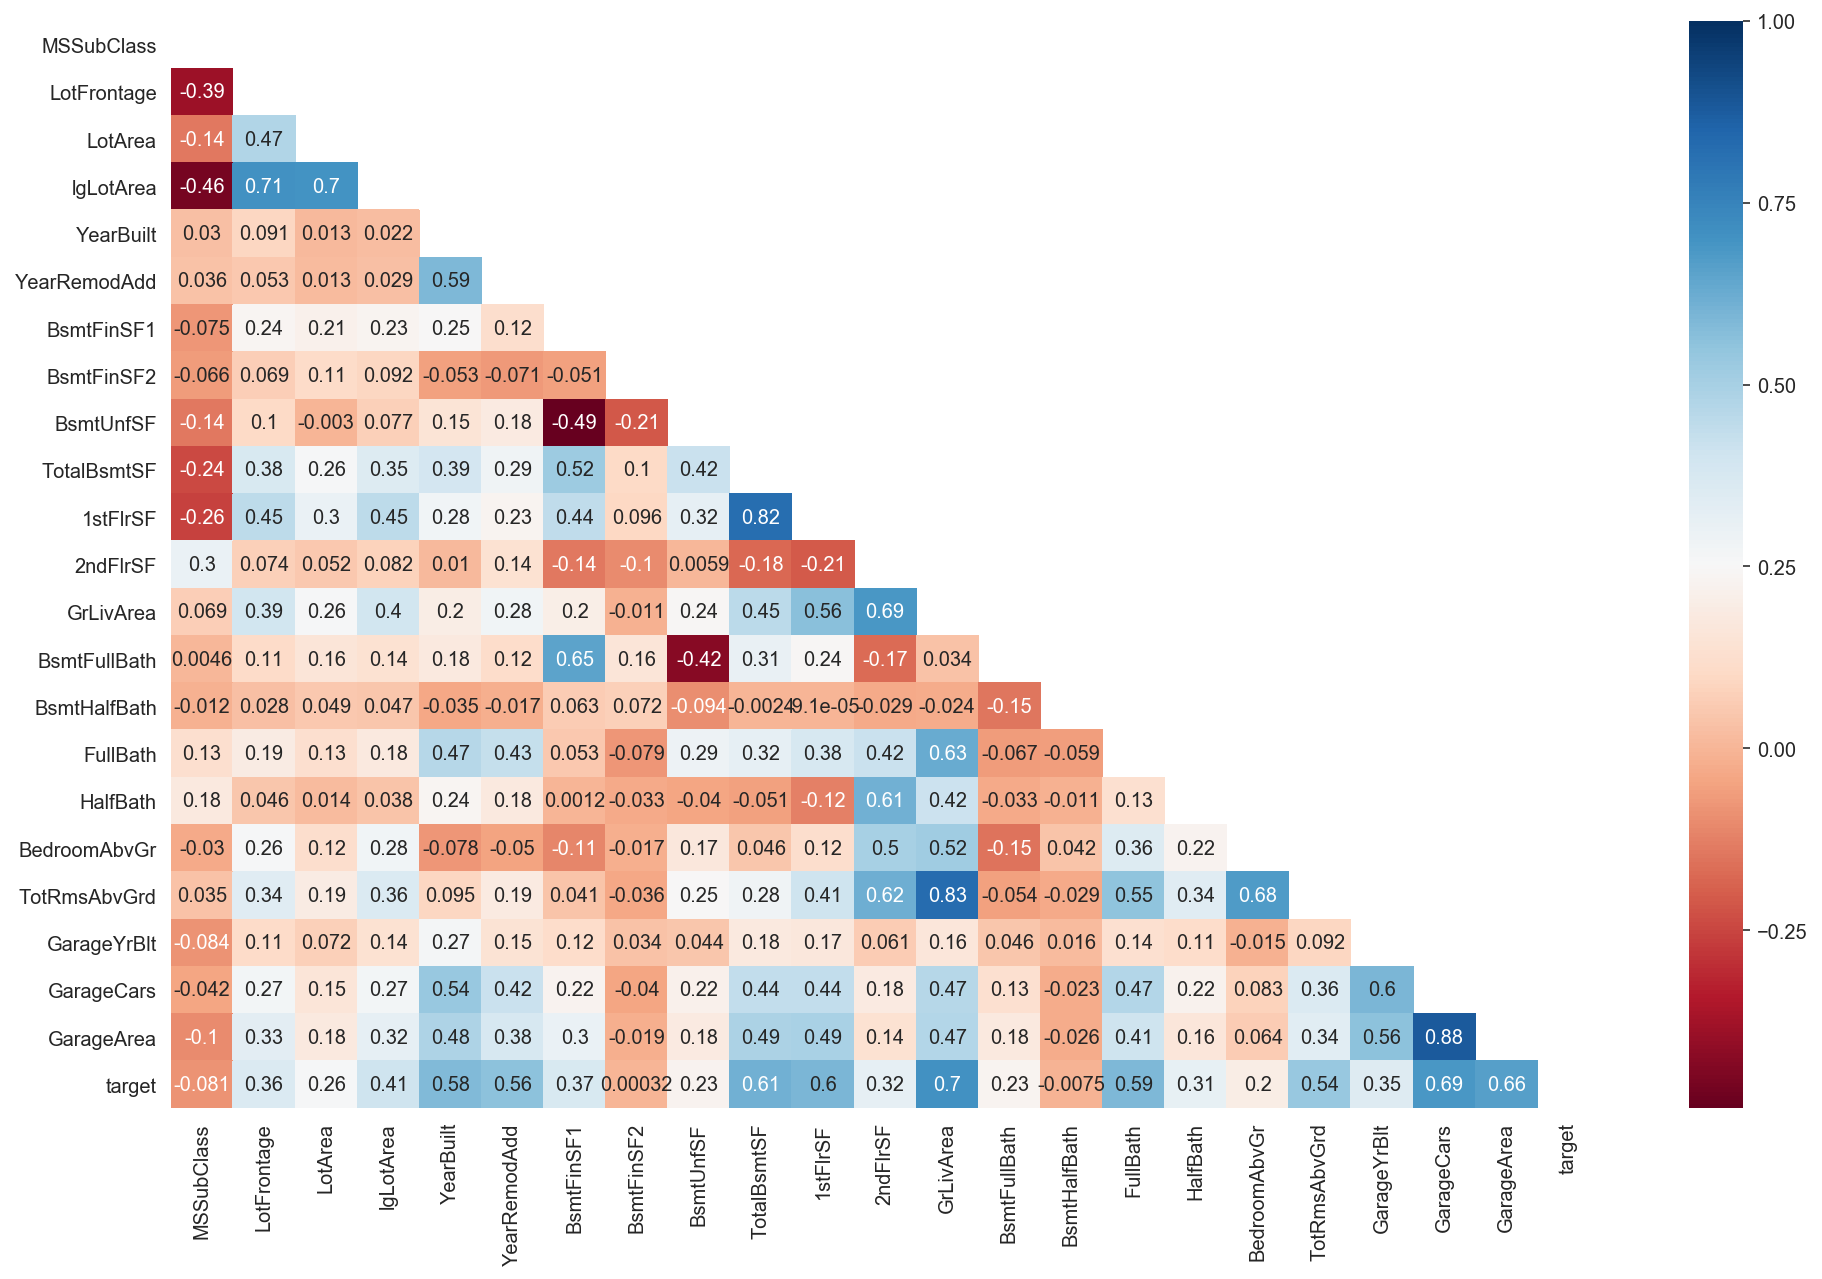

In [26]:
def tri_corr_heatmap(df,annot=True):
    """
        Returns a triangular heatmap of correlation matrix
    """

    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(),mask=mask,annot=annot, cmap='RdBu')
    
plt.figure(figsize=(16,10))

tri_corr_heatmap(house_fixed_num)

We don't see much collinearity here, except between `GarageCars` and `GarageArea`, sa well as `GrLivArea` and `TotalRmsAbvGrd`. Both `GarageCars` and `GarageArea` describe garage size, but we'll probably pick just `GarageArea` since it contains more information on the garage. 

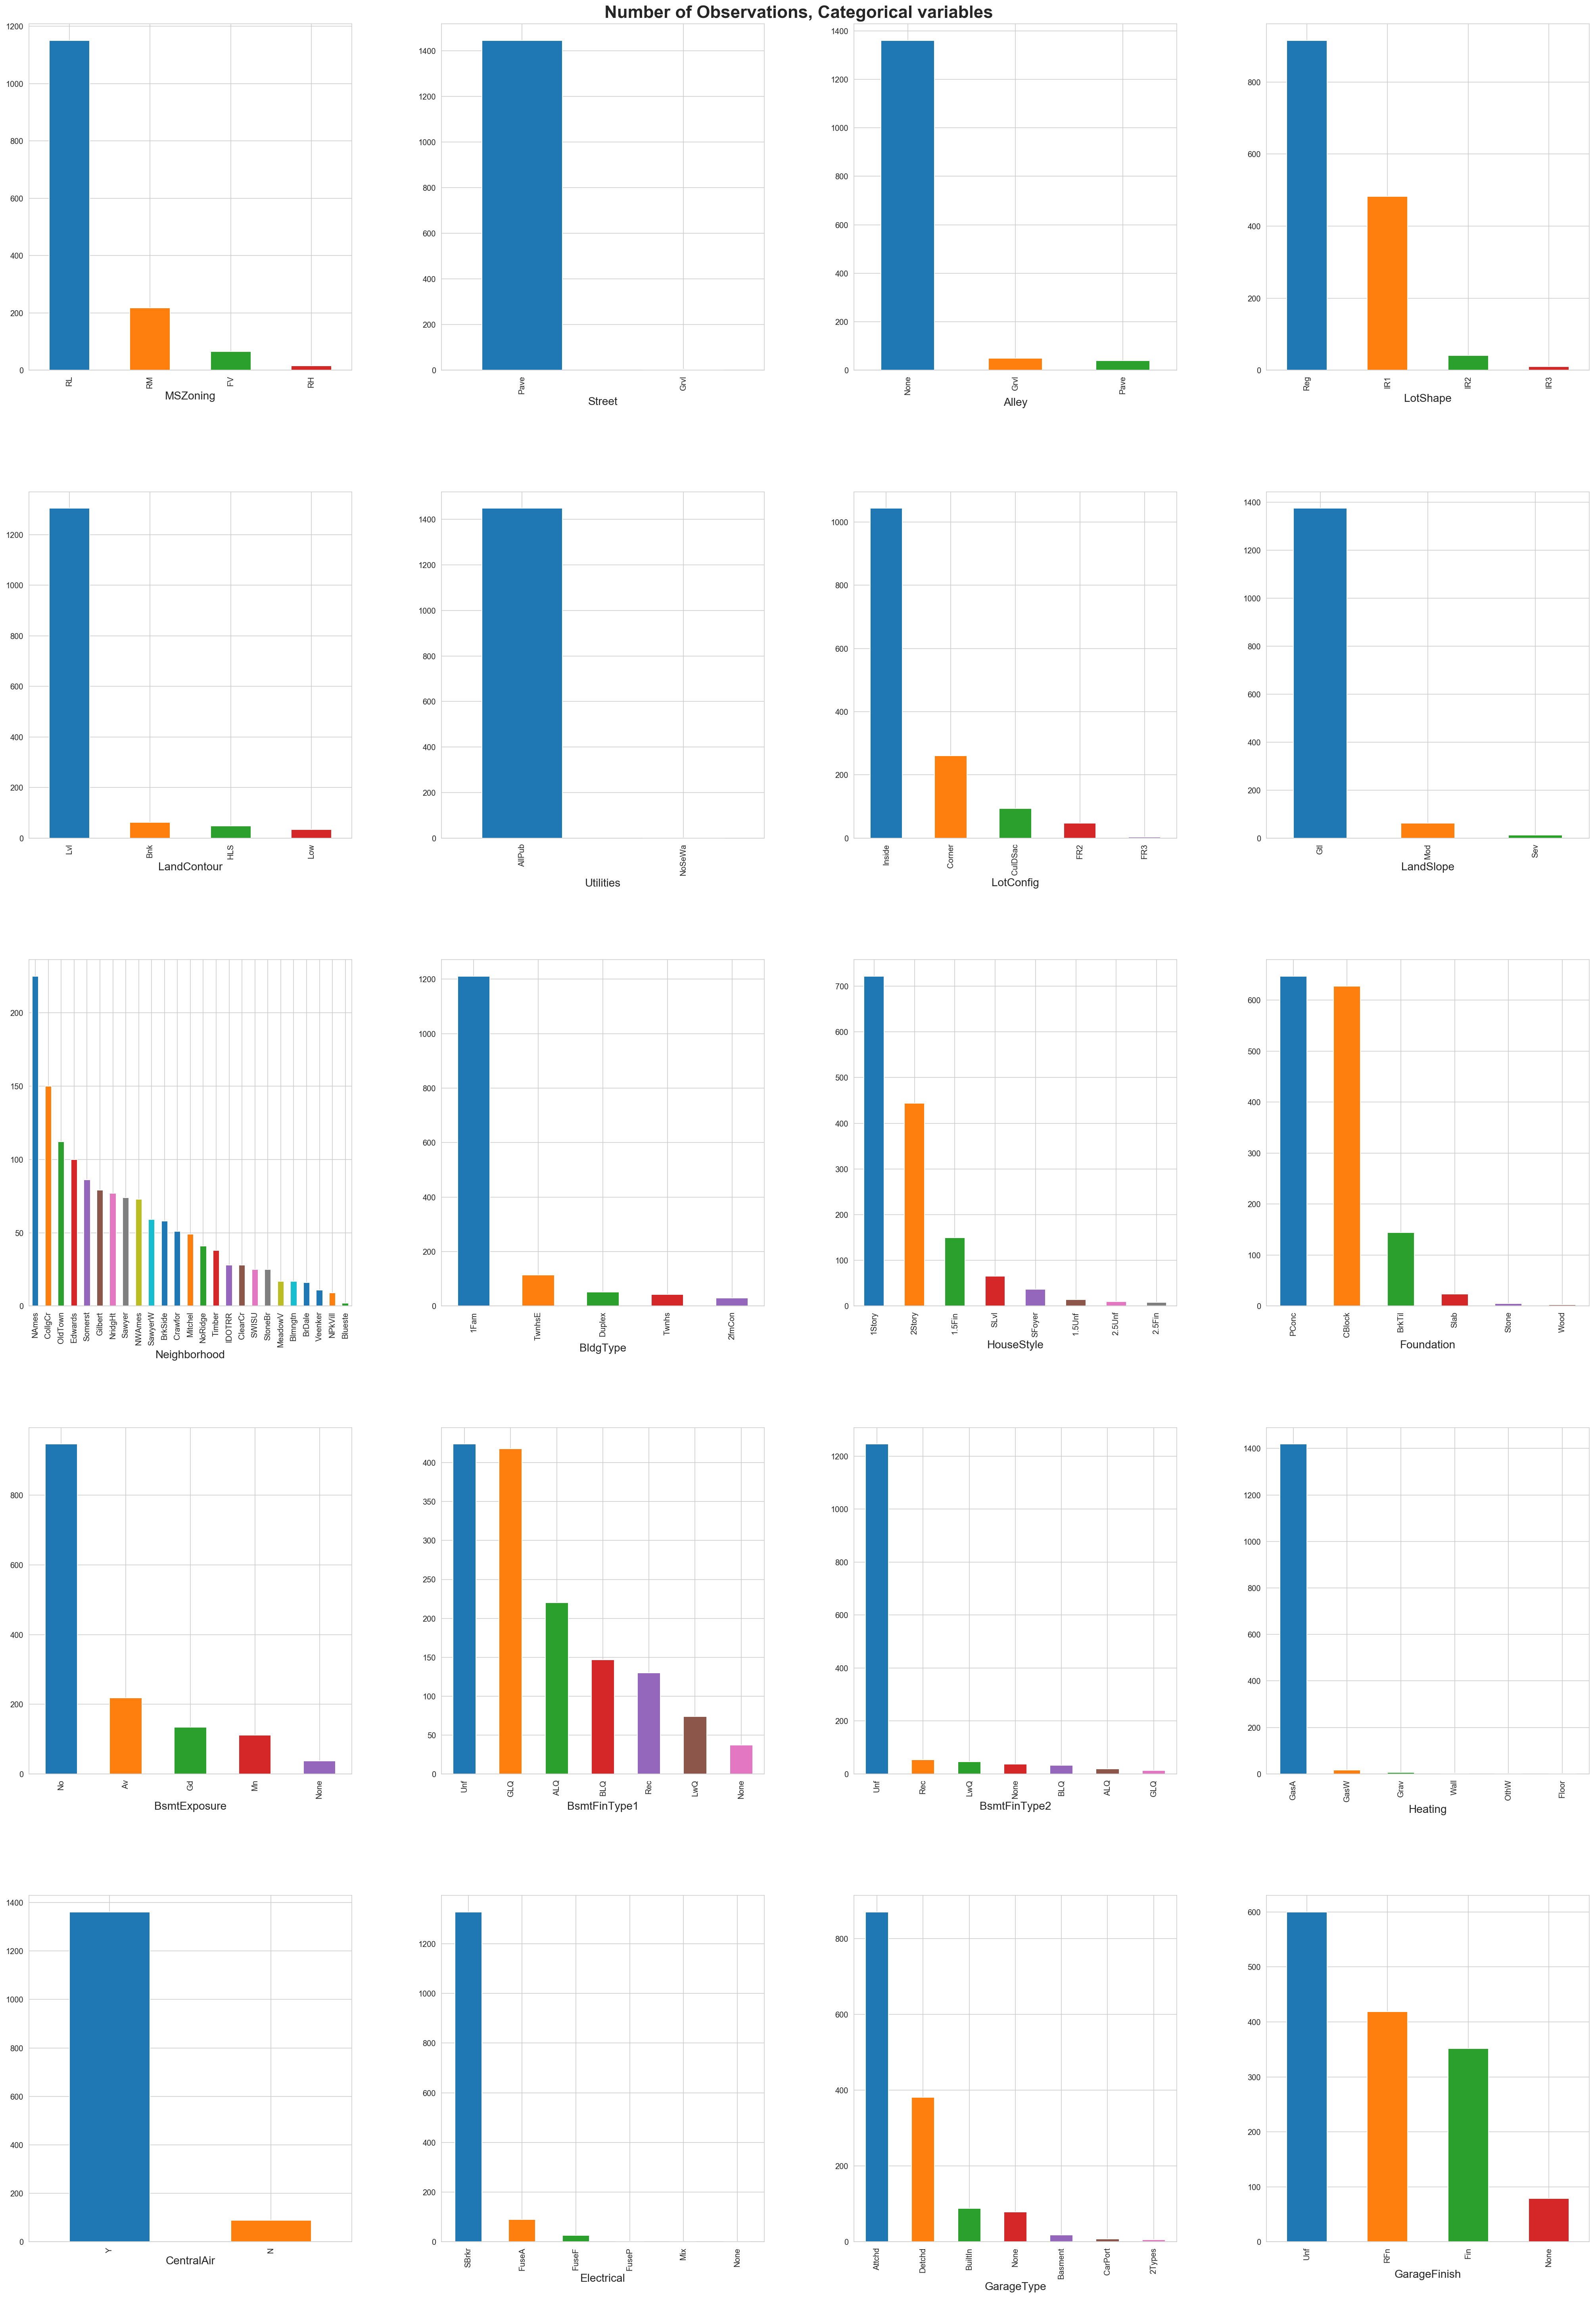

In [27]:
# Take a look at categorical features 

house_cat=house[fixed_features].select_dtypes(exclude=['int64','float64'])

f, ax= plt.subplots(5,4,figsize=(30,42))
axes=ax.flatten()

for feature,ax in zip(house_cat.columns,axes):
    house_cat[feature].value_counts().plot.bar(ax=ax)
    ax.set_xlabel(feature,fontsize=14)

f.suptitle('Number of Observations, Categorical variables',fontsize=22,fontweight='bold')
plt.tight_layout(pad=8)
plt.show()


There are several imbalanced classes here, so instead of converting all categorical variables into dummies, I'll probably be taking the majority class as a dummy for those with major class imbalance, eg. `GarageType`,`BsmtFinType2`,`Heating`,`LandSlope`,`LandContour`,`Alley`

I'll drop `Utilities` and `Street` out of the analysis completely since there are only <5  observations in the  minority class.

I'll encode dummy variables for the rest. 

In [28]:
# Take majority class for imbalanced classes # 

imb_classes=['Alley', 'LotShape', 'LandContour', 'LandSlope','BsmtFinType2', 'Heating', 'Electrical']

for feature in imb_classes:
    majority_class=house[feature].value_counts().index[0]
    house['is_'+feature+'_'+majority_class]=house[feature].apply(lambda x: 1 if x==majority_class else 0)

# Generate dummies for other categorical variables # 

cat_features=[a for a in house_cat.columns if a not in imb_classes+['Utilities','Street','MSSubClass']]

dummies=pd.get_dummies(house[cat_features],drop_first=True)



In [29]:
house_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'CentralAir', 'Electrical', 'GarageType', 'GarageFinish'],
      dtype='object')

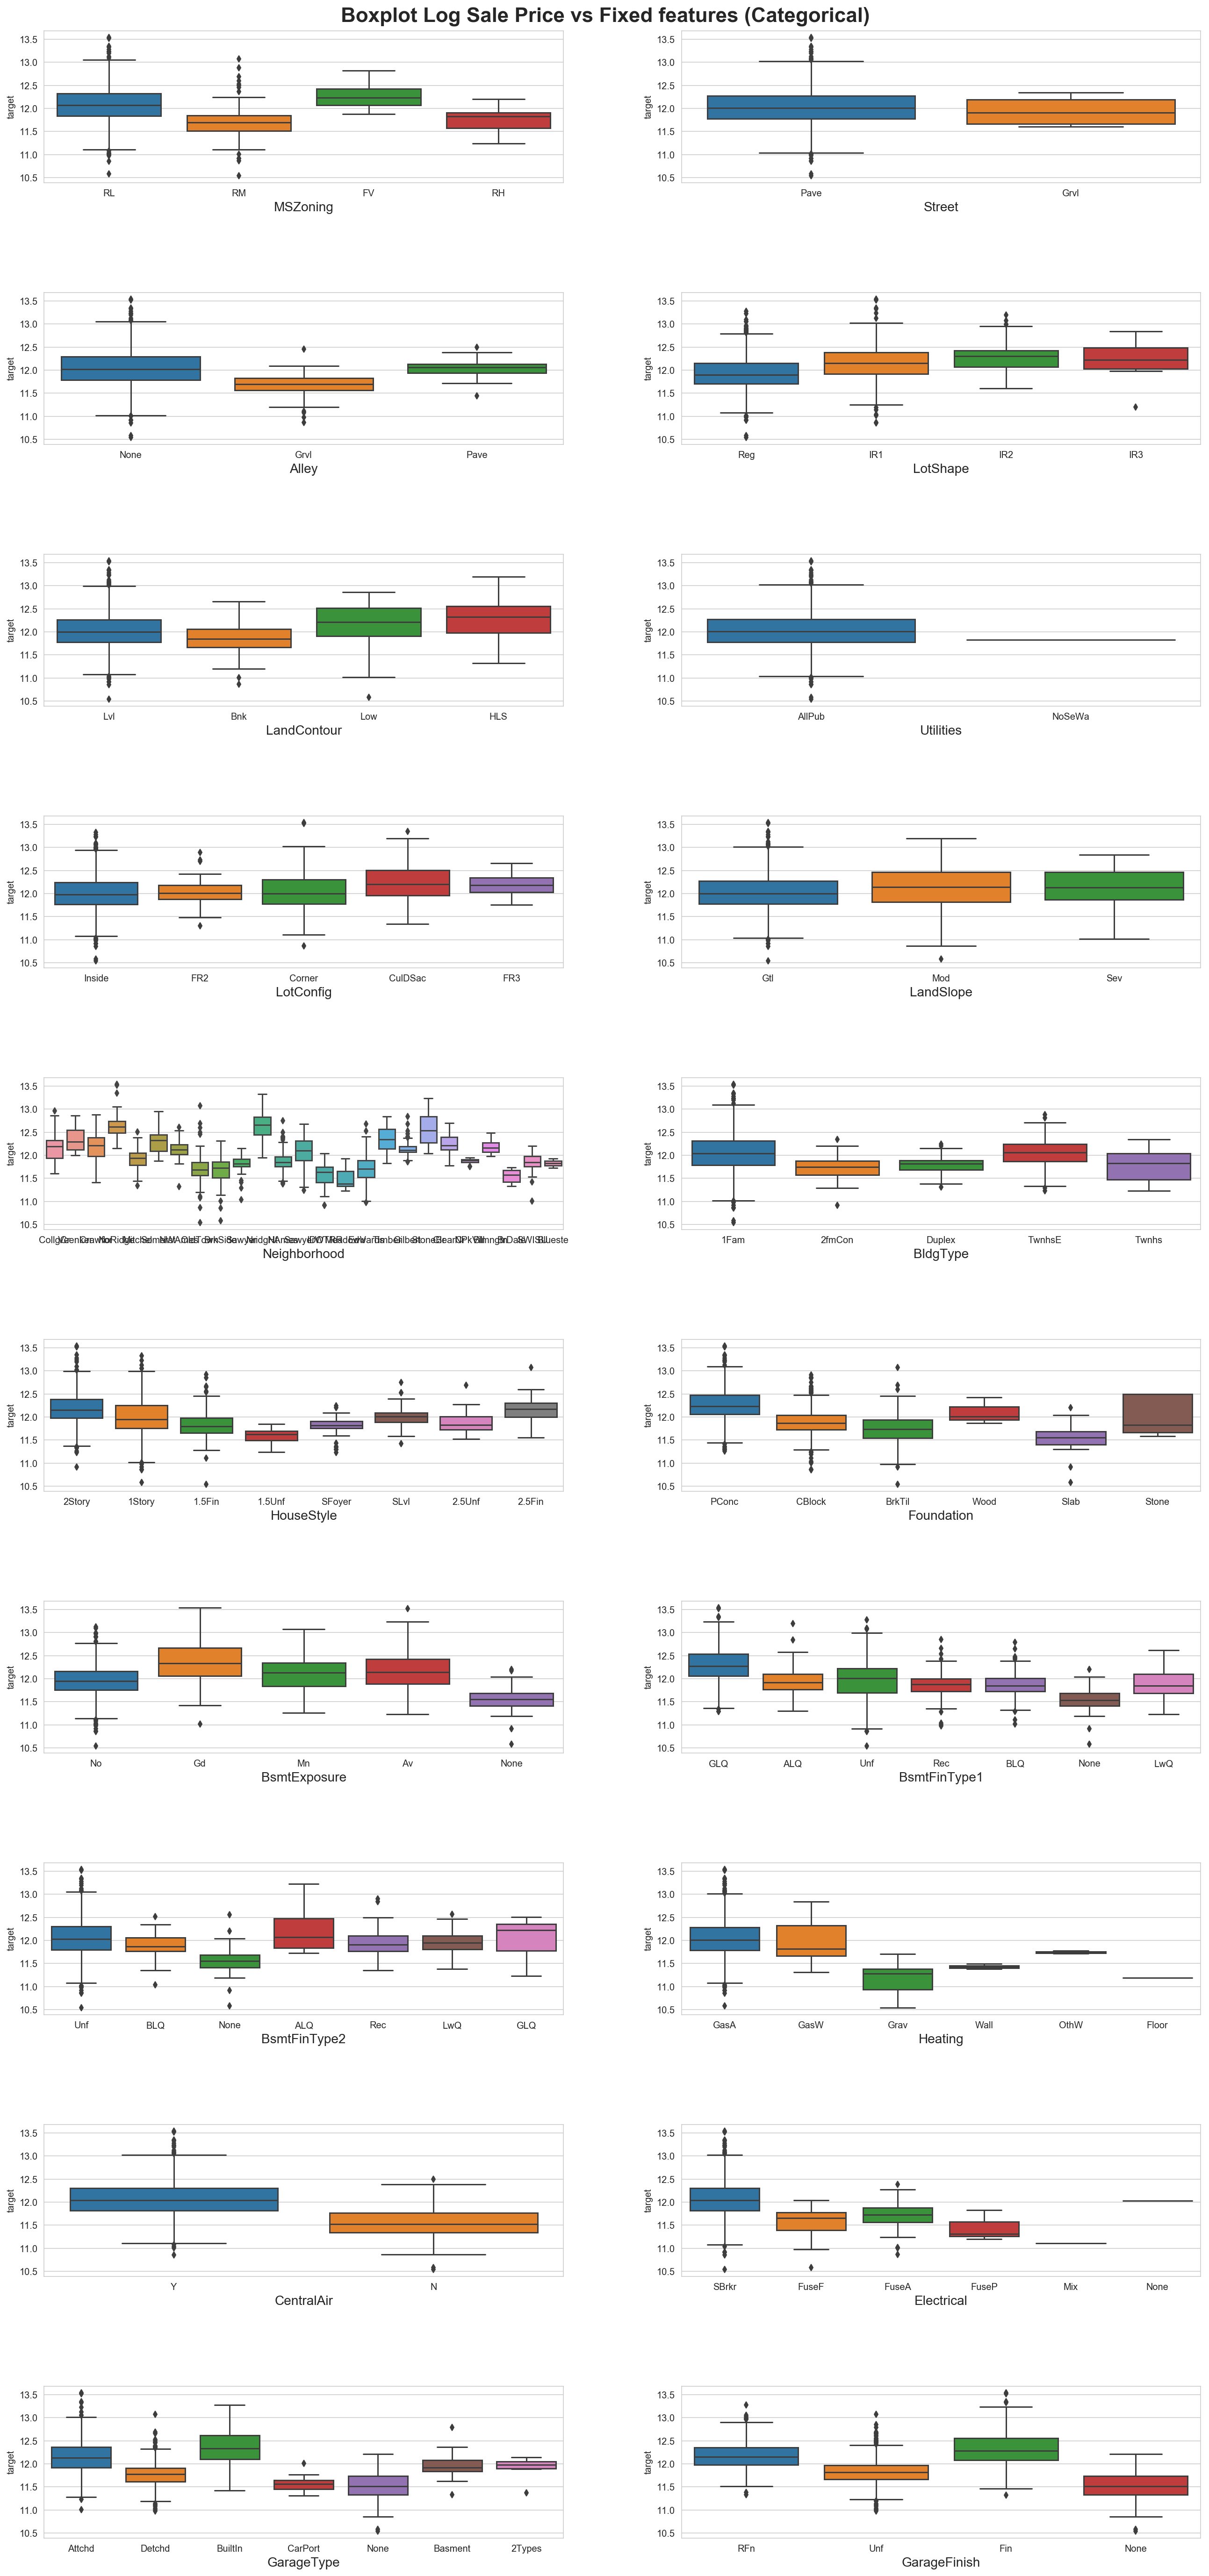

In [30]:
# Plot categorical vs log sale price # 
f, ax= plt.subplots(10,2,figsize=(20,40))
axes=ax.flatten()

for feature,ax in zip(house_cat.columns,axes):
    sns.boxplot(x=feature,y='target',data=house,ax=ax)
    ax.set_xlabel(feature,fontsize=14)

f.suptitle('Boxplot Log Sale Price vs Fixed features (Categorical)',fontsize=22,fontweight='bold')
plt.tight_layout(pad=8)
plt.show()


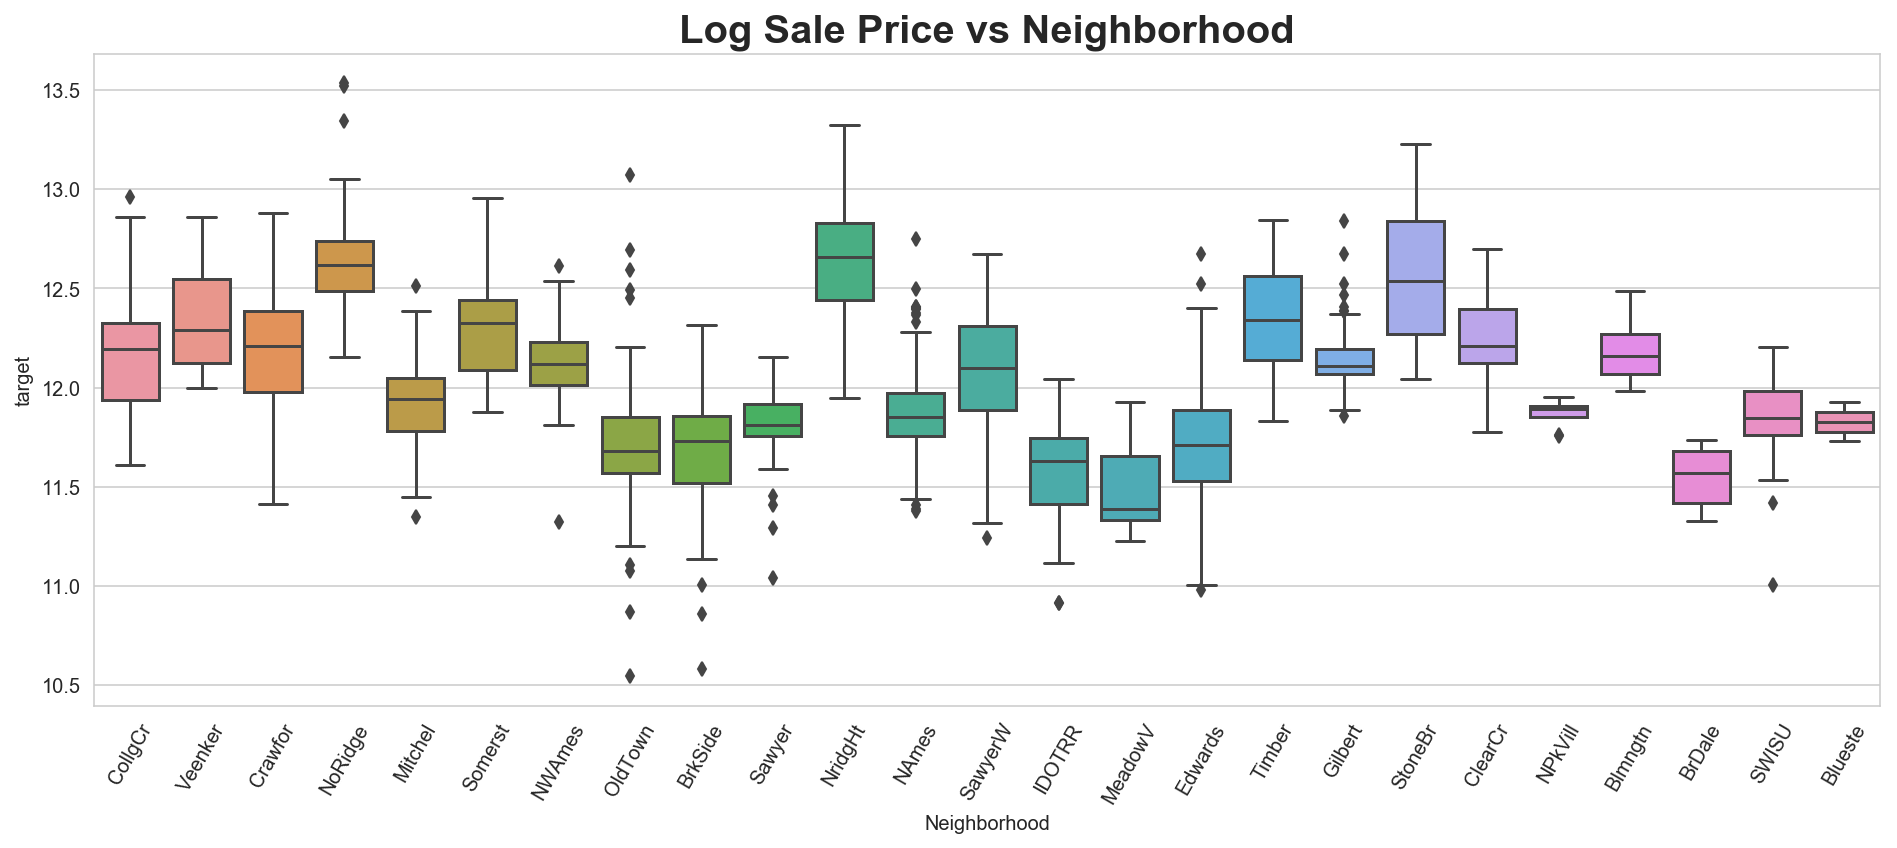

In [31]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='Neighborhood',y='target',data=house)
labels=ax.get_xmajorticklabels()
ax.set_xticklabels(labels,rotation=60)
ax.set_title('Log Sale Price vs Neighborhood',fontsize=20,fontweight='bold')
plt.show()


From the boxplots, there are no standout categorical features. We'll try modelling next.

## Modelling ## 

I'll be trying 6 different models in this problem. OLS, Lasso, Ridge, ElasticNet and Random Forest Regressor. I'll be looking at OLS mainly to generate the coefficients to analyse the contribution of each feature to the sale price. 

In [32]:
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet, ElasticNetCV, LassoCV, Lasso, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.svm import SVR 

In [33]:
# Setting up my feature set # 

house=pd.concat([house,dummies],axis=1)

fix_features=fixed_features+eng_fixed_features+dummies.columns.tolist()
house['lgGrLivArea']=np.log1p(house['GrLivArea'])
house['lgTotalBsmtSF']=np.log1p(house['TotalBsmtSF'])

to_remove=['LotArea','LotFrontage', 'GrLivArea','TotalBsmtSF',# Taken log of area
           'Utilities','Street', # Imbalanced classes
           'Neighborhood'] + house_cat.columns.tolist() # Categorical Features 
fix_features=[a for a in fix_features if a not in to_remove]

# Split into training set and test set # 

test_ind=house['YrSold']==2010

# Scale feature set 

X=house[fix_features]
Xs=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns,index=test_ind.index)

Xtrain=Xs[-test_ind]
ytrain=house[-test_ind]['target']
Xtest=Xs[test_ind]
ytest=house[test_ind]['target']


# Check df shape # 
assert(X.shape==(1450,91))

In [34]:
# Fit 1, OLS # 

X_ols=sm.add_constant(Xtrain)
fit1=sm.OLS(ytrain,X_ols).fit()
fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     109.6
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:35:59   Log-Likelihood:                 797.38
No. Observations:                1278   AIC:                            -1417.
Df Residuals:                    1189   BIC:                            -958.1
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0301      0.004   3186.411      0.000      12.023      12.037
MSSubClass              -0.0065      0.019     -0.334      0.739      -0.044       0.032
lgLotArea                0.0407      0.008      5.181      0.000       0.025       0.056
YearBuilt                0.0402      0.012      3.407      0.001       0.017       0.063
YearRemodAdd             0.0499      0.006      8.789      0.000       0.039       0.061
BsmtFinSF1              -0.0680      0.019     -3.536      0.000      -0.106      -0.030
BsmtFinSF2              -0.0232      0.008     -2.913      0.004      -0.039      -0.008
BsmtUnfSF               -0.0709      0.020     -3.625      0.000      -0.109      -0.033
1stFlrSF                -0.0140      0.020     -0.717      0.473      -0.052       0.024
2ndFlrSF                 0.0391      0.017      2.257      0.024       0.005       0.073
BsmtFullBath             0.0124      0.006      2.043      0.041       0.000       0.024
BsmtHalfBath             0.0062      0.004      1.539      0.124      -0.002       0.014
FullBath                 0.0207      0.007      2.923      0.004       0.007       0.035
HalfBath                 0.0159      0.006      2.580      0.010       0.004       0.028
BedroomAbvGr            -0.0158      0.006     -2.487      0.013      -0.028      -0.003
TotRmsAbvGrd             0.0024      0.009      0.281      0.779      -0.015       0.020
GarageYrBlt             -0.2490      0.153     -1.625      0.104      -0.550       0.052
GarageCars               0.0441      0.010      4.533      0.000       0.025       0.063
GarageArea               0.0048      0.010      0.487      0.627      -0.015       0.024
has_garage               0.0743      0.050      1.481      0.139      -0.024       0.173
is_two_storey           -0.0017      0.020     -0.088      0.930      -0.040       0.037
has_basement            -0.0275      0.009     -3.166      0.002      -0.045      -0.010
lgLotFrontage           -0.0094      0.008     -1.209      0.227      -0.025       0.006
lgGrLivArea              0.1693      0.021      8.078      0.000       0.128       0.210
lgTotalBsmtSF            0.3018      0.047      6.488      0.000       0.211       0.393
MSZoning_RH              0.0025      0.005      0.450      0.653      -0.008       0.013
MSZoning_RL             -0.0011      0.015     -0.073      0.942      -0.030       0.028
MSZoning_RM             -0.0043      0.015     -0.291      0.771      -0.033       0.025
LotConfig_CulDSac        0.0076      0.005      1.601      0.110      -0.002       0.017
LotConfig_FR2           -0.0109      0.004     -2.533      0.011      -0.019      -0.002
LotConfig_FR3           -0.0051      0.004     -1.398      0.162      -0.012       0.002
LotConfig_Inside        -0.0004      0.005     -0.082    

In [35]:
p=fit1.pvalues<0.05

print("{:2.2f} percent of variables are statistically significant".format(sum(p)*100/len(p)))
print("-------------------------------------------------------------\n")
      
print("List of statistically significant variables at 95% confidence level: {} ".format(p[p].index.tolist()),flush=True)


43.48 percent of variables are statistically significant
-------------------------------------------------------------

List of statistically significant variables at 95% confidence level: ['const', 'lgLotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageCars', 'has_basement', 'lgGrLivArea', 'lgTotalBsmtSF', 'LotConfig_FR2', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Foundation_Stone', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_LwQ', 'BsmtFinType1_None', 'BsmtFinType1_Unf', 'CentralAir_Y', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf'] 


Here, the basic Linear Regression fit reveals that over half of the features are statistically significant, which means some regularisation is definitely necessary to improve model generalisation.

I'll be trying another 5 models next: Ridge, Lasso, Elastic Net, Random Forest Regression and Support Vector Regression. 

In [36]:
def print_cross_val_results(model,name,X,y,scoring=None,folds=5):
    
    '''
        Takes a fitted model (sklearn type) object, feature and target set and performs 
        5 fold cross validation using R^2 as a metric for regression and accuracy as a default for a
        classification problem.
        
        Prints the scores, mean and std of the scores. 
        
    '''
    print( '------------------------------------\n')
    print('{}-Fold Cross Validated Results for Model: '.format(folds)+ name)
    
    # Compute cross val score # 
    
    scores = cross_val_score(model, X, y, scoring=scoring, cv=folds)
    
    if scoring==None:
        print("Cross-validated scores:", scores)
        print("Mean CV score:", np.mean(scores))
        print('Std CV score:', np.std(scores))
        
    else:
        print("Cross-validated scores:", scores)
        print("Mean CV {}:".format(scoring), np.mean(scores))
        print('Std CV score {}:'.format(scoring), np.std(scores))
        

In [37]:
# Fit 2, Ridge # 

ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(Xtrain, ytrain)

print("Ridge will be run at alpha = {:5.2f}".format(optimal_ridge.alpha_))

fit2=Ridge(alpha=optimal_ridge.alpha_).fit(Xtrain,ytrain)

print_cross_val_results(fit2,"Ridge",Xtrain,ytrain)


Ridge will be run at alpha = 13.26
------------------------------------

5-Fold Cross Validated Results for Model: Ridge
Cross-validated scores: [ 0.8956248   0.86313335  0.85392676  0.8709274   0.78893819]
Mean CV score: 0.854510100043
Std CV score: 0.0355930409371


In [38]:
# Fit 3, Lasso # 

optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)

print("Lasso will be run at alpha = {:5.7f}".format(optimal_lasso.alpha_))

fit3=Lasso(alpha=optimal_lasso.alpha_).fit(Xtrain,ytrain)

print_cross_val_results(fit3,"Lasso",Xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso will be run at alpha = 0.0026021
------------------------------------

5-Fold Cross Validated Results for Model: Lasso
Cross-validated scores: [ 0.89685853  0.86422363  0.86185384  0.86958565  0.79176362]
Mean CV score: 0.856857054498
Std CV score: 0.0348669591352


..........................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [39]:
# Fit 4, ENet #

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=5)
optimal_enet.fit(Xtrain, ytrain)

print("ElasticNet will be run at alpha = {:5.7f}; L1 ratio= {:5.7f}".format(optimal_enet.alpha_,optimal_enet.l1_ratio_))

fit4=ElasticNet(alpha=optimal_enet.alpha_,l1_ratio=optimal_enet.l1_ratio_).fit(Xtrain,ytrain)

print_cross_val_results(fit4,'Elastic Net',Xtrain,ytrain)

ElasticNet will be run at alpha = 0.0037388; L1 ratio= 0.6700000
------------------------------------

5-Fold Cross Validated Results for Model: Elastic Net
Cross-validated scores: [ 0.8968404   0.86423252  0.86177549  0.86992266  0.79167462]
Mean CV score: 0.856889138554
Std CV score: 0.0349190836254


In [40]:
# Fit 5, Random Forest Regressor # 

rfr=RandomForestRegressor()

# Set up hyperparameter grid # 

rfr_params={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50,100,150,200]}

# Grid search over hyperparameter grid # 

rfr_gridsearch=GridSearchCV(rfr,rfr_params,cv=5)
rfr_gridsearch.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print('Random Forest Regressor will be run using the following parameters : ')
print(rfr_gridsearch.best_params_)

rfr_best=rfr_gridsearch.best_estimator_
fit5=rfr_best.fit(Xtrain,ytrain)
print_cross_val_results(fit5,'Random Forest Regressor',Xtrain,ytrain)

Random Forest Regressor will be run using the following parameters : 
{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 200}
------------------------------------

5-Fold Cross Validated Results for Model: Random Forest Regressor
Cross-validated scores: [ 0.86352432  0.84282793  0.84571068  0.84179328  0.84280037]
Mean CV score: 0.847331314042
Std CV score: 0.00820145855336


In [42]:
# Fit 6 SV Regression # 

svr=SVR()
svr_param={
        'C':[0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel':['linear','poly','rbf'],
}
svr_gridsearch=GridSearchCV(svr,svr_param,cv=5)
svr_gridsearch.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
print('Support Vector Regression will be run with the following model parameters :')
print(svr_gridsearch.best_params_)
svr_best=svr_gridsearch.best_estimator_
fit6=svr_best.fit(Xtrain,ytrain)
print_cross_val_results(fit6,'Support Vector Regression',Xtrain,ytrain)

Support Vector Regression will be run with the following model parameters :
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
------------------------------------

5-Fold Cross Validated Results for Model: Support Vector Regression
Cross-validated scores: [ 0.90884826  0.85829269  0.87247826  0.88619095  0.80345592]
Mean CV score: 0.865853215729
Std CV score: 0.0353742043046


## Discussion of Results ## 

Let's look at the 5 models to see how they performed. 

|Metric|Ridge|Lasso|Elastic Net|Random Forest Regressor|Support Vector Regression|
|------|:---:|:---:|:---------:|:---------------------:|:-----------------------:|
|Mean 5-fold Cross Validated $R^2$ on training set|0.85|0.86|0.86|0.85|0.87|
|$R^2$ on test set|0.886|0.890|0.890|0.876|0.886|

Overall, the models performed fairly similarly when looking at the cross-validated $R^2$, but Lasso seems to perform the best. In fact, the linear models seem to be performing slightly better, possibly given that the log-transformations have linearised the relationship between target and the area features. Let's look at the which features contributed most to predicting the price when it comes to the Lasso regression. 



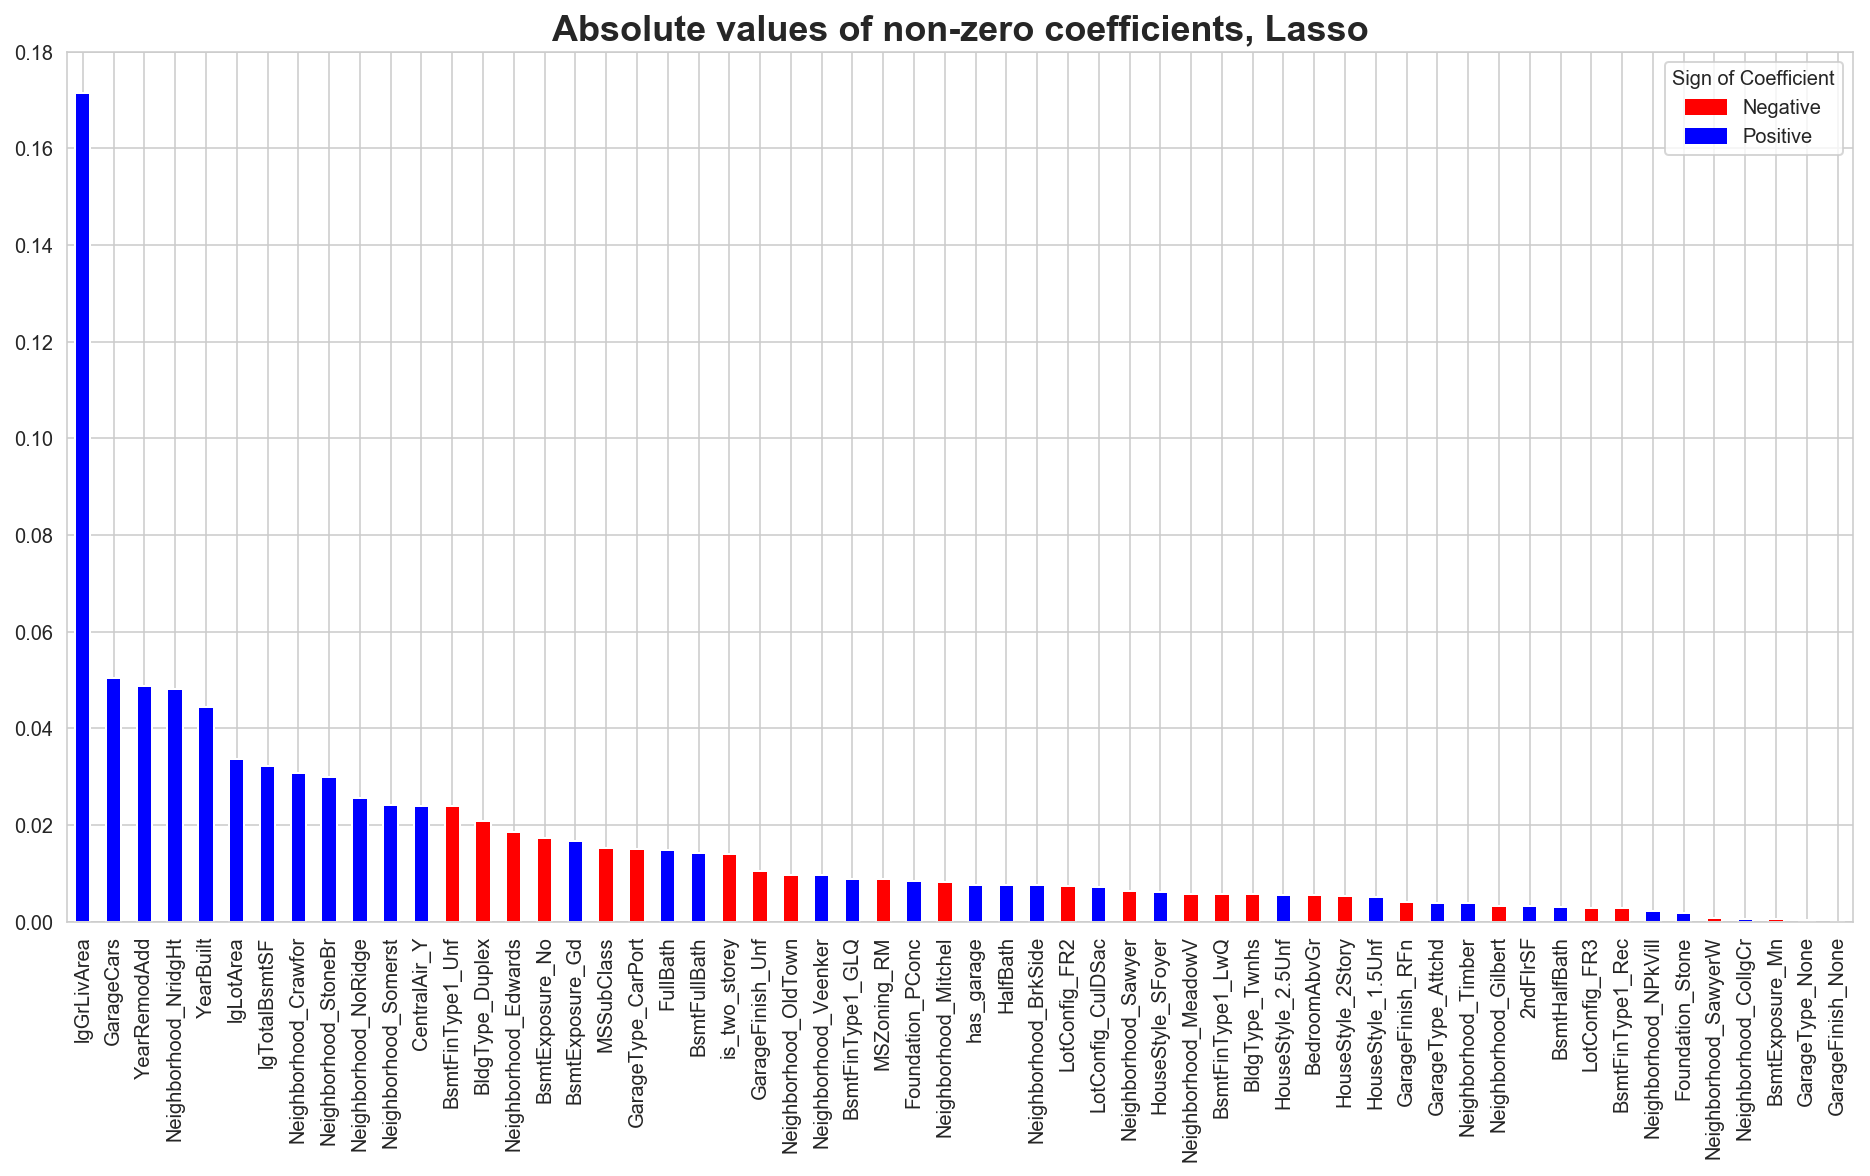

In [44]:


# Store lasso coefficient in a df # 
lasso_coefs = pd.DataFrame({'variable':Xtrain.columns,
                            'coef':fit3.coef_,
                            'abs_coef':np.abs(fit3.coef_),
                           })

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

# Positive coefficient = blue, Negative coefficient = Red # 
lasso_coefs['color']=lasso_coefs['coef'].apply(lambda x : 'blue' if x>0 else 'red')

f=plt.figure(figsize=(10,8))

# Generate labels # 
non_zero_variables=lasso_coefs['variable'][lasso_coefs['abs_coef']>0].tolist()

# Plot bar chart # 
f=lasso_coefs['abs_coef'][lasso_coefs['abs_coef']>0].plot.bar(color=lasso_coefs['color'][lasso_coefs['abs_coef']>0],figsize=(16,8))
f.set_xticklabels(non_zero_variables)

# Write legend # 
red_patch = mpatches.Patch(color='red', label='Negative')
blue_patch= mpatches.Patch(color='blue', label='Positive')
f.legend(handles=[red_patch,blue_patch],title='Sign of Coefficient')

# Set title # 
f.set_title('Absolute values of non-zero coefficients, Lasso',fontsize=18,fontweight='bold')


plt.show()

## What makes a house more expensive? ## 

* Size Matters
    * We can see area variables like `lgGrLivArea`, `lgLotArea` and `lgBsmtSF` rank highly by magnitude, and are strong predictors of price
    * The larger your house, or basement, the more expensive it is likely to be         
<br></br>
* Neighbourhood
    * The neighborhood that a house is in matters a fair bit.
    * Houses in Crawford, Stone Brook, Northridge and Somerset are generally more expensive    
<br></br>
* New-ness
    * `YearBuilt` and `YearRemodAdd` have a positive effect on price, indicating that it's more likely that newer houses command a premium in price

In [45]:
import matplotlib.lines as mlines

def act_pred_plots(y_true,y_hat,name,color=(0.2,0.4,0.6)):
    '''
        Takes target values and predictions, a name and returns an actual vs predicted plot
    '''

    ax=sns.scatterplot(y_hat,y_true,alpha=0.4,color=color)
    
    # Make it a square plot # 
    uplim=max(ax.get_xlim()+ax.get_ylim())
    lowlim=min(ax.get_xlim()+ax.get_ylim())
    ax.set_xlim(lowlim,uplim)
    ax.set_ylim(lowlim,uplim)
    
    # Add unit line # 
    lines=np.linspace(lowlim,uplim)
    line=mlines.Line2D(lines,lines,linestyle='--')
    ax.add_line(line)
    
    # Set title # 
    ax.set_title("Actual vs Predicted for Model: {}".format(name),fontsize=16,fontweight='bold')
    
    # Set axis labels # 

    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

def residual_plot(y_true,y_hat,name,color=(0.2,0.4,0.6)):
    '''
        Takes target values and predictions, a name and returns a residual plot
    '''

    resids=y_true-y_hat

    # Plot reisduals vs y first # 
    
    ax=sns.scatterplot(y_hat,resids,alpha=0.4,color=color)
    
    # Add y=0 line # 
    uplim=max(ax.get_xlim())
    lowlim=min(ax.get_xlim())
    lines=np.linspace(lowlim,uplim)
    zeros=np.zeros(50)
    line=mlines.Line2D(lines,zeros,linestyle='--')
    ax.add_line(line)
    
    # Set title # 
    ax.set_title("Residual Plot for Model: {}".format(name),fontsize=16,fontweight='bold')
    
    # Set labels # 
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Predicted')


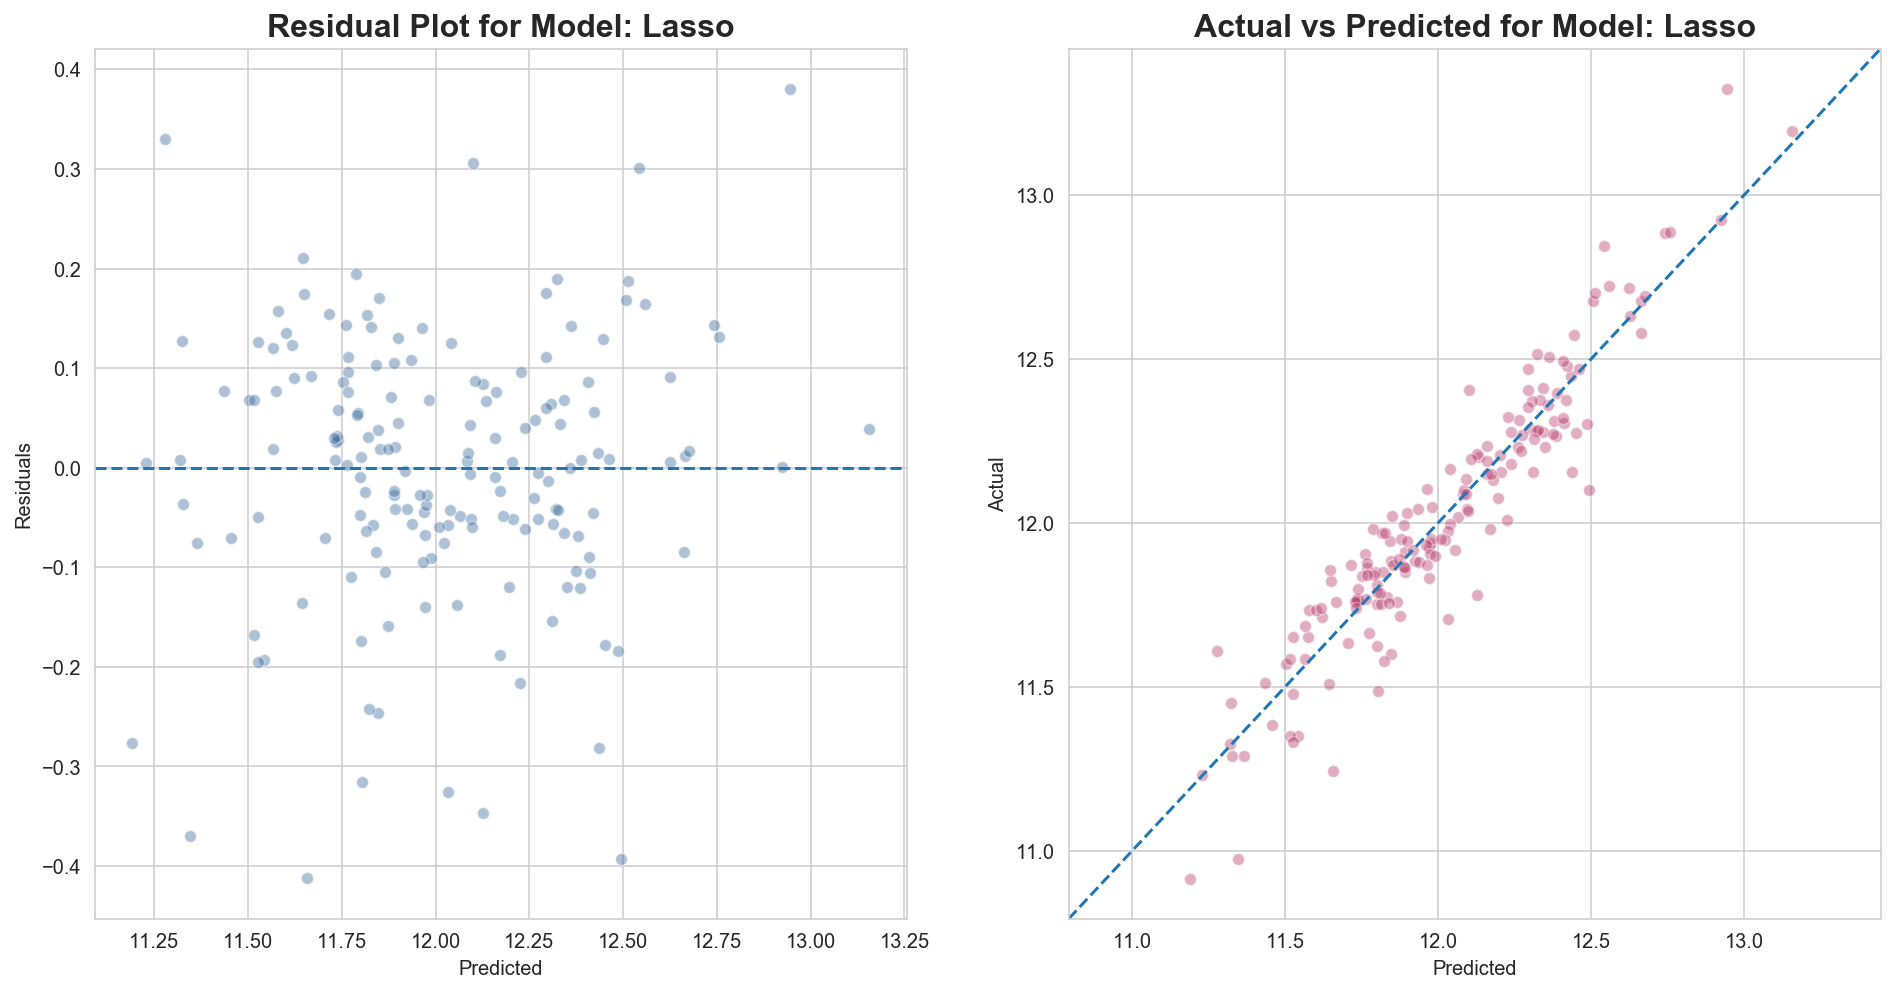

In [46]:
# Residual, Actual vs predicted  plot #
plt.figure(figsize=(16,8))
plt.subplot(121)

residual_plot(ytest,fit3.predict(Xtest),"Lasso")
plt.subplot(122)
act_pred_plots(ytest,fit3.predict(Xtest),"Lasso",color=(0.7,0.2,0.4))


There doesn't seem to be any systematic variation in the residual plot and the Actual vs Predicted plot looks fairly well-behaved. 



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

## New problem, new target ## 

We'll set up a similar analysis for the second part of this problem with a new target feature, which will be the residuals from the best performing first model, which is the Lasso model. 

In [47]:
# Define new target #

log_resids=house['target']-fit3.predict(Xs)
orig_resids=np.exp(house['target'])-np.exp(fit3.predict(Xs))



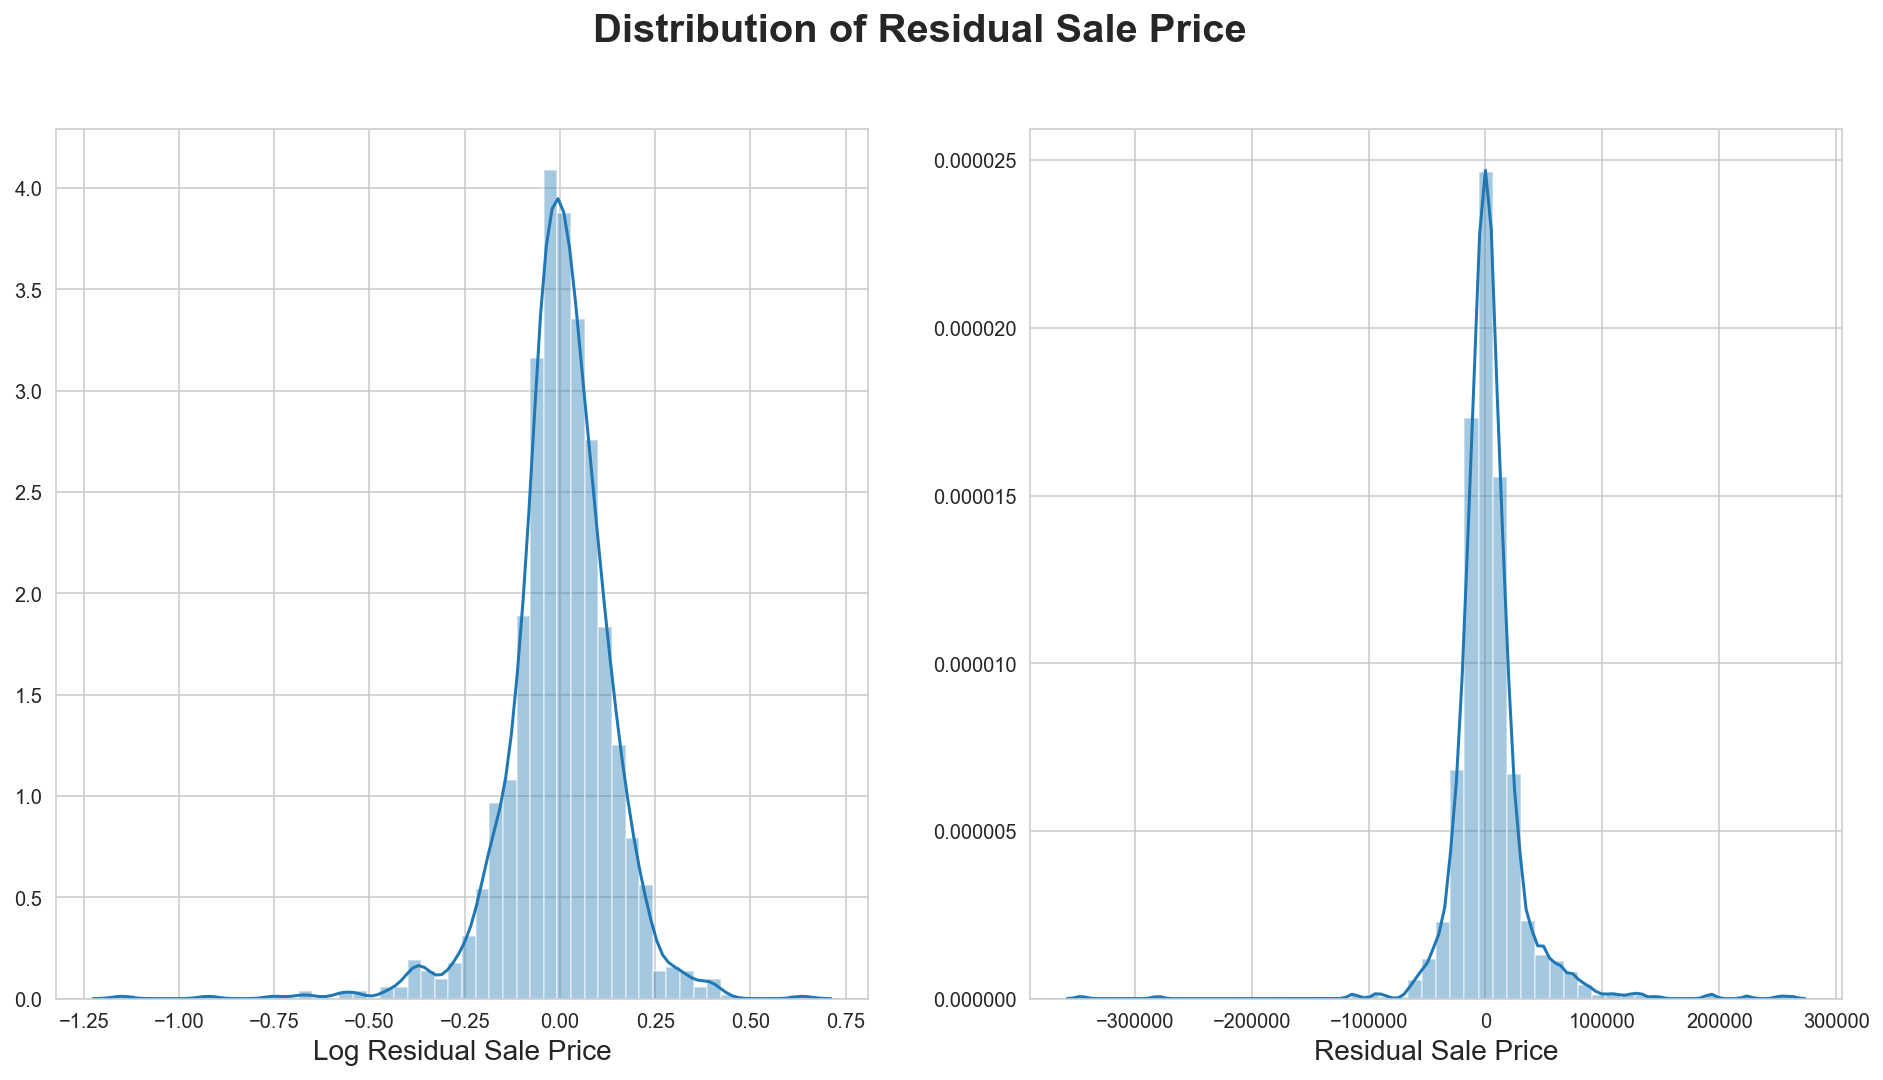

In [48]:
# Check distributions of residuals, log transformed and untransformed #
f,ax=plt.subplots(1,2,figsize=(16,8))

sns.distplot(log_resids,ax=ax[0])
ax[0].set_xlabel('Log Residual Sale Price',fontsize=14)

sns.distplot(orig_resids,ax=ax[1])
ax[1].set_xlabel('Residual Sale Price',fontsize=14)

f.suptitle('Distribution of Residual Sale Price',fontsize=20,fontweight='bold')
plt.show()



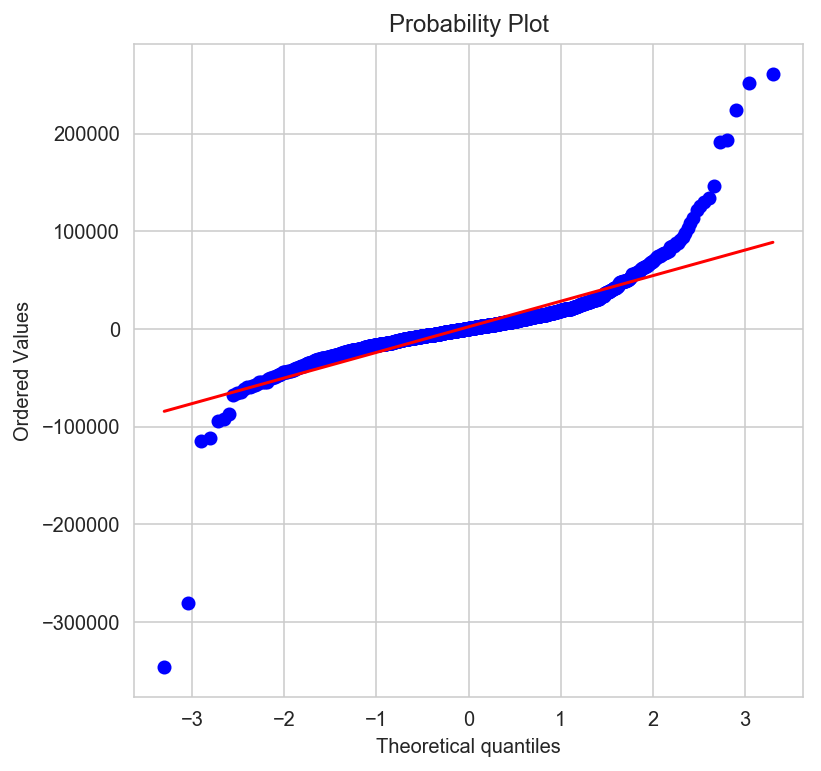

In [49]:
plt.figure(figsize=(6,6))
pp=stats.probplot(orig_resids,plot=plt)



The distribution of the residuals seem to adhere better to normality than the log residuals, and the question requires the estimates to be in dollars, so let's set the target as the residual sale price in dollars. 

In [50]:
house['target2']=orig_resids


## Exploring Categorical variables ## 

We'll do another round of EDA here, following the same process as the last round. This time we'll look at categorical variables first.

In [51]:
house_non_fix_cat=house[non_fixed_features].select_dtypes(include='object')
house_non_fix_cat.shape


(1450, 21)

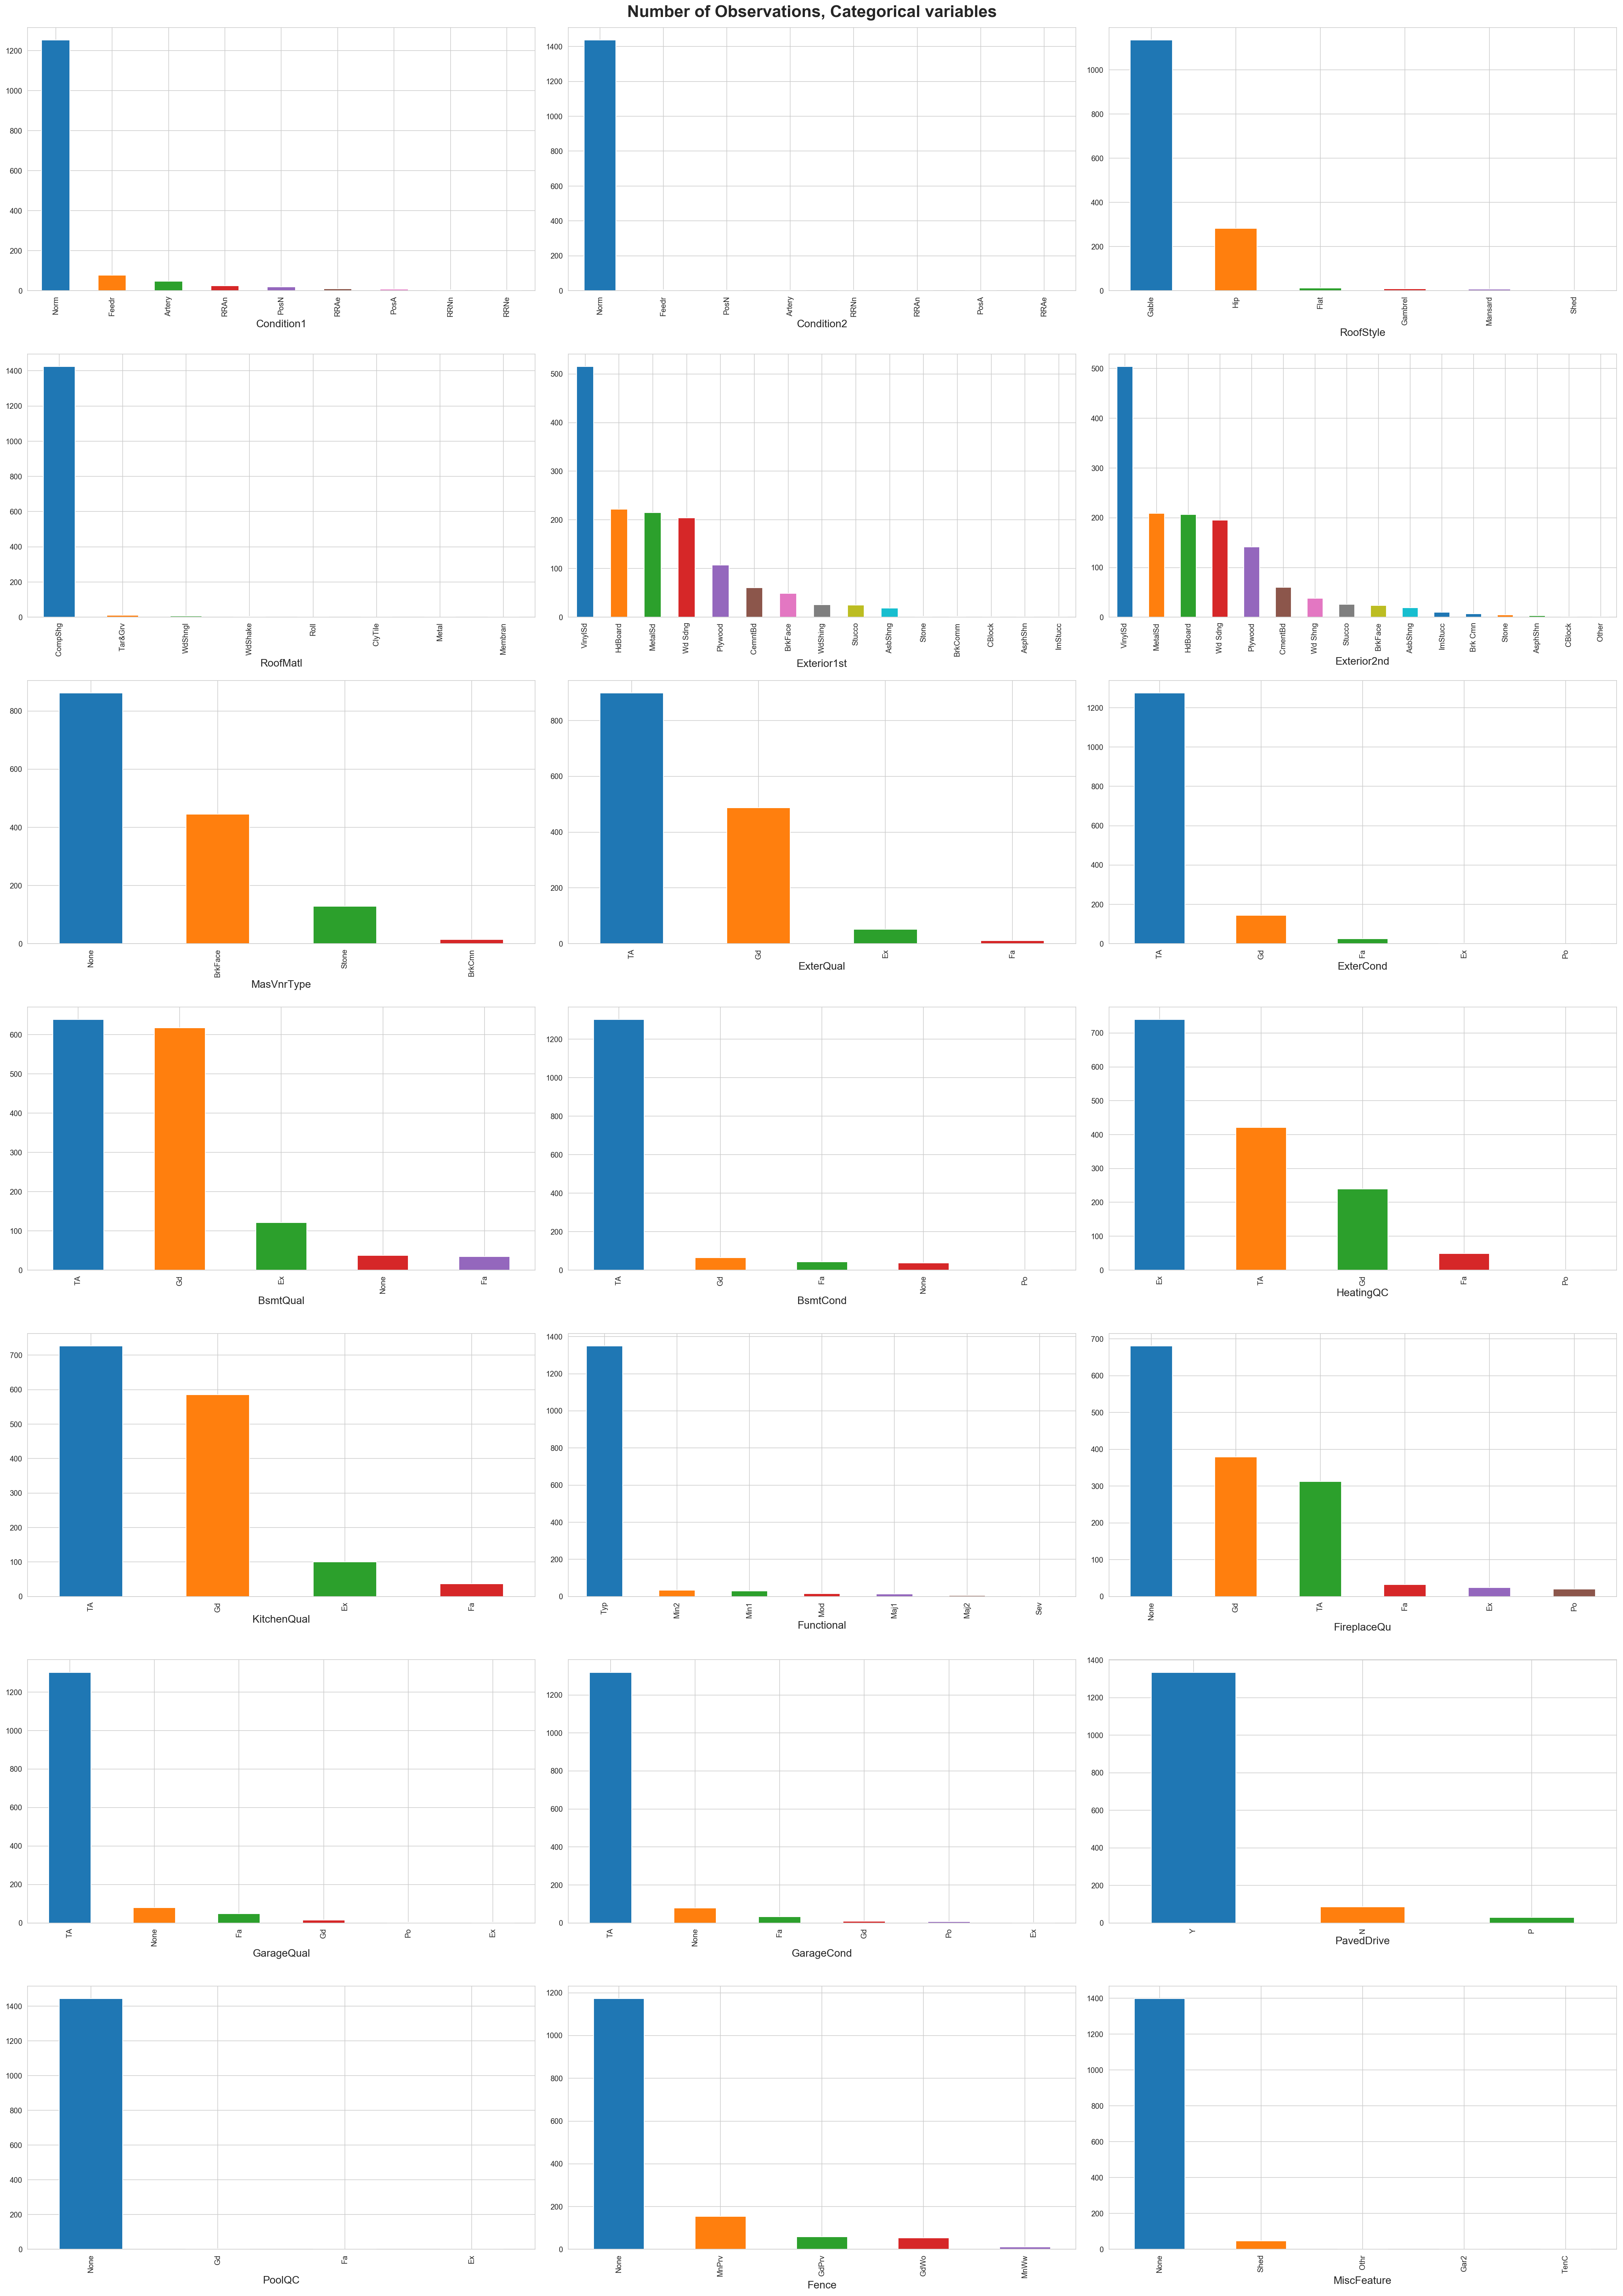

In [52]:
f, ax= plt.subplots(7,3,figsize=(30,42))
axes=ax.flatten()

for feature,ax in zip(house_non_fix_cat.columns,axes):
    house_non_fix_cat[feature].value_counts().plot.bar(ax=ax)
    ax.set_xlabel(feature,fontsize=14)

f.suptitle('Number of Observations, Categorical variables',fontsize=22,y=1.005,fontweight='bold')
plt.tight_layout()
plt.show()

Again, I'll follow my procedure in the last question and try to generate more balanced classes by collapsing certain categorical variables and generating dummies for the rest.

In [53]:
# Take majority class for identified imbalanced classes # 

imb_classes=['Condition2', 'RoofMatl', 'PoolQC', 'MiscFeature','GarageCond', 'GarageQual']
imb_class_dummies=[]
for feature in imb_classes:
    majority_class=house[feature].value_counts().index[0]
    house['is_'+feature+'_'+majority_class]=house[feature].apply(lambda x: 1 if x==majority_class else 0)
    imb_class_dummies.append('is_'+feature+'_'+majority_class)
    
# Generate dummies for other categorical variables # 

cat_features=[a for a in house_non_fix_cat.columns if a not in imb_classes]

non_fix_dummies=pd.get_dummies(house[cat_features],drop_first=True)

house=pd.concat([house,non_fix_dummies],axis=1)

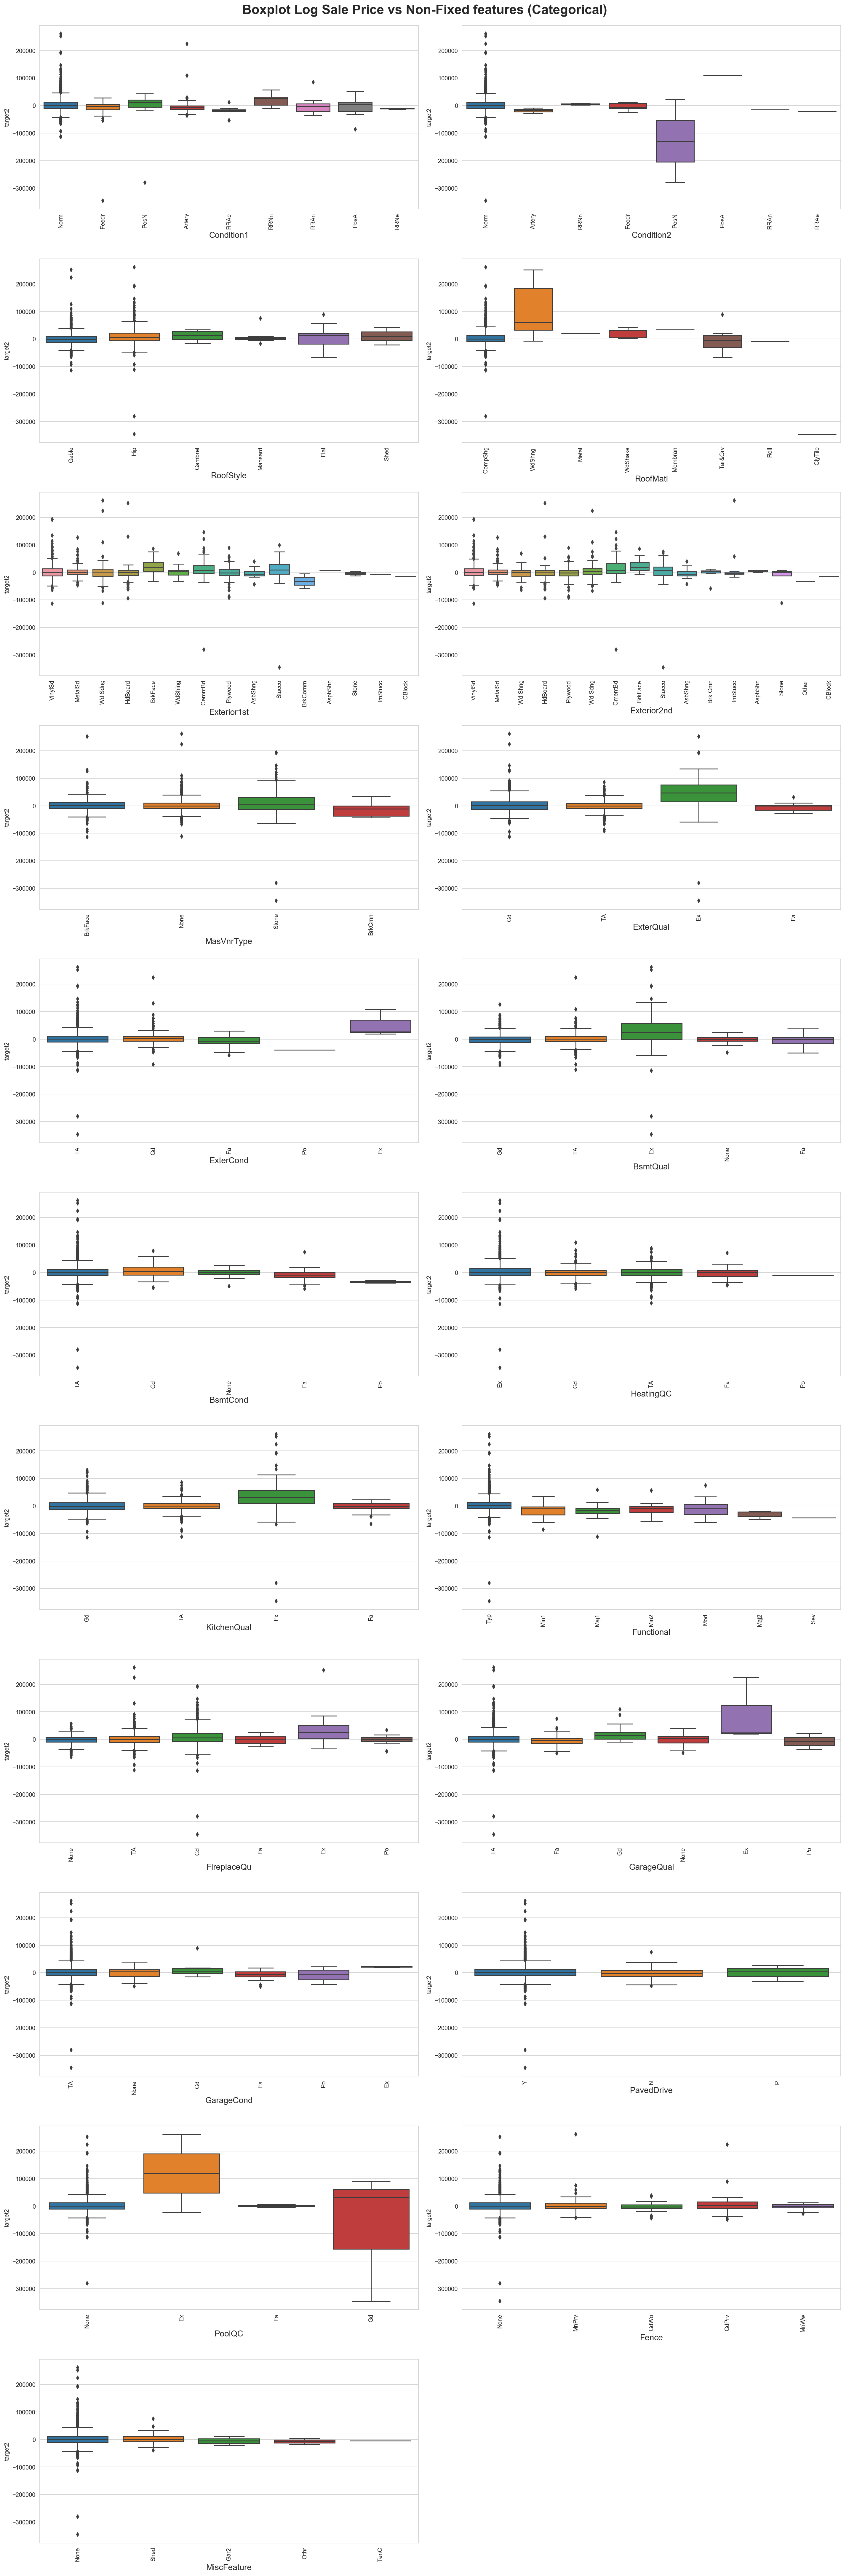

In [54]:
# Plot categorical vs log sale price # 

f, ax= plt.subplots(11,2,figsize=(20,60))
ax[10,1].axis('off')
axes=ax.flatten()

for feature,ax in zip(house_non_fix_cat.columns,axes):
    sns.boxplot(x=feature,y='target2',data=house,ax=ax)
    ax.set_xlabel(feature,fontsize=14)
    labels=ax.get_xticklabels()
    ax.set_xticklabels(labels,rotation=90)

f.suptitle('Boxplot Log Sale Price vs Non-Fixed features (Categorical)',y=1.005,fontsize=22,fontweight='bold')

plt.tight_layout()

plt.show()

## Exploring continuous variables ## 

Now I'll move onto continuous variables. The procedure is also similar to question 1 and I'll be looking out for any possible transformations to apply to the features.

In [55]:
house_non_fix_num=house[non_fixed_features].select_dtypes(exclude='object')
house_non_fix_num.shape

(1450, 13)

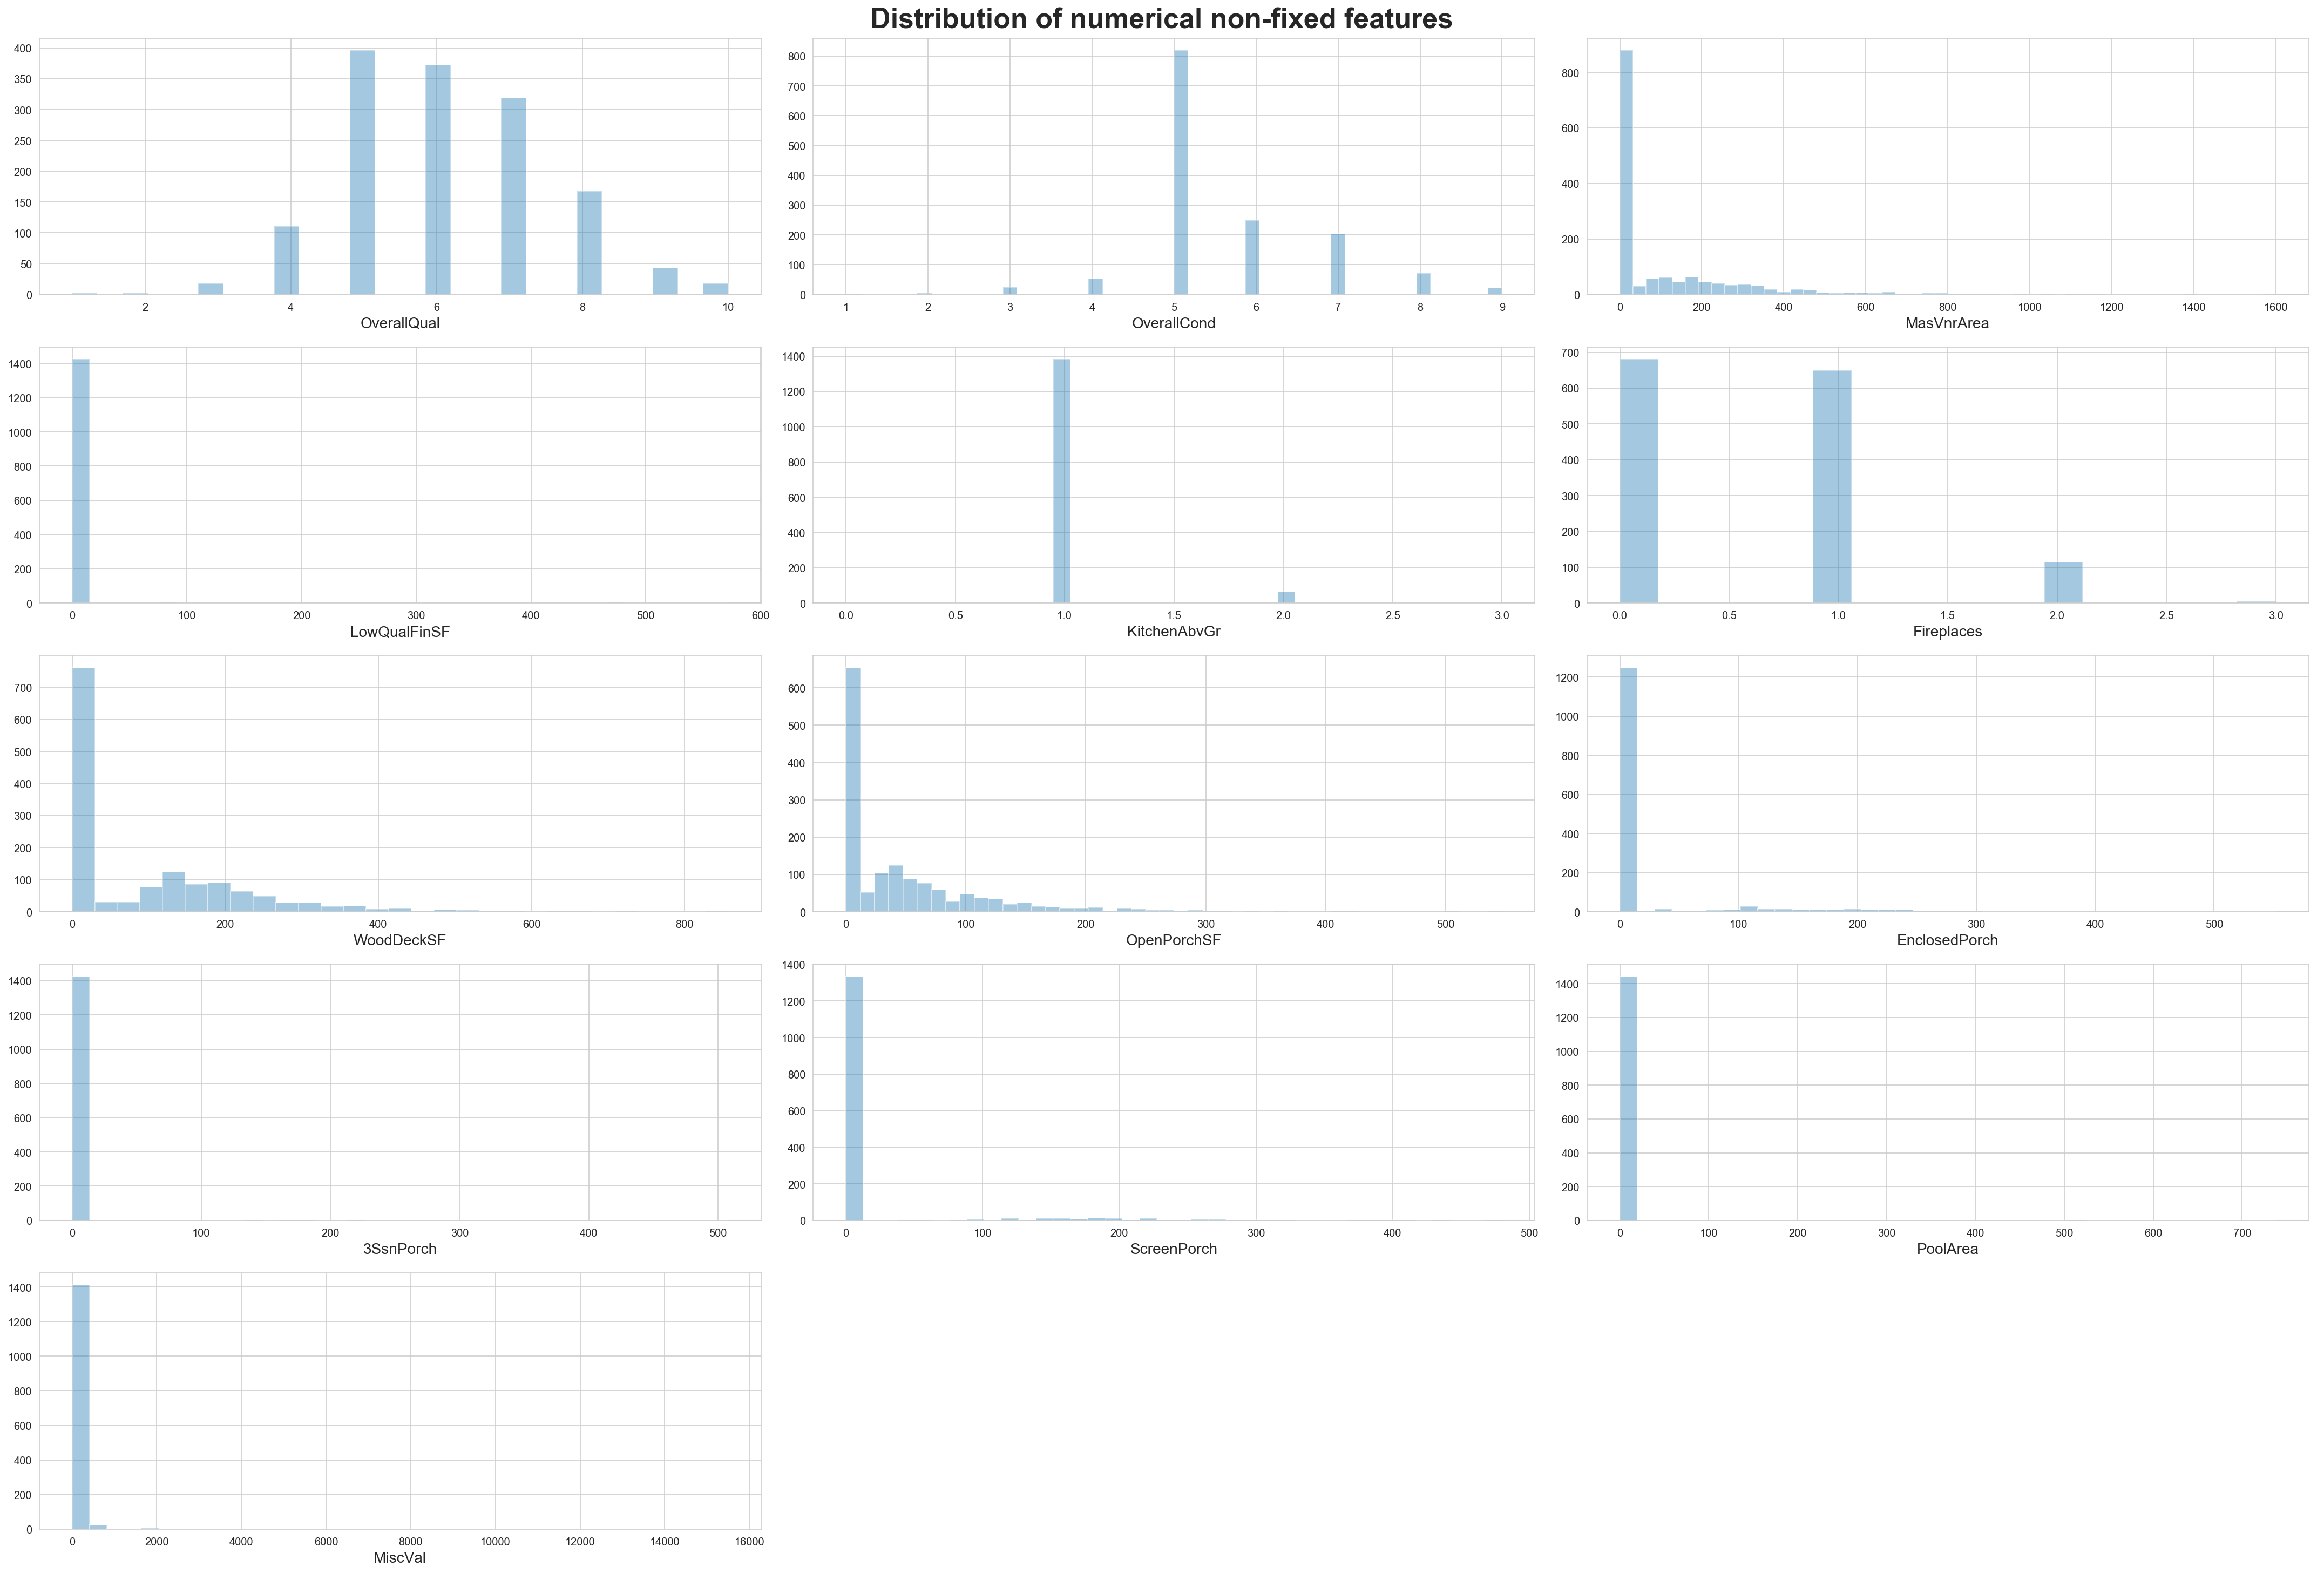

In [56]:
# Look at the distribution of continuous variables # 

f, ax= plt.subplots(5,3,figsize=(30,20))
axes=ax.flatten()
ax[4,1].axis('off')
ax[4,2].axis('off')

for x,ax in zip(house_non_fix_num.columns,axes):
    sns.distplot(house_non_fix_num[x],ax=ax,kde=False)
    ax.set_xlabel(x,fontsize=14)
f.suptitle('Distribution of numerical non-fixed features',fontsize=26,y=1.01,fontweight='bold')

plt.tight_layout()
plt.show()

We'll do the same for the non-fixed features as we did for the fixed features, ie. to generate dummies for those continuous variables with a point mass at zero. This will characterise the presence of a non-fixed feature, eg. porch, deck or mason veneer, to help us make the inference of whether a home owner should consider building or adding a feature such as a porch. 

In [57]:
# Generate dummies for the presence of non fixed features # 

house['has_ScreenPorch']=house['ScreenPorch'].apply(lambda x : 1 if x>0 else 0)
house['has_3SsnPorch']=house['3SsnPorch'].apply(lambda x : 1 if x>0 else 0)
house['has_OpenPorch']=house['OpenPorchSF'].apply(lambda x : 1 if x>0 else 0)
house['has_WoodDeck']=house['WoodDeckSF'].apply(lambda x : 1 if x>0 else 0)
house['has_MasVnr']=house['MasVnrArea'].apply(lambda x : 1 if x>0 else 0)
house['has_EnclosedPorch']=house['EnclosedPorch'].apply(lambda x : 1 if x>0 else 0)

eng_non_fix_features=['has_ScreenPorch','has_3SsnPorch','has_OpenPorch','has_WoodDeck','has_MasVnr','has_EnclosedPorch']


Now we'll look for any linear relationship between target and numerical fixed features. 

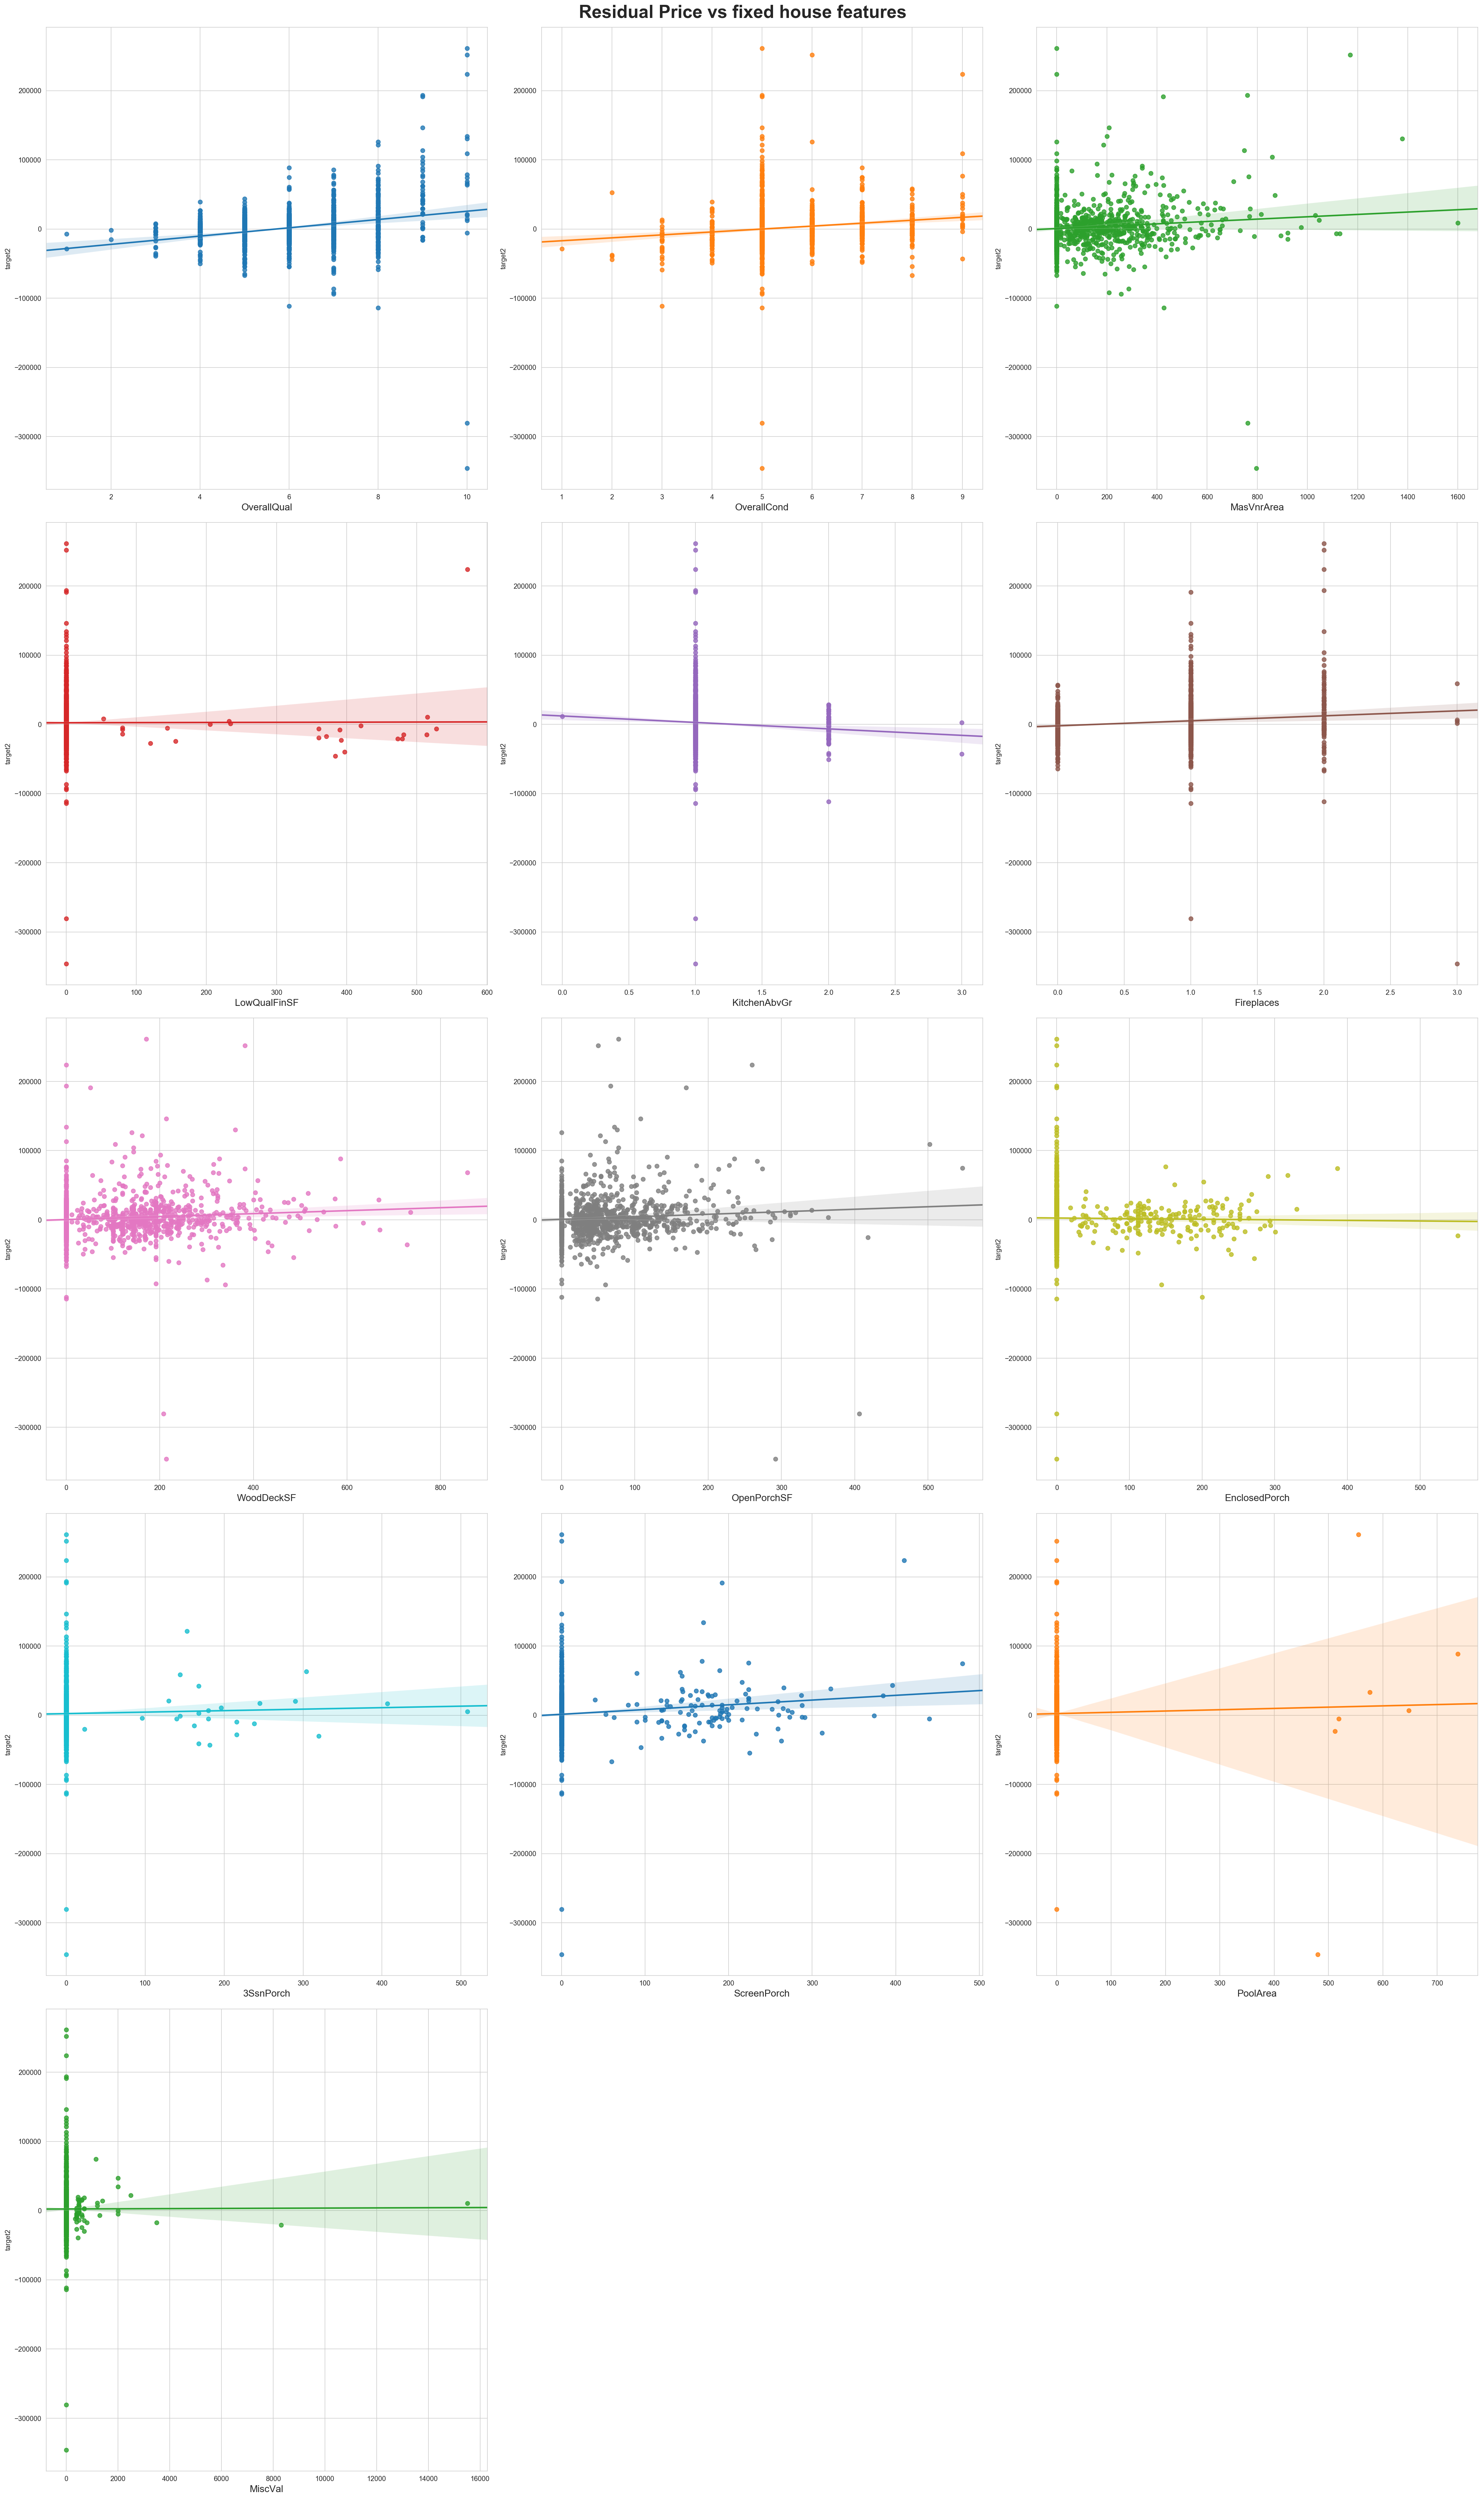

In [58]:
# Scatter plots + regression line of target vs features # 

f, ax= plt.subplots(5,3,figsize=(30,50))
axes=ax.flatten()
ax[4,1].axis('off')
ax[4,2].axis('off')

for x,ax in zip(house_non_fix_num.columns,axes):
    sns.regplot(x=x,y=house['target2'],data=house_non_fix_num,ax=ax)
    ax.set_xlabel(x,fontsize=14)
f.suptitle('Residual Price vs fixed house features',fontsize=26,y=1.005,fontweight='bold')
plt.tight_layout()

plt.show()


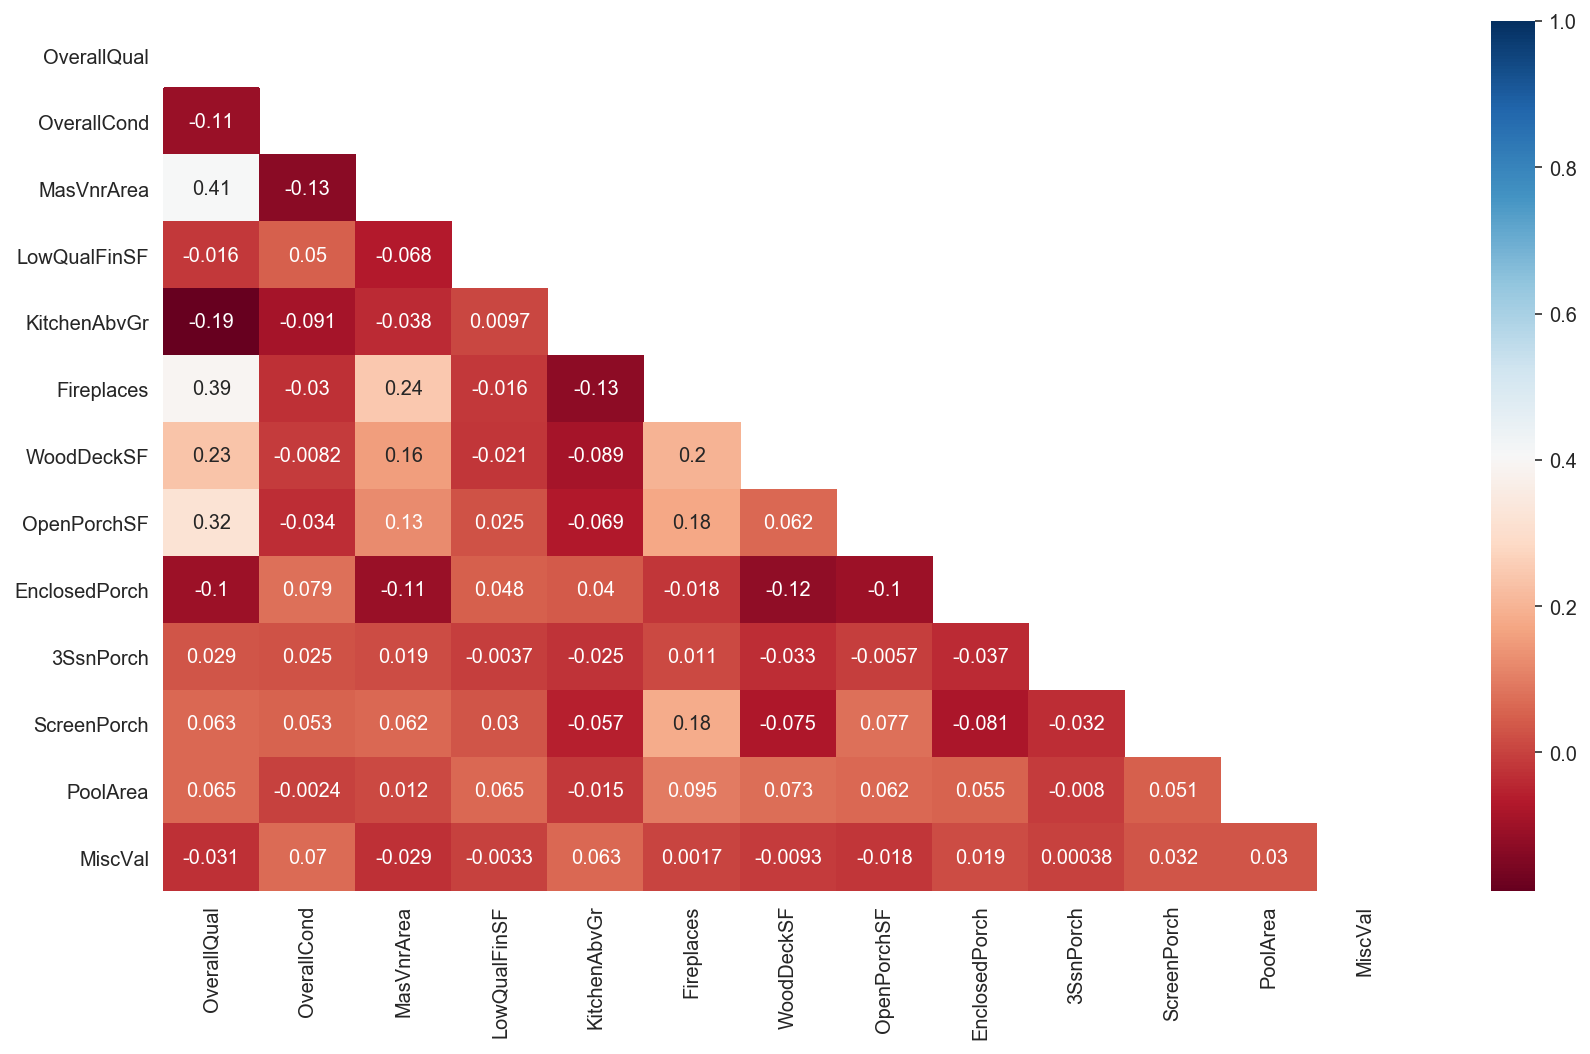

In [59]:
# Check for collinear features # 
plt.figure(figsize=(14,8))
tri_corr_heatmap(house_non_fix_num)

There doesn't appear to be a great deal of collinearity between the numerical features. I'll try modelling next. 

## Modelling ##

For this question, I'll be training 2 models - Lasso and Random Forest, which allow for better interpretability to answer the question of whether variable features of a house can add more value to its sale price. 

I'll look at the non-zero coefficients for a lasso model, and the feature importance for a random forest regressor model. 

Since the goal here is causal inference and not prediction, I won't be splitting the data into training and test. Instead, I'll be training the model over the whole data set and looking at the resulting parameters to assess which variable features contribute the most to house value.

In [60]:
# Setting up feature and target # 

non_fix_features_fit=imb_class_dummies+non_fix_dummies.columns.tolist()+eng_non_fix_features+house_non_fix_num.columns.tolist()

X2=house[non_fix_features_fit]
X2s=pd.DataFrame(StandardScaler().fit_transform(X2),columns=X2.columns,index=house.index)

y2=house['target2']

In [61]:
# Fit a lasso model, Fit7 # 

optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1,max_iter=2000)
optimal_lasso.fit(X2s, y2)

print("Lasso will be run at alpha = {:5.7f}".format(optimal_lasso.alpha_))

fit7=Lasso(alpha=optimal_lasso.alpha_).fit(X2s,y2)

print_cross_val_results(fit7,"Lasso to predict Residual Sale Price",X2s,y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso will be run at alpha = 825.5586693
------------------------------------

5-Fold Cross Validated Results for Model: Lasso to predict Residual Sale Price
Cross-validated scores: [ 0.23795743  0.11364949  0.1972288   0.20887178  0.09053718]
Mean CV score: 0.169648939789
Std CV score: 0.057200941437


..............................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


In [62]:
# Fit 8, Random Forest Regressor # 

rfr=RandomForestRegressor()

# Set up hyperparameter grid # 

rfr_params={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50,100,150,200]}

# Grid search over hyperparameter grid # 

rfr_gridsearch=GridSearchCV(rfr,rfr_params,cv=5)
rfr_gridsearch.fit(X2s,y2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
print('Random Forest Regressor will be run using the following parameters : ')
print(rfr_gridsearch.best_params_)

rfr_best=rfr_gridsearch.best_estimator_
fit8=rfr_best.fit(X2s,y2)
print_cross_val_results(fit8,'Random Forest Regressor',X2s,y2)

Random Forest Regressor will be run using the following parameters : 
{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 200}
------------------------------------

5-Fold Cross Validated Results for Model: Random Forest Regressor
Cross-validated scores: [ 0.3424139   0.20464613  0.23265578  0.29508445  0.06117313]
Mean CV score: 0.227194677813
Std CV score: 0.0959019365341


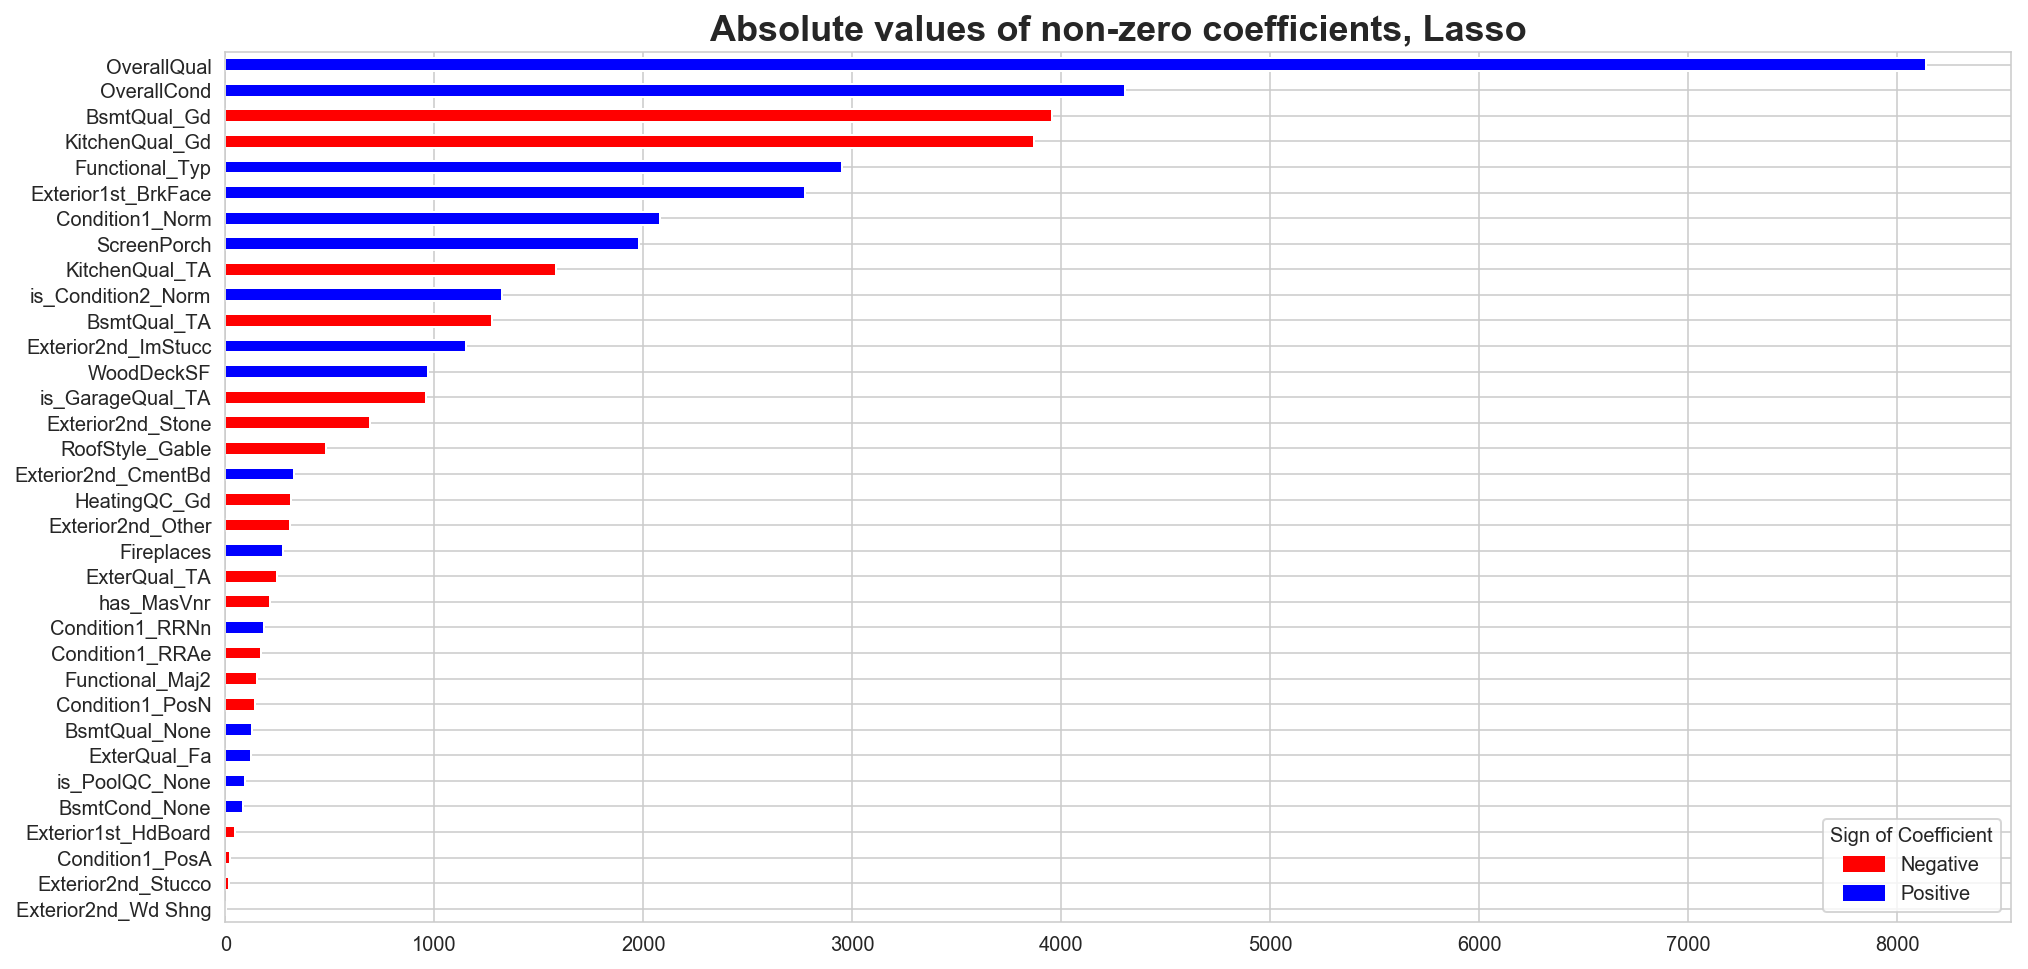

In [64]:
# Store lasso coefficients in a df # 
lasso2_coefs = pd.DataFrame({'variable':X2s.columns,
                            'coef':fit7.coef_,
                            'abs_coef':np.abs(fit7.coef_),
                           })

lasso2_coefs.sort_values('abs_coef', inplace=True)

# Positive coefficient = blue, Negative coefficient = Red # 
lasso2_coefs['color']=lasso2_coefs['coef'].apply(lambda x : 'blue' if x>0 else 'red')

f=plt.figure(figsize=(10,8))

# Generate labels # 
non_zero_variables=lasso2_coefs['variable'][lasso2_coefs['abs_coef']>0].tolist()

# Plot bar chart # 
f=lasso2_coefs['abs_coef'][lasso2_coefs['abs_coef']>0].plot.barh(color=lasso2_coefs['color'][lasso2_coefs['abs_coef']>0],figsize=(16,8))
f.set_yticklabels(non_zero_variables)

# Write legend # 
red_patch = mpatches.Patch(color='red', label='Negative')
blue_patch= mpatches.Patch(color='blue', label='Positive')
f.legend(handles=[red_patch,blue_patch],title='Sign of Coefficient',loc='lower right')

# Set title # 
f.set_title('Absolute values of non-zero coefficients, Lasso',fontsize=18,fontweight='bold')


plt.show()

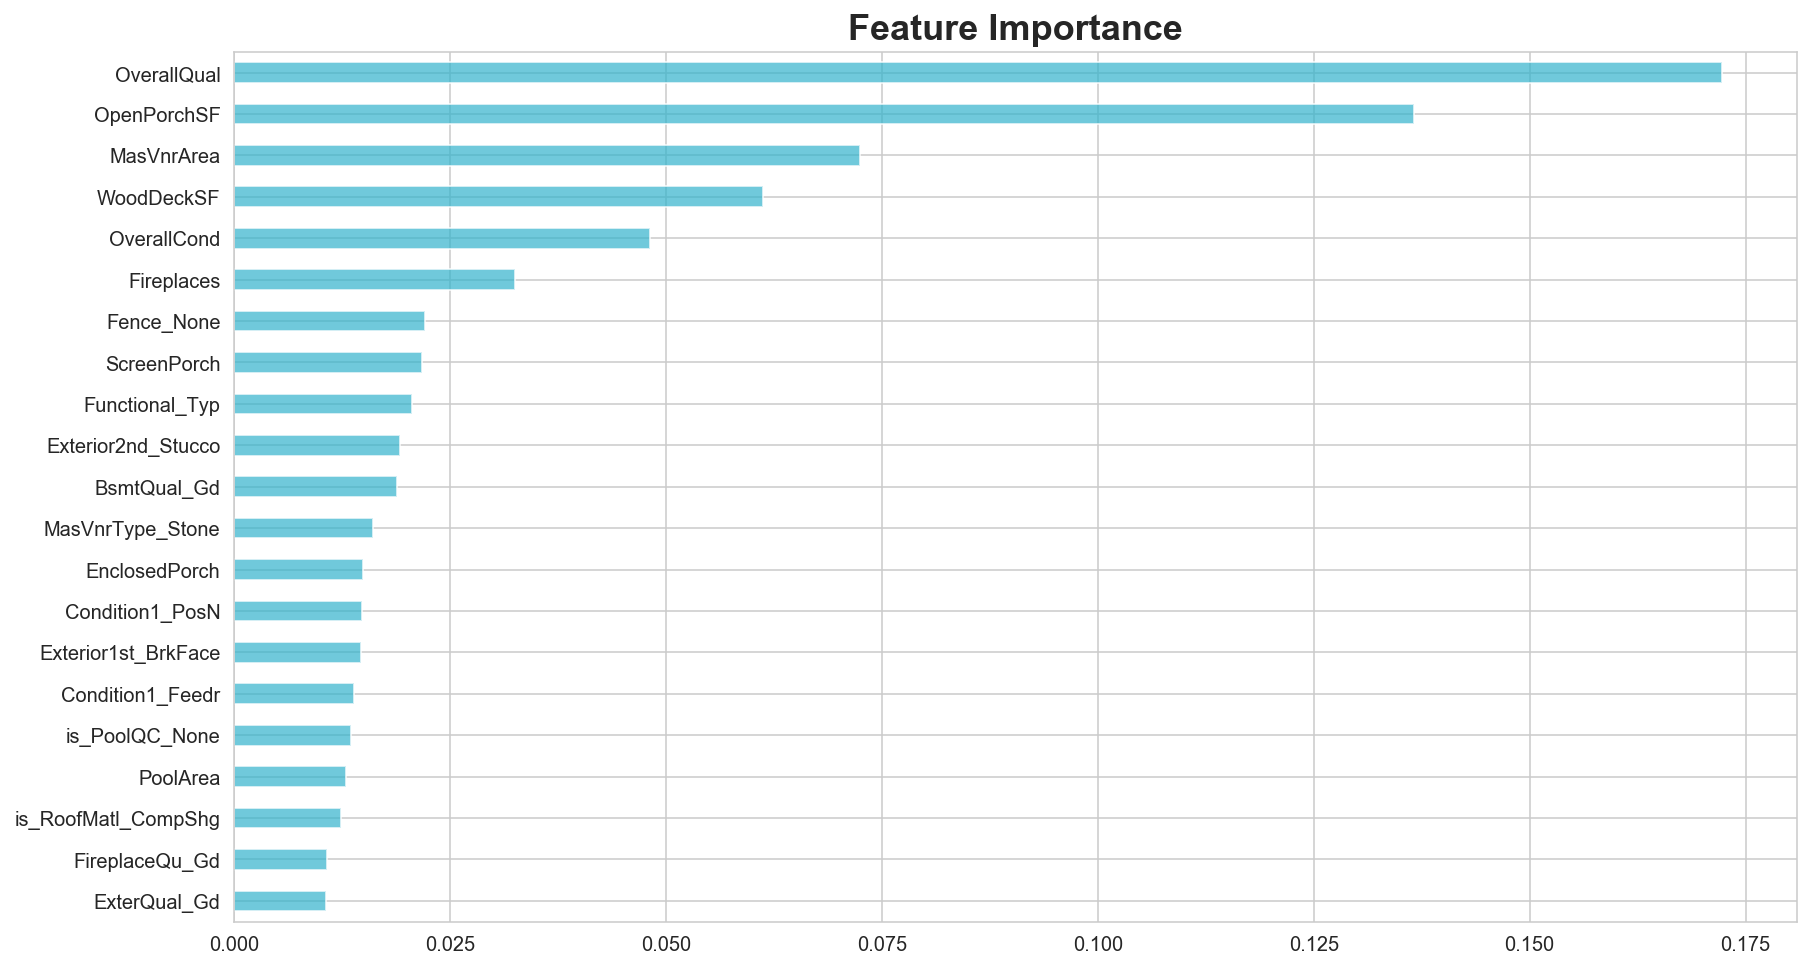

In [65]:
# Plot feature importance from random forest # 

rfr_feats=pd.DataFrame({'variable':X2s.columns,
 'feature_importance':fit8.feature_importances_})

rfr_feats.sort_values(by='feature_importance',inplace=True)
f=plt.figure(figsize=(14,8))

# Look at features which have importance above >0.01 # 
ax=rfr_feats['feature_importance'][rfr_feats['feature_importance']>0.01].plot.barh(color=(0.2,0.7,0.8),alpha=0.7)
ax.set_yticklabels(rfr_feats['variable'][rfr_feats['feature_importance']>0.01])
ax.set_title('Feature Importance',fontsize=18,fontweight='bold')
plt.show()



## Discussion ## 

In general, we can draw rather different conclusions from the two models about which variable features add more value to the house. 

The models generally agree that the overall quality and condition of the house adds quite significant value to the house. These are ranked 1st and 2nd for Lasso model, and 1st and 6th for the random forest model. 

However, the similarity of feature ranks ends about there. 

The Lasso model suggests that we prioritise in-house features, eg. the Basement, Kitchen. For instance, a 'Good' quality kitchen is worth approximately \$4000 less than an 'Excellent' quality Kitchen, everything else being equal.  

The Random Forest model suggests that out-of-house features such as the porch, deck and mason veneer are more important. 


## Implications for business ## 

Over the two models, we find that sale price is determined mainly by its **fixed** features. These mainly relate to the neighborhood and size of the property. We've estimated using $R^2$ metrics that the fixed features are able to explain ~90% of sale price. 

We haven't found an entirely satisfactory explanation for what accounts for the remaining 10% of sale price, as shown in the modelling for our second question. We've only managed to account for about 20% (in the best case) for 

Here are my recommendations for the business: 

* **Concentrate in property in Crawford, Stone Brook, Northridge and Somerset**
    * Prices in these neighborhoods are generally higher, and will yield higher sales.  
<br></br>    
* **Bigger Houses, bigger sales**
    * Focusing on larger sized houses will generally yield higher sales as well. If revenue maximisation is the goal, we would focus on bigger houses     
<br></br>
* **Clean up the place, instead of adding frills**
    * Generally, we have found the overall quality and condition of the place adds more value to the sale price rather than features such as a porch, pool or deck. 
    * It's probably worth more to tidy up a place once the company buys it over, rather than to add another feature that wouldn't add too much value to the house.      
<br></br>
* **Be prudent about adding features to a house**
    * The firm has to evaluate the costs and benefits of each feature 
    * Lasso model provides good estimates of the marginal value of adding a feature
    * This should be weighed up against the construction cost of each feature.


## Which model should we trust? ## 

The Lasso model has the inherent advantage of better interpretability. First, we are able to quantify in dollar value how much each feature adds to the sale price of the house. Eg. building a porch or upgrading your basement adds *x* dollars to your sale price. Second, we are able to easily tell the direction that a feature influences sale price. 

The Random Forest model lacks the interpretability of the two aspects above. However, we find that the model provides a better representation of the data, with a considerably higher cross-validated $R^2$. This is possibly because the target variable doesn't have a linear relationship with the data, unlike in the first model. So we're more likely to rely on the Random Forest model in the first instance, and check against our intuition after. eg. We can assume that building a porch would only *add* and not *diminish* the value of the house. 



<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [66]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## Target Variable ## 

In this question, we're trying to predict the sale condition of a house. Specifically, whether it has an abnormal sale condition, eg. Foreclosure. We'll set up the problem as a binary classification task, predicting whether a house has an abnormal sale

Let's also visualise the class imbalance in the categorical variable. 

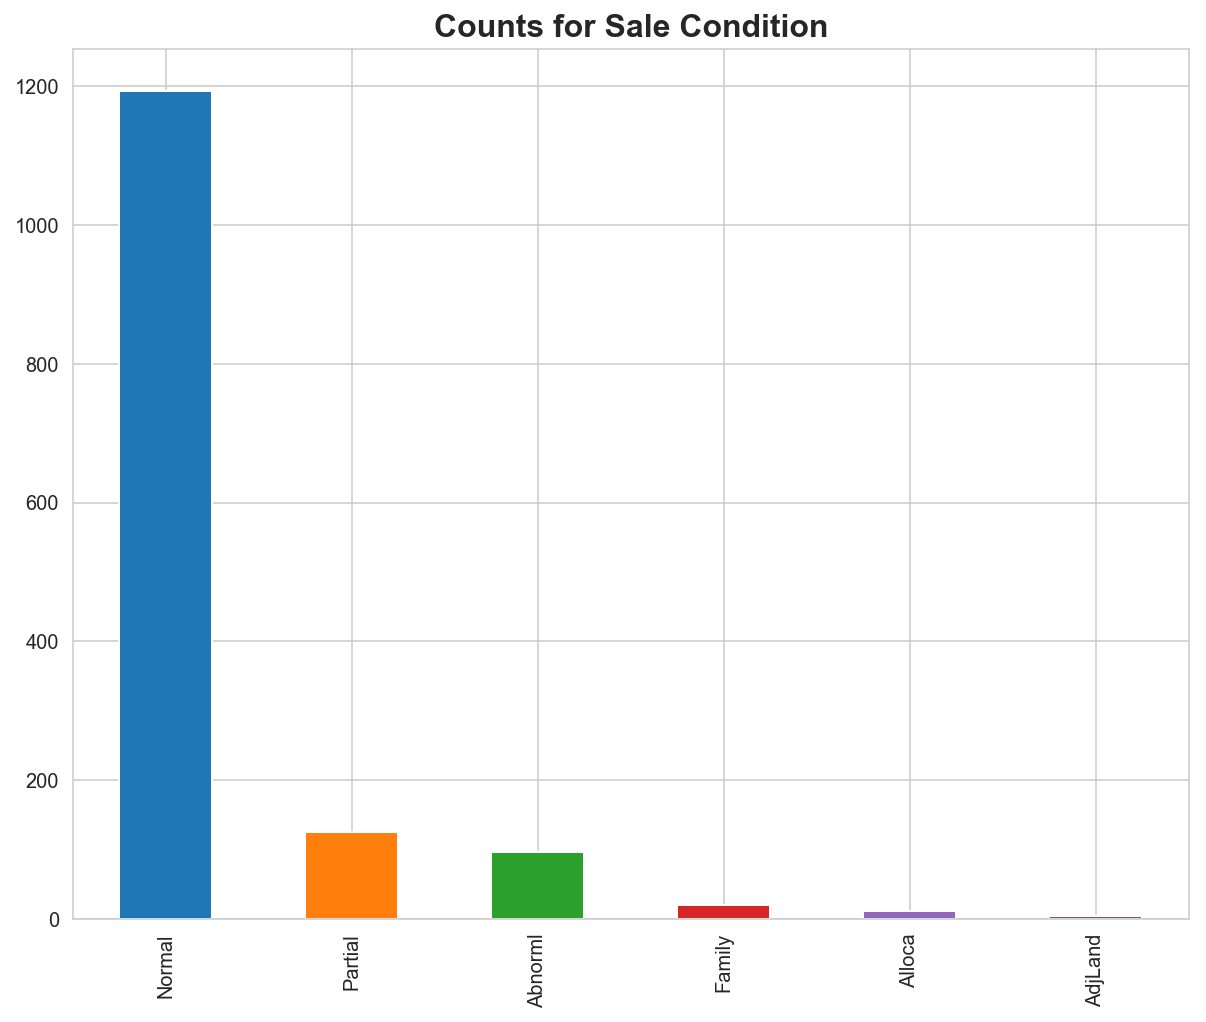

In [67]:
plt.figure(figsize=(10,8))

house['SaleCondition'].value_counts().plot.bar()
plt.title('Counts for Sale Condition',fontsize=16,fontweight='bold')

In [68]:
# Set as target # 

house['target3']=house['SaleCondition'].apply(lambda x: 1 if x=='Abnorml' else 0)

print("Approximately {:2.2f} percent of sales are Abnormal sales".format(sum(house['target3'])*100/house.shape[0]))


Approximately 6.62 percent of sales are Abnormal sales


## Feature selection ###

Here, we'll assume that the relevant features that predict the sale condition of a house pertain to its fixed features only. This is because that it's unlikely that more minor features of a house contribute towards abnormality of sale. I'll also include other characteristics pertaining to the sale itself, eg. sale price. 

In [69]:
features_condition=['MoSold', 'YrSold','SalePrice']+fix_features

In [70]:
X3=house[features_condition]
y3=house['target3']

X3s=pd.DataFrame(StandardScaler().fit_transform(X3),columns=X3.columns,index=X3.index)

## Approaches to dealing with class imbalance ## 

I'll be trying two approaches to dealing with class imbalance, over-sampling and modifying class weights. 

In the first approach,  I'll be using oversampling the minority class using the library Imbalanced Learning `imblearn`. 

In the second, I'll be adjusting the loss function by adjusting the class weights during the optimisation and training step. In this case, I'll be assigning a weight of 15:1 to balance out the classes.

In [71]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.model_selection import StratifiedShuffleSplit

In [72]:
## Split into training and test sets # 

X3train,X3test,y3train,y3test=train_test_split(X3s,y3,test_size=0.2,stratify=y3)

In [73]:
X3_resample,y3_resample=SMOTE().fit_resample(X3train,y3train)

In [74]:
X3_resample=pd.DataFrame(X3_resample,columns=X3.columns)

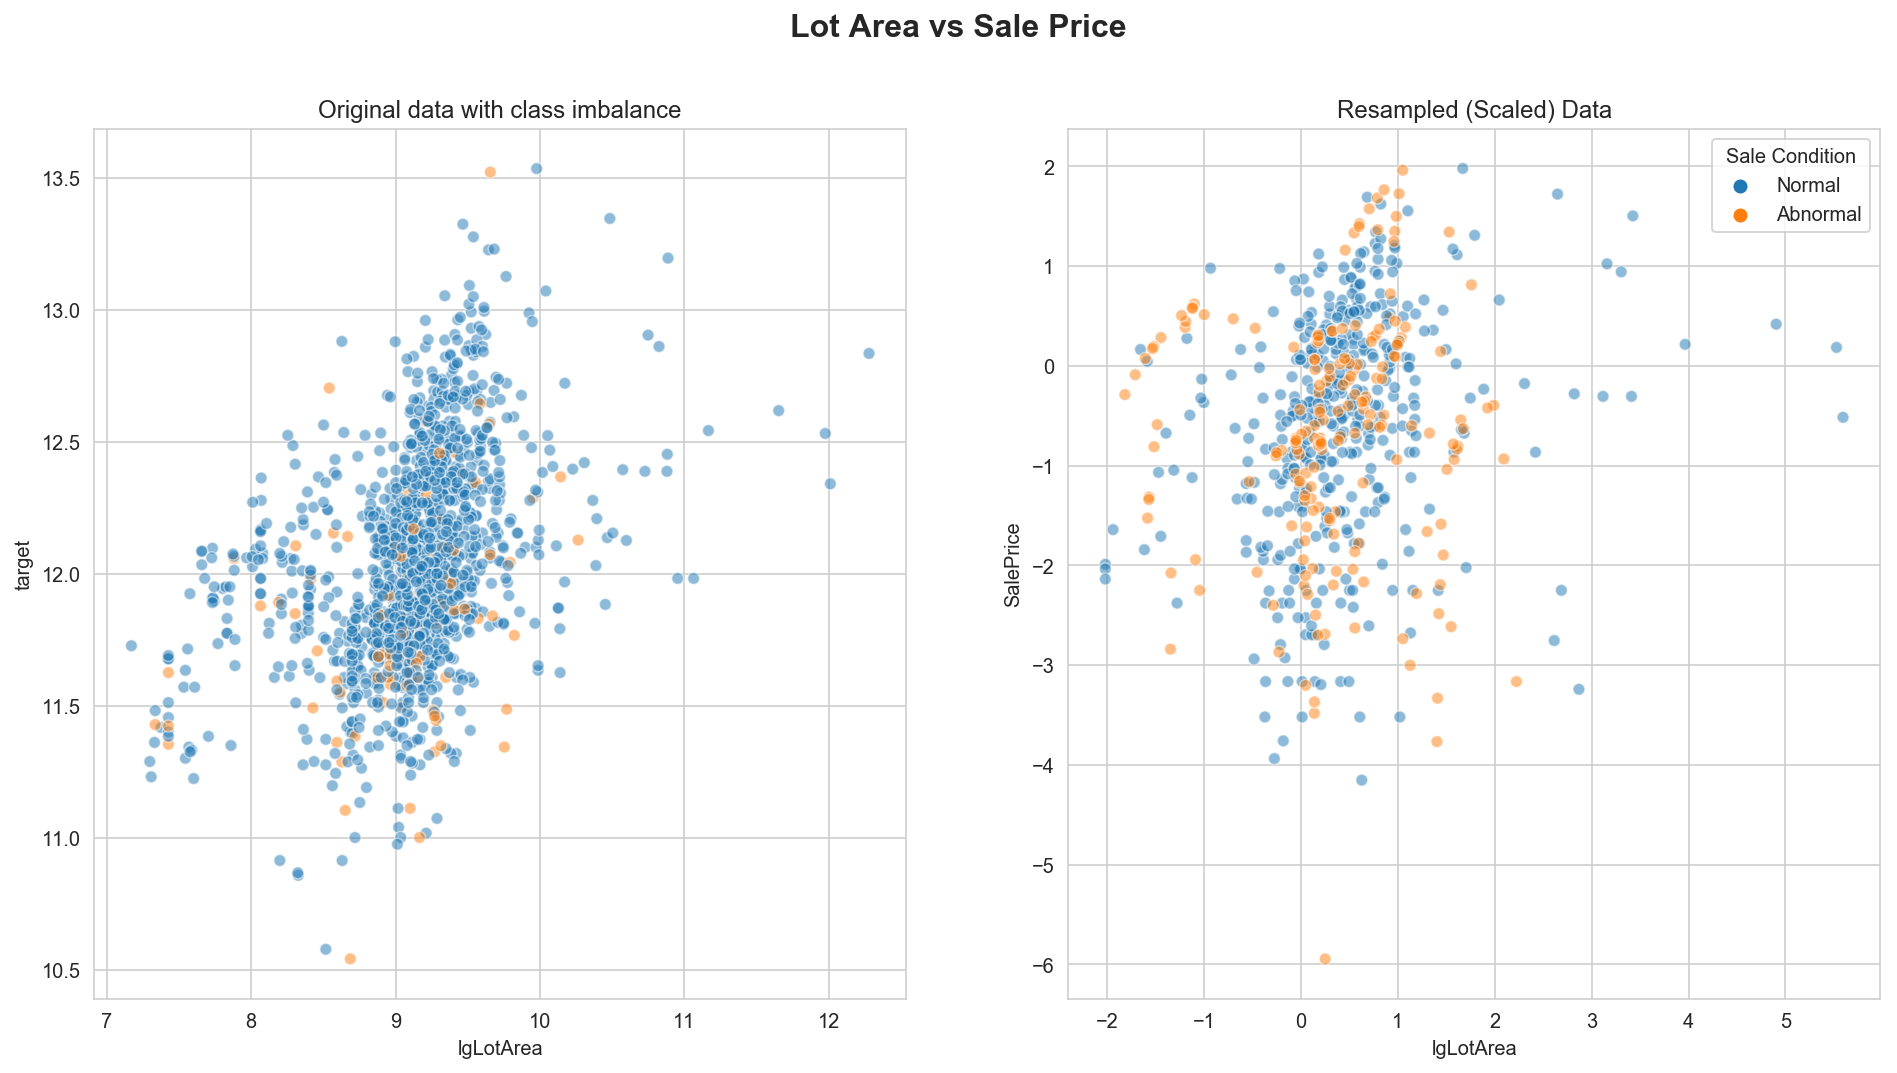

In [75]:
f,ax=plt.subplots(1,2,figsize=(16,8))

plt.figure(figsize=(10,8))
sns.scatterplot(x='lgLotArea',y='target',data=house,hue='target3',alpha=0.5,ax=ax[0])
ax[0].get_legend().remove()
ax[0].set_title('Original data with class imbalance',fontsize=12)

sns.scatterplot(x=X3_resample['lgLotArea'],y=np.log(X3_resample['SalePrice']),hue=y3_resample,alpha=0.5,ax=ax[1])
h,l=ax[1].get_legend_handles_labels()
ax[1].legend(h,['Normal','Abnormal'],title='Sale Condition')
ax[1].set_title('Resampled (Scaled) Data',fontsize=12)

f.suptitle('Lot Area vs Sale Price',fontsize=16,fontweight='bold')

plt.show()



In [76]:
## Check out the difference between resampled and original data # 

# Baseline: Use data as-is # 
lr_best1=LogisticRegressionCV(cv=5,scoring='roc_auc',max_iter=2000)
lr_best1.fit(X3train,y3train)

lr_imb=LogisticRegression(solver='lbfgs',C=lr_best1.C_[0],max_iter=2000).fit(X3train,y3train)

print_cross_val_results(lr_imb,"Logistic Regression with imbalanced classes", X3train,y3train,scoring='roc_auc')

# Approach 1: Use SMOTE resampling to balance classes # 
lr_best2=LogisticRegressionCV(cv=5,scoring='roc_auc',max_iter=2000)
lr_best2.fit(X3_resample,y3_resample)

lr_bal=LogisticRegression(solver='lbfgs',C=lr_best2.C_[0],max_iter=2000).fit(X3_resample,y3_resample)

print_cross_val_results(lr_bal,"Logistic Regression with resampled data", X3_resample,y3_resample,scoring='roc_auc')

# Approach 2: Adjust class weight to balance out the classes # 
class_weight={0:15.1,
             1:1}
lr_best3=LogisticRegressionCV(cv=5,scoring='roc_auc',class_weight=class_weight,max_iter=2000)
lr_best3.fit(X3train,y3train)

lr_re_weight=LogisticRegression(solver='lbfgs',class_weight=class_weight,C=lr_best3.C_[0],max_iter=2000).fit(X3train,y3train)

print_cross_val_results(lr_re_weight,"Logistic Regression with re-weighted classes", X3train,y3train,scoring='roc_auc')


------------------------------------

5-Fold Cross Validated Results for Model: Logistic Regression with imbalanced classes
Cross-validated scores: [ 0.65697005  0.74942396  0.61935484  0.70092593  0.5308642 ]
Mean CV roc_auc: 0.651507794277
Std CV score roc_auc: 0.0743616218779
------------------------------------

5-Fold Cross Validated Results for Model: Logistic Regression with resampled data
Cross-validated scores: [ 0.8597337   0.88247786  0.83870968  0.85680298  0.87808642]
Mean CV roc_auc: 0.86316212751
Std CV score roc_auc: 0.0157857355462
------------------------------------

5-Fold Cross Validated Results for Model: Logistic Regression with re-weighted classes
Cross-validated scores: [ 0.65236175  0.74971198  0.62980031  0.68333333  0.51790123]
Mean CV roc_auc: 0.646621721568
Std CV score roc_auc: 0.0759739637493


Looking at the two approaches, our model seems to have improved with both approaches with a slightly better mean AUC for each model. Let's test the classifier against our test set. 

In [77]:
# Generate predictions# 

y3_hat1=lr_imb.predict(X3test)
y3_hat2=lr_bal.predict(X3test)
y3_hat3=lr_re_weight.predict(X3test)


In [78]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [79]:
print('Results for predicting Abnormal Sales')
print('\n----------------------------------\n')
print('F1 Score for original data set: {:1.4f}'.format(f1_score(y3test,y3_hat1)))
print('F1 score for resampled data set: {:1.4f}'.format(f1_score(y3test,y3_hat2)))
print('F1 score for re-weighted classes: {:1.4f}'.format(f1_score(y3test,y3_hat3)))
print('\n----------------------------------\n')
print('Recall for original data set: {:1.4f}'.format(recall_score(y3test,y3_hat1)))
print('Recall for resampled data set: {:1.4f}'.format(recall_score(y3test,y3_hat2)))
print('Recall for re-weighted classes: {:1.4f}'.format(recall_score(y3test,y3_hat3)))
print('\n----------------------------------\n')
print('Precision for original data set: {:1.4f}'.format(precision_score(y3test,y3_hat1)))
print('Precision for resampled data set: {:1.4f}'.format(precision_score(y3test,y3_hat2)))
print('Precision for re-weighted classes: {:1.4f}'.format(precision_score(y3test,y3_hat3)))

Results for predicting Abnormal Sales

----------------------------------

F1 Score for original data set: 0.0000
F1 score for resampled data set: 0.0682
F1 score for re-weighted classes: 0.0000

----------------------------------

Recall for original data set: 0.0000
Recall for resampled data set: 0.1579
Recall for re-weighted classes: 0.0000

----------------------------------

Precision for original data set: 0.0000
Precision for resampled data set: 0.0435
Precision for re-weighted classes: 0.0000


Using the original dataset, we can observe that precision, recall and F1 scores are all zero because it didn't manage to predict any abnormal sales at all. It's likely that the classifier picked the majority class in most cases. Let's check the confusion matrix


In [80]:
print('\nConfusion matrix for original data')
print(confusion_matrix(y3test,y3_hat1))
print('\n Confusion matrix for resampled data')
print(confusion_matrix(y3test,y3_hat2))
print('\n Confusion matrix for re-weighted classes')
print(confusion_matrix(y3test,y3_hat3))


Confusion matrix for original data
[[270   1]
 [ 19   0]]

 Confusion matrix for resampled data
[[205  66]
 [ 16   3]]

 Confusion matrix for re-weighted classes
[[271   0]
 [ 19   0]]


From here, it's clear that the resampling method has definitely increased predictions for abnormal sales but dramatically increased the FP rate as well. 

Recall is still fairly high, but precision is very low. We might want to tune the cut-offs to achieve an optimal decision point. Let's model this using the entire data set to see which features contribute an abnormal sale.

In [81]:
# Remodel using the entire dataset # 
X3_all,y3_all=SMOTE().fit_resample(X3s,y3)

# Try to optimise precision instead # 
lr_best4=LogisticRegressionCV(cv=5,scoring='precision',max_iter=2000)
lr_best4.fit(X3_all,y3_all)

lr_all=LogisticRegression(solver='lbfgs',C=lr_best4.C_[0],max_iter=2000).fit(X3_all,y3_all)

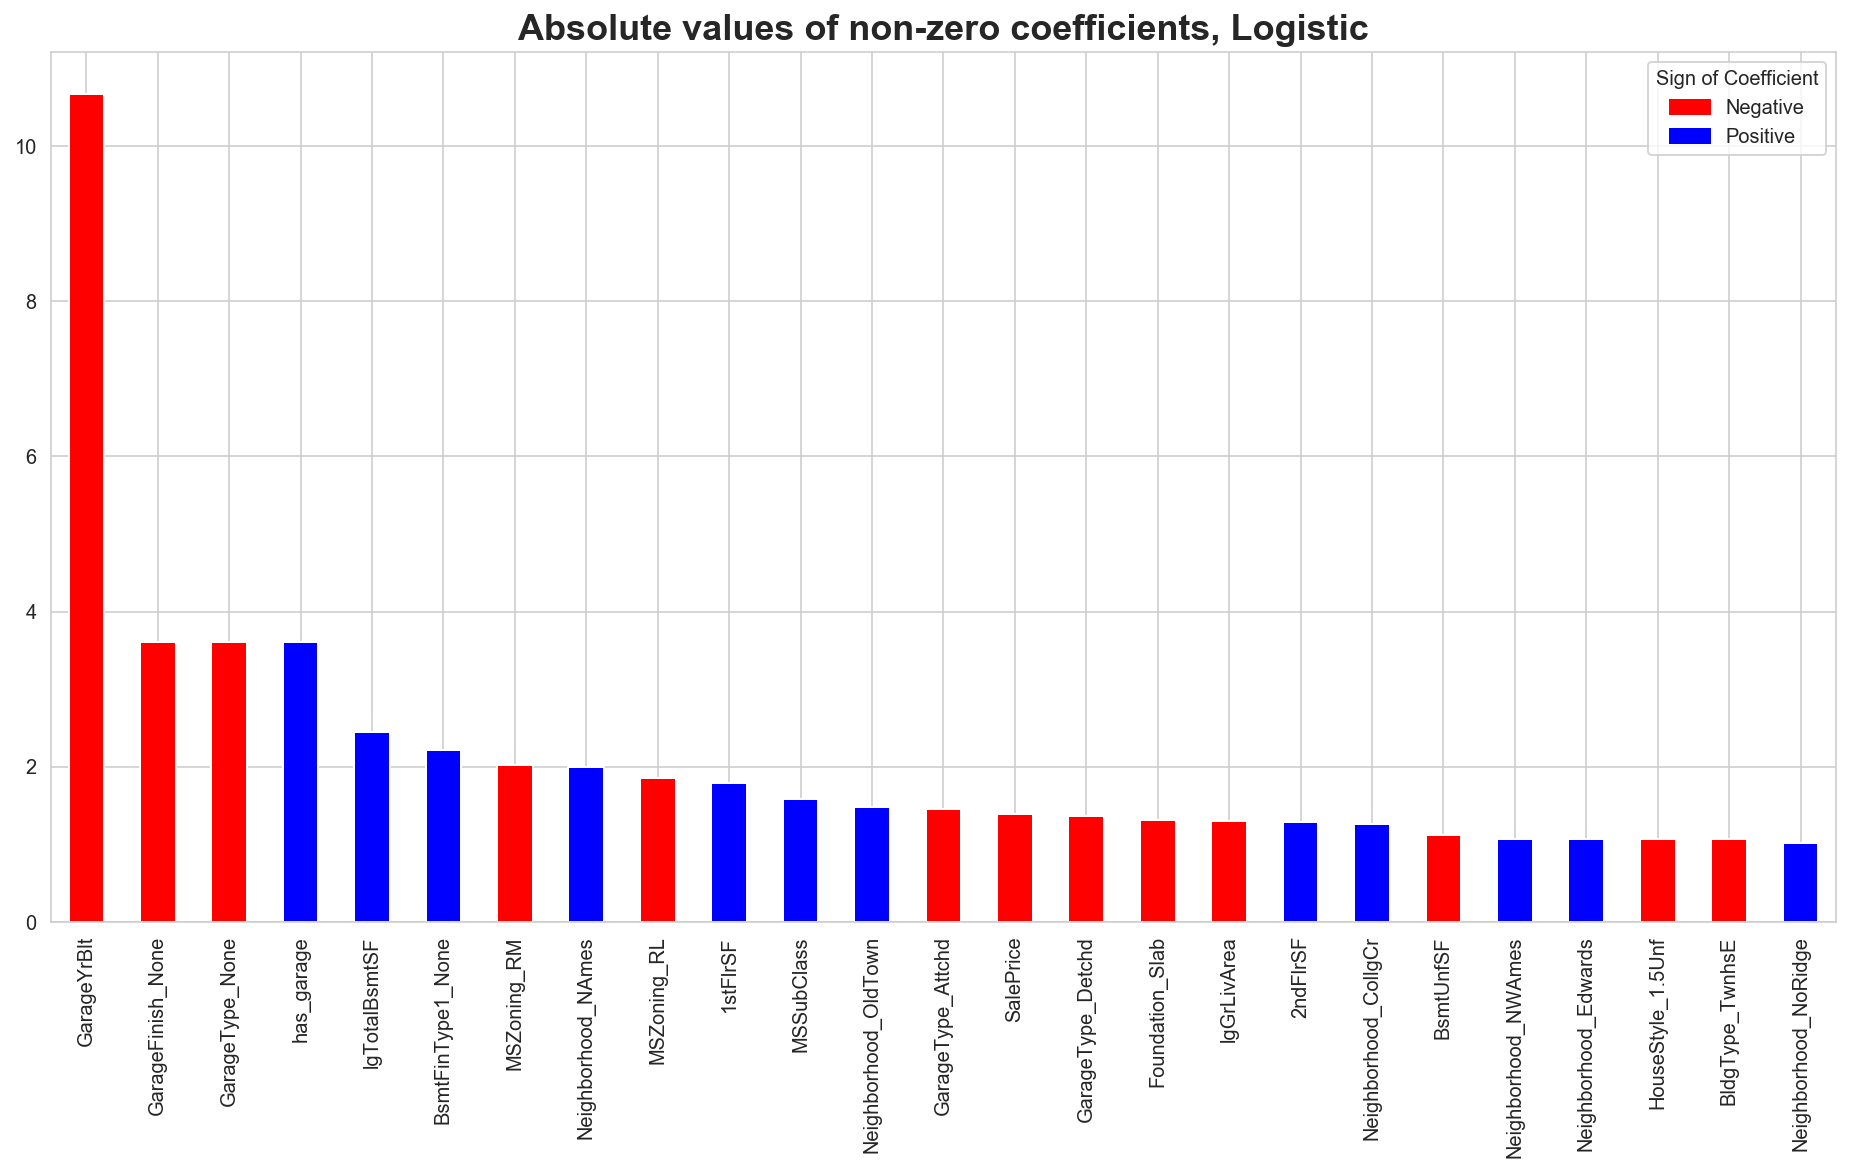

In [82]:
# Save the coefficients to df for easier plotting # 
lr_coefs=pd.DataFrame({'variable':X3.columns,
                            'coef':lr_all.coef_.reshape((lr_all.coef_.shape[1],)),
                            'abs_coef':np.abs(lr_all.coef_.reshape((lr_all.coef_.shape[1],))),
                           })

lr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

# Positive coefficient = blue, Negative coefficient = Red # 
lr_coefs['color']=lr_coefs['coef'].apply(lambda x : 'blue' if x>0 else 'red')

# Plot the coefficients # 
f=plt.figure(figsize=(10,8))

# Generate labels for coefficients greater than 1 only # 
non_zero_variables=lr_coefs['variable'][lr_coefs['abs_coef']>1].tolist()

# Plot bar chart for coefficients greater than 1 only # 
f=lr_coefs['abs_coef'][lr_coefs['abs_coef']>1].plot.bar(color=lr_coefs['color'][lr_coefs['abs_coef']>0.00001],figsize=(16,8))
f.set_xticklabels(non_zero_variables)

# Write legend # 
red_patch = mpatches.Patch(color='red', label='Negative')
blue_patch= mpatches.Patch(color='blue', label='Positive')
f.legend(handles=[red_patch,blue_patch],title='Sign of Coefficient')

# Set title # 
f.set_title('Absolute values of non-zero coefficients, Logistic',fontsize=18,fontweight='bold')


plt.show()

## Discussion ##

From my model, the main features that contribute to an abnormal sale relate to the zoning of the area, the neighborhood and surprisingly, garage characteristics. 

